In [183]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [184]:
df = pd.read_csv("data/amazon.csv")

# 1. MÔ TẢ TẬP DỮ LIỆU 

### Thông tin về tập Amazon Sales Dataset
#### 🛍️ Thông tin về sản phẩm

| Trường              | Mô tả                                                                 |
|---------------------|----------------------------------------------------------------------|
| `product_id`        | Mã định danh duy nhất của sản phẩm.                                  |
| `product_name`      | Tên sản phẩm.                                                        |
| `category`          | Danh mục sản phẩm.                                                   |
| `discounted_price`  | Giá sau khi giảm (hiển thị với khách hàng).                          |
| `actual_price`      | Giá gốc của sản phẩm trước khi giảm giá.                             |
| `discount_percentage` | Phần trăm giảm giá được tính dựa trên `actual_price`.              |
| `rating`            | Điểm đánh giá trung bình từ người dùng (thang điểm 5).               |
| `rating_count`      | Số lượng người đã đánh giá sản phẩm.                                 |
| `about_product`     | Mô tả ngắn hoặc thông tin kỹ thuật về sản phẩm.                      |
| `img_link`          | Link hình ảnh đại diện của sản phẩm.                                 |
| `product_link`      | Link tới trang chính thức của sản phẩm trên website (Amazon hoặc khác). |

#### 🧑 Thông tin đánh giá từ người dùng

| Trường           | Mô tả                                                                 |
|------------------|----------------------------------------------------------------------|
| `user_id`        | Mã định danh của người dùng đã đánh giá sản phẩm.                    |
| `user_name`      | Tên người dùng đã viết đánh giá. Có thể là nickname hoặc tên thật.   |
| `review_id`      | Mã định danh của đánh giá, dùng để phân biệt từng bài review.        |
| `review_title`   | Tiêu đề ngắn gọn của đánh giá, thể hiện ý chính.                     |
| `review_content` | Nội dung chi tiết của bài đánh giá từ người dùng.                    |

# 2. ĐÁNH GIÁ TẬP DỮ LIỆU 

In [185]:
print("Năm dòng đầu tiên của DataFrame thô:")
df.head()

Năm dòng đầu tiên của DataFrame thô:


product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

In [186]:
print(f"\nKích thước của DataFrame thô: {df.shape[0]} dòng, {df.shape[1]} cột")


Kích thước của DataFrame thô: 1465 dòng, 16 cột


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

Ta thấy dữ liệu gồm có 1465 dòng với 16 cột dữ liệu dưới dạng object.

Các cột discounted_price, actual_price, discount_percentage, rating, rating_count cần chuyển về  dạng số:
| **Cột**              | **Kiểu mới** | **Ghi chú**                                                            |
|----------------------|--------------|------------------------------------------------------------------------|
| `discounted_price`   | `float`      | Cần loại bỏ ký tự `₹`, dấu phẩy nếu có trước khi chuyển đổi kiểu      |
| `actual_price`       | `float`      | Cần loại bỏ ký tự `₹`, dấu phẩy nếu có trước khi chuyển đổi kiểu      |
| `rating`             | `float`      | Đã ở dạng số thập phân, chỉ cần ép kiểu nếu cần                        |
| `discount_percentage`| `float`        | Cần loại bỏ dấu `%` trước khi ép kiểu                                 |
| `rating_count`       | `int`        | Loại bỏ dấu phẩy hàng nghìn (`,`) trước khi ép kiểu                   |

Các cột product_name, category, about_product, review_title, review_content cần xử lý dạng văn bản, rút gọn nội dung, tên sản phẩm/ danh mục: 


| **Cột**             | **Cách xử lý**                                                                                                                                                                  |
|---------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `product_name`      | Rút gọn tên sản phẩm, loại bỏ các ký tự đặc biệt                                                                                 |
| `category`          | Đây là chuỗi phân cấp danh mục, ví dụ: `Computers&Accessories\|Accessories&Peripherals\|...\|USBCables`. Có thể xử lý theo các cách:                                          |
|                     | - Trích xuất danh mục **cụ thể nhất** (ví dụ: `USBCables`)                                                                                                                      |
|                     | - Kết hợp danh mục **chính và cuối cùng** (ví dụ: `Computers&Accessories - USBCables`)                                                                                          |
|                     | - Hoặc tách thành **các cột riêng biệt** theo từng cấp phân loại (ví dụ: `cat_lvl_1`, `cat_lvl_2`, ...)                                                                        |
| `about_product`     | Rút gọn nội dung mô tả hoặc áp dụng các kỹ thuật xử lý ngôn ngữ tự nhiên (NLP): loại bỏ từ dừng, chuẩn hoá văn bản, tóm tắt nội dung.                                          |
| `review_title`      | Làm sạch dấu câu, loại bỏ trùng lặp, chuẩn hoá chữ thường/hoa.                                  |
| `review_content`    | Tương tự như `review_title`: làm sạch, chuẩn hoá, có thể dùng `tóm tắt`, `TF-IDF`, `Word2Vec` |

In [188]:
print("\nGiá trị null ở các cột:")
df.isnull().sum()


Giá trị null ở các cột:


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [189]:
# Phần trăm giá trị null ở các cột
print("\nPhần trăm giá trị null ở các cột:")
print(df.isnull().mean().round(4) * 100)


Phần trăm giá trị null ở các cột:
product_id             0.00
product_name           0.00
category               0.00
discounted_price       0.00
actual_price           0.00
discount_percentage    0.00
rating                 0.00
rating_count           0.14
about_product          0.00
user_id                0.00
user_name              0.00
review_id              0.00
review_title           0.00
review_content         0.00
img_link               0.00
product_link           0.00
dtype: float64


Có cột rating_count có tỷ lệ % Null là 0.14%, có thể xóa/bỏ đi được. 


# 3. TIỀN XỬ LÝ DỮ LIỆU 

## 3.1. Tiền xử lý dữ liệu số 

In [190]:
# Tạo một bản sao để thao tác an toàn
df_processed = df.copy()

# Loại bỏ các ký tự không phải số khỏi các cột giá
price_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']
for col in price_columns:
    df_processed[col] = df_processed[col].str.replace('₹', '', regex=False)
    df_processed[col] = df_processed[col].str.replace(',', '', regex=False)
    df_processed[col] = df_processed[col].str.replace('%', '', regex=False)

print("Đã loại bỏ ký tự khỏi các cột giá.")

Đã loại bỏ ký tự khỏi các cột giá.


In [191]:
df_processed.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...              399   
1  Computers&Accessories|Accessories&Peripherals|...              199   
2  Computers&Accessories|Accessories&Peripherals|...              199   
3  Computers&Accessories|Accessories&Peripherals|...              329   
4  Computers&Accessories|Accessories&Peripherals|...              154   

  actual_price discount_percentage rating rating_count  \
0         1099                  64    4.2        24269   
1          349                  43    4.0        43994   
2         1899                  90    3.9         7928   
3          699                  53    4.2        94363   
4          399                  61    4.2        16905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

In [192]:
# Chuyển đổi các cột sang dạng số
numeric_columns = ['discounted_price', 'actual_price', 'rating', 'discount_percentage', 'rating_count']
for col in numeric_columns:
    df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
df_processed['discount_percentage'] = df_processed['discount_percentage']/100
df_processed['rating_count'] = df_processed['rating_count'].astype('Int64')
print("Đã chuyển các cột sang kiểu dữ liệu số.")

Đã chuyển các cột sang kiểu dữ liệu số.


In [193]:
# Tìm dữ liệu bị lỗi trong cột 'rating'
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

Tra cứu điểm đánh giá của sản phẩm này trên Amazon bằng cách tìm kiếm product_id được cung cấp trên trang chính thức của họ (amazon.in).

Điểm đánh giá là 3.9. Vì vậy, đánh giá sản phẩm này là 3.9.

In [194]:
df['rating'] = df['rating'].str.replace('|', '3.9').astype('float64')

In [195]:
# In thông tin tổng quan của DataFrame để kiểm tra
print("Thông tin DataFrame sau khi chuyển đổi kiểu dữ liệu:")
df_processed.info()
print(df_processed.head(10))

Thông tin DataFrame sau khi chuyển đổi kiểu dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   Int64  
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null 

## 3.2. Tiền xử lý dữ liệu văn bản 

In [196]:
import nltk

# Tải các gói cần thiết cho việc xử lý ngôn ngữ
nltk.download('punkt')      # Dùng cho Tokenization
nltk.download('stopwords')  # Chứa danh sách từ dừng
nltk.download('wordnet')    # Dùng cho Lemmatization
nltk.download('punkt_tab')

print("Đã tải xong các tài nguyên NLTK.")

Đã tải xong các tài nguyên NLTK.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#### Xử lý tên sản phẩm - rút gọn và loại bỏ ký tự đặc biệt

In [197]:
def clean_product_name(name):
    if not isinstance(name, str):
        return name
    name = name.replace('&', ' and ')
    # Loại bỏ các ký tự đặc biệt
    # Sử dụng biểu thức chính quy (regex) để loại bỏ các ký tự đặc biệt khỏi chuỗi name, giữ lại chỉ chữ cái, số và khoảng trắng.
    cleaned_name = re.sub(r'[^\w\s]', ' ', name)
    # Loại bỏ khoảng trắng thừa
    cleaned_name = re.sub(r'\s+', ' ', cleaned_name).strip()
    # Rút gọn tên sản phẩm nếu quá dài
    return cleaned_name[:50] + '...' if len(cleaned_name) > 50 else cleaned_name
# Áp dụng hàm làm sạch tên sản phẩm
df_processed['product_name'] = df_processed['product_name'].apply(clean_product_name)

#### Xử lý tên danh mục sản phẩm

In [198]:
# Hàm danh mục chính 
def extract_main_category(category):
    if not isinstance(category, str):
        return category
    categories = category.split('|')
    return categories[0] if categories else ''
# Danh mục cụ thể nhất (cuối cùng)
def extract_specific_category(category):
    if not isinstance(category, str):
        return category
    categories = category.split('|')
    return categories[-1] if categories else ''
# Áp dụng hàm để tạo cột danh mục chính và cụ thể nhất
df_processed['main_category'] = df_processed['category'].apply(extract_main_category)
df_processed['specific_category'] = df_processed['category'].apply(extract_specific_category)
# Làm sach cột danh mục
df_processed['main_category'] = df_processed['main_category'].apply(clean_product_name)
df_processed['specific_category'] = df_processed['specific_category'].apply(clean_product_name)

In [199]:
df_processed.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W 3A Fast Charging 1 5m ...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable and Data Sync...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type C and Micro USB...   
4  B08CF3B7N1  Portronics Konnect L 1 2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                 0.64     4.2         24269   
1         349.0                 0.43     4.0         43994   
2        1899.0                 0.90     3.9          7928   
3         699.0                 0.53     4.2         94363   
4         399.0                 0.61     4.2         16905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  \
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...   
1  https://www.amazon.in/Ambrane-Unbreakable-Char...   
2  https://www.amazon.in/Sounce-iPhone-Charging-C...   
3  https://www.amazon.in/Deuce-300-Resistant-Tang...   
4  https://www.amazon.in/Portronics-Konnect-POR-1...   

               main_category specific_category  
0  Computers and Accessories   

#### Xử lý thuộc tính text - rút gọn và loại bỏ ký tự đặc biệt

In [200]:
# In 20 dòng đầu của các thuộc tính văn bản
text_columns = ['about_product', 'review_title', 'review_content']
for col in text_columns:
    print(f"\n20 dòng đầu của cột {col}:")
    for i, val in enumerate(df_processed[col].head(5)):
        print(f"{i+1}. {val}")




20 dòng đầu của cột about_product:
1. High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.


In [201]:
def clean_text(text):
    if not isinstance(text, str):
        return text
    text = text.lower()
    text = re.sub(r'&+', ' and ', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.IGNORECASE)
    text = re.sub(r'm\s*media\s*amazon\s*com\s*images\S*', '', text, flags=re.IGNORECASE)
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Áp dụng cho các cột văn bản
text_columns = ['about_product', 'review_title', 'review_content']
for col in text_columns:
    df_processed[col] = df_processed[col].apply(clean_text)

In [202]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):
        return text
    # Tokenization
    tokens = word_tokenize(text)
    # Loại bỏ stop word và chỉ giữ lại từ chữ cái
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    # Lemmatization
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    # Ghép lại thành chuỗi
    return ' '.join(tokens)

text_columns = ['about_product', 'review_title', 'review_content']
for col in text_columns:
    df_processed[col] = df_processed[col].apply(preprocess_text)

In [203]:
# In 5 dòng đầu của các thuộc tính văn bản
text_columns = ['about_product', 'review_title', 'review_content']
for col in text_columns:
    print(f"\n5 dòng đầu của cột {col}:")
    for i, val in enumerate(df_processed[col].head(5)):
        print(f"{i+1}. {val}")


5 dòng đầu của cột about_product:
1. high compatibility compatible iphone x xsmax xr iphone plus iphone plus iphone plus iphone plus iphone se ipad pro ipad air ipad mini ipod ipod touch apple device fast charge data sync charge sync simultaneously rapid speed compatible charging adaptor multi port charging station power bank durability durable nylon braided design premium aluminum housing toughened nylon fiber wound tightly around cord lending superior durability adding bit flexibility high security level designed fully protect device damaging excessive current copper core thick multilayer shielding anti interference protective circuit equipment warranty month warranty friendly customer service ensures long time enjoyment purchase meet question problem please hesitate contact u
2. compatible type c enabled device android smartphone mi samsung oppo vivo realme oneplus etc tablet laptop macbook chromebook etc support quick charging unbreakable made special braided outer rugged interior

## 3.3. Làm sạch dữ liệu 

In [204]:
# Tính giá trị trung vị của cột 'rating'
median_rating = df_processed['rating'].median()

# Dùng giá trị trung vị để lấp vào ô bị thiếu (NaN)
df_processed['rating'].fillna(median_rating, inplace=True)

print(f"Đã lấp đầy giá trị thiếu bằng trung vị: {median_rating}")
print("\nKiểm tra lại thông tin DataFrame:")
df_processed.info()

Đã lấp đầy giá trị thiếu bằng trung vị: 4.1

Kiểm tra lại thông tin DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   Int64  
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link 

C:\Users\HP\AppData\Local\Temp\ipykernel_9972\486876630.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['rating'].fillna(median_rating, inplace=True)


In [205]:
# Xử lý dữ liệu trùng lặp
df_processed.duplicated().sum()

0

Không có dữ liệu trùng lặp 

# 4. KHÁM PHÁ VÀ PHÂN TÍCH DỮ LIỆU (EDA)

## 4.1. Thống kê, phân phối dữ liệu 

In [206]:
df_processed.describe()

discounted_price   actual_price  discount_percentage       rating  \
count       1465.000000    1465.000000          1465.000000  1465.000000   
mean        3125.310874    5444.990635             0.476915     4.096587   
std         6944.304394   10874.826864             0.216359     0.291574   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000             0.320000     4.000000   
50%          799.000000    1650.000000             0.500000     4.100000   
75%         1999.000000    4295.000000             0.630000     4.300000   
max        77990.000000  139900.000000             0.940000     5.000000   

       rating_count  
count        1463.0  
mean   18295.541353  
std    42753.864952  
min             2.0  
25%          1186.0  
50%          5179.0  
75%         17336.5  
max        426973.0

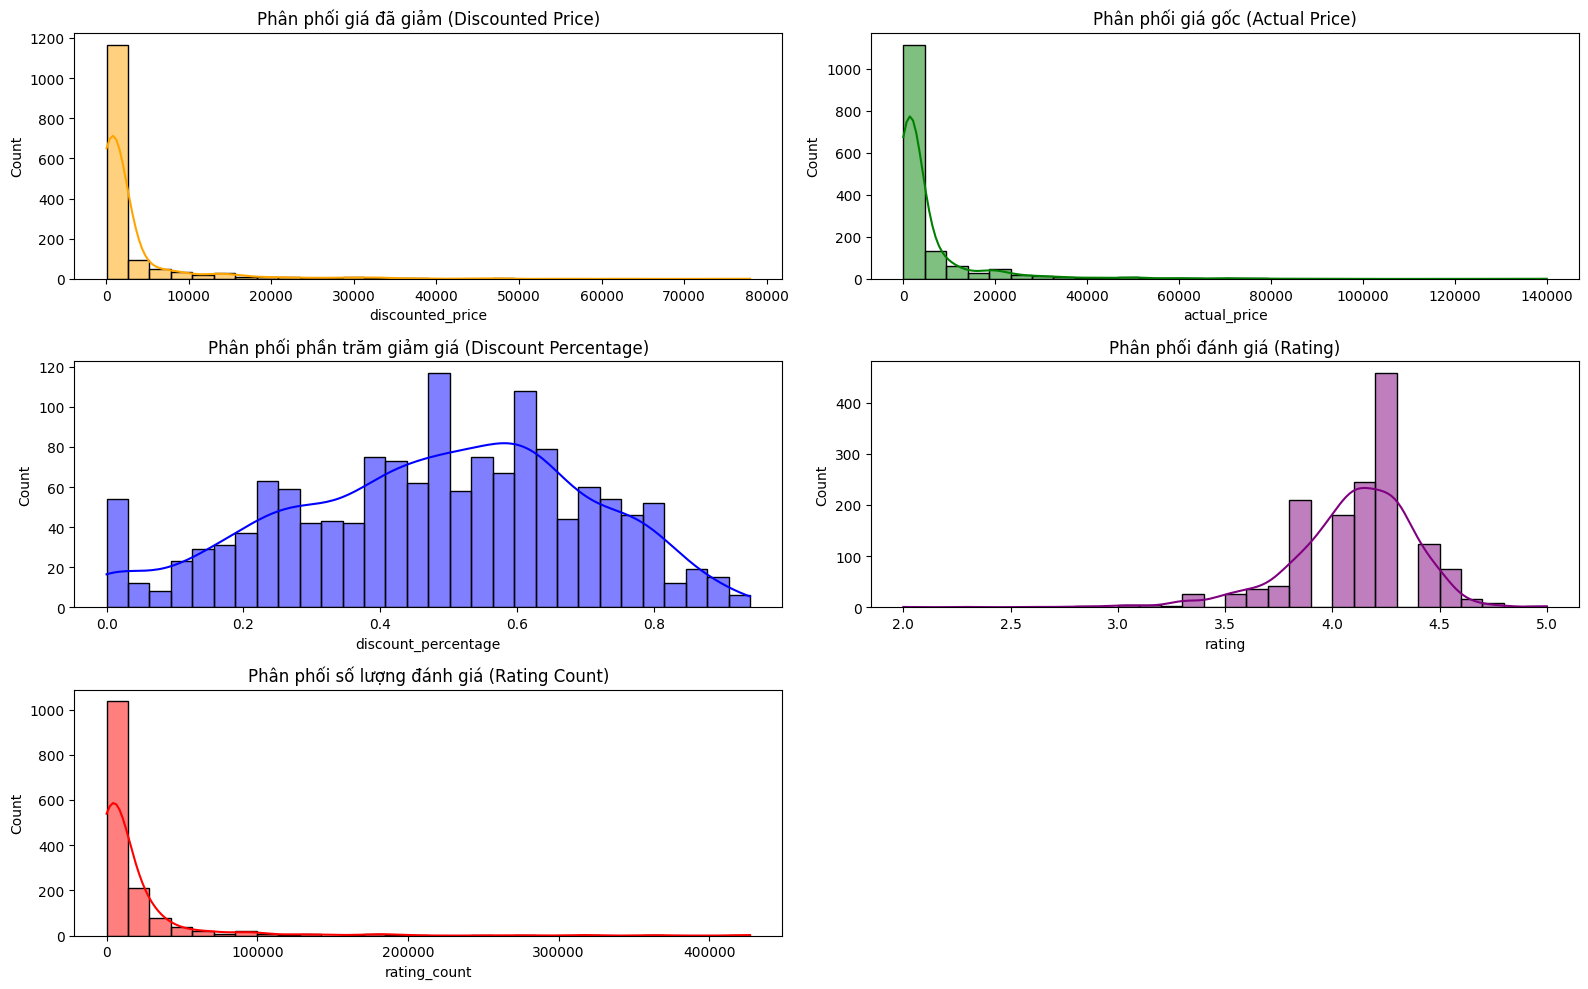

In [207]:
# Trực quan hóa phân phối của các cột số 
plt.figure(figsize=(16,10))
plt.subplot(3, 2, 1)
sns.histplot(df_processed['discounted_price'], bins=30, kde=True, color='orange')
plt.title('Phân phối giá đã giảm (Discounted Price)')
plt.subplot(3, 2, 2)
sns.histplot(df_processed['actual_price'], bins=30, kde=True, color='green')
plt.title('Phân phối giá gốc (Actual Price)')
plt.subplot(3,2,3)
sns.histplot(df_processed['discount_percentage'], bins=30, kde=True, color='blue')
plt.title('Phân phối phần trăm giảm giá (Discount Percentage)')
plt.subplot(3, 2, 4)
sns.histplot(df_processed['rating'], bins=30, kde=True, color='purple')
plt.title('Phân phối đánh giá (Rating)')
plt.subplot(3, 2, 5)
sns.histplot(df_processed['rating_count'], bins=30, kde=True, color='red')
plt.title('Phân phối số lượng đánh giá (Rating Count)')
plt.tight_layout()
plt.show()


**Các thuộc tính số đều có phân phối không chuẩn:**
- Discounted_price và actual_price có phân phối lệch phải: cho thấy giá gốc và giá đã giảm nằm ở mức thấp, nhiều nhất ở khoảng dưới 2000 Rupee (~$23/600.000VND).
- Phần trăm giảm giá (Discount percentage) phân phối trải rộng, tập trung nhiều nhất ở khoảng 40-60% cho một sản phẩm.
- Rating lại có phân phối lệch trái: cho thấy điểm đánh giá cho các sản phẩm khá cao, chủ yếu ở mức 3.5 - 4.5. 
- Số đánh giá cho mỗi sản phẩm có phân phối lệch phải: khoảng dưới 100.000 đánh giá cho một sản phẩm, một số ít có số lượng đánh giá cao.  


In [208]:
df_processed.describe(include='object')

product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1290   
top     B07JW9H4J1  Ambrane Unbreakable 60W 3A Fast Charging 1 5m ...   
freq             3                                                  7   

                                                 category  \
count                                                1465   
unique                                                211   
top     Computers&Accessories|Accessories&Peripherals|...   
freq                                                  233   

                                            about_product  \
count                                                1465   
unique                                               1271   
top     charge sync function cable come charging data ...   
freq                                                    6   

                                                  user_id  \
count                                                1465   
unique                                               1194   
top     AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...   
freq                                                   10   

                                                user_name  \
count                                                1465   
unique                                               1194   
top     $@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...   
freq                                                   10   

                                                review_id  \
count                                                1465   
unique                                               1194   
top     R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...   
freq                                                   10   

                                             review_title  \
count                                                1465   
unique                                               1194   
top     worked iphone work xr good one dull physical l...   
freq                                                   10   

                                           review_content  \
count                                                1465   
unique                                               1194   
top     worked iphone work iphone xr like still use wo...   
freq                                                   10   

                                                 img_link  \
count                                                1465   
unique                                               1412   
top     https://m.media-amazon.com/images/I/413sCRKobN...   
freq                                                    3   

                                             product_link main_category  \
count                                                1465          1465   
unique                                               1465             9   
top     https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...   Electronics   
freq                                                    1           526   

       specific_category  
count               1465  
unique               207  
top            USBCables  
freq                 233

- Danh mục sản phẩm chính xuất hiện nhiều nhất là Electronics và loại USBCables. 
- Các danh mục sản phẩm duy nhất: 9
- Các danh mục cụ thể nhất duy nhất: 207
- Có 1290 loại sản phẩm khác nhau 

## 4.2. Phân tích danh mục sản phẩm 

### Danh mục có nhiều sản phẩm nhất 

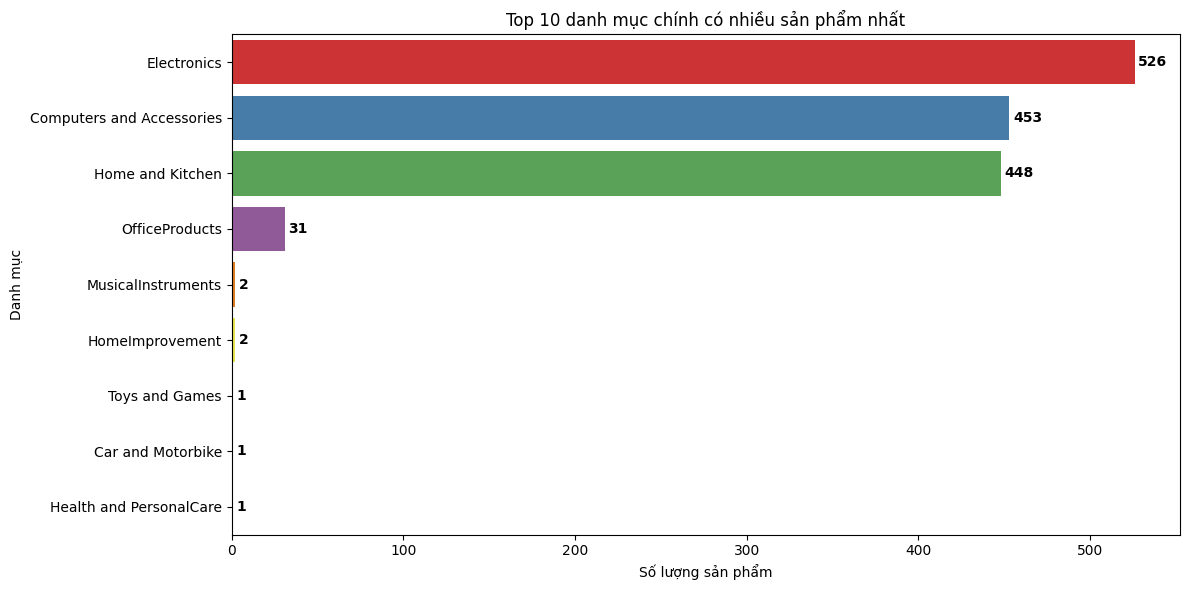

In [209]:
plt.figure(figsize=(12, 6))
top_categories = df_processed['main_category'].value_counts().head(10)

sns.barplot(y=top_categories.index, x=top_categories.values, palette='Set1', hue=top_categories.index)
for i, value in enumerate(top_categories.values):
    plt.text(value + 2, i, str(value), va='center', fontweight='bold', fontsize=10)

plt.title('Top 10 danh mục chính có nhiều sản phẩm nhất')
plt.xlabel('Số lượng sản phẩm')
plt.ylabel('Danh mục')
plt.tight_layout()
plt.show()

- Số lượng sản phẩm ở các danh mục Electronics, Computers and Accessories, Home and Kitchen. Những danh mục này có nhiều sản phẩm nhất, chiếm % lớn hơn trong tập dữ liệu - chiếm gần như toàn bộ dữ liệu (gần 80–90% tập), cho thấy sự mất cân bằng nghiêm trọng)
- Các danh mục còn lại như OfficeProducts, MusicalInstruments, Toys and Games, v.v. có số lượng rất nhỏ (từ 1 đến vài chục sản phẩm)

Danh mục có nhiều sản phẩm sẽ giúp mô hình học nhiều hơn về chúng, nhưng đồng thời gây mất cân bằng và sai lệch nếu không xử lý cẩn thận. Nên chú ý có thể gắn thêm trọng số hoặc chuẩn hóa theo danh mục. 


### Đánh giá trung bình của các danh mục sản phẩm 


Trung bình đánh giá theo danh mục chính:
main_category
OfficeProducts               4.309677
Toys and Games               4.300000
HomeImprovement              4.250000
Computers and Accessories    4.154967
Electronics                  4.081749
Home and Kitchen             4.040848
Health and PersonalCare      4.000000
MusicalInstruments           3.900000
Car and Motorbike            3.800000
Name: rating, dtype: float64


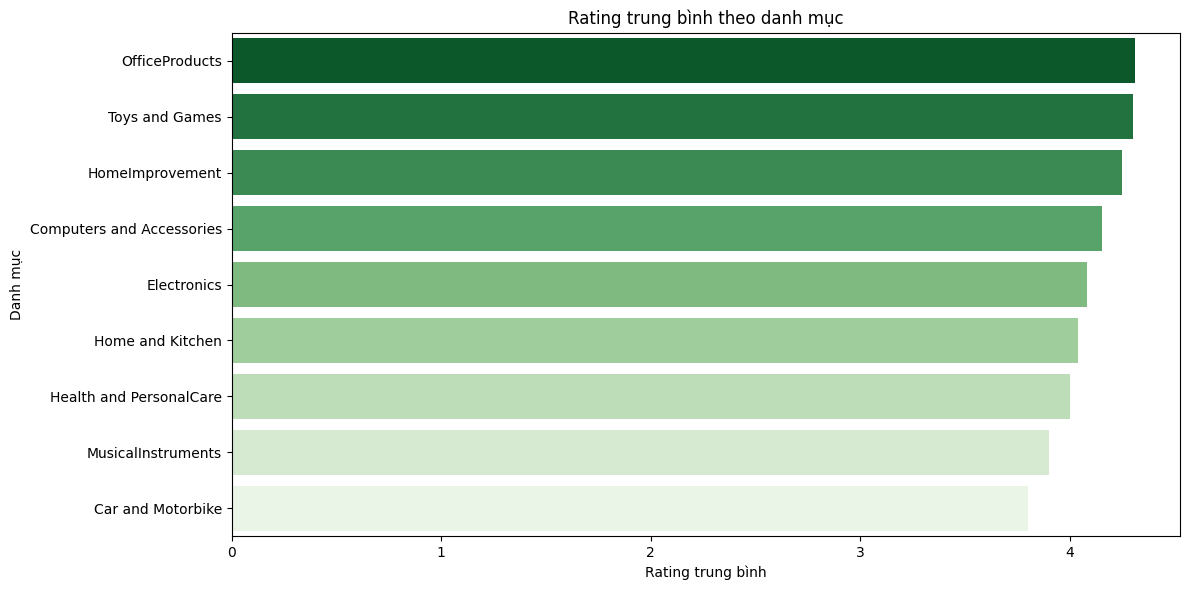

In [210]:
# Nhóm theo danh mục chính và tính trung bình của cột 'rating'
category_ratings = df_processed.groupby('main_category')['rating'].mean()
print("\nTrung bình đánh giá theo danh mục chính:")
print(category_ratings.sort_values(ascending=False).head(10))

# Rating trung bình theo danh mục
plt.figure(figsize=(12, 6))
category_ratings = df_processed.groupby('main_category')['rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(y=category_ratings.index, x=category_ratings.values, palette='Greens_r', hue=category_ratings.index)
plt.title('Rating trung bình theo danh mục')
plt.xlabel('Rating trung bình')
plt.ylabel('Danh mục')
plt.tight_layout()
plt.show()

- Các đánh giá cao nhất thuộc về danh mục sản phẩm văn phòng phẩm, đồ chơi và games.
- Đồ điện tử, danh mục sản phẩm cho nhà bếp, sức khỏe đánh giá nằm ở mức trung bình.
- Nhạc cụ và các loại xe mua qua sàn thương mại Amazon lại có đánh giá trung bình thấp. 
- Những danh mục có số lượng sản phẩm nhiều như Electronics, Computers and Accessories, Home and Kitchen có rating trung bình thấp hơn một chút → Có thể do: Sản phẩm đa dạng, chất lượng không đồng đều hoặc có nhiều review hơn nên rating phản ánh thực tế hơn.

Nếu dùng rating làm feature đầu vào cho mô hình: Nên cân nhắc rằng rating có thể bị thiên lệch theo danh mục. 

Nếu dùng rating để đánh giá chất lượng sản phẩm/danh mục: Nên kết hợp với số lượng đánh giá, vì rating cao nhưng chỉ có vài review thì không đủ tin cậy.



### Top 10 sản phẩm có số lượng đánh giá nhiều nhất ở các danh mục sản phẩm 

In [211]:
product_gr_cate_rating_count = df_processed.groupby(['main_category', 'product_name'])['rating_count'].sum().reset_index()
product_gr_cate_rating_count = product_gr_cate_rating_count.sort_values(by='rating_count', ascending=False)
print("\nSố lượng đánh giá theo danh mục chính và tên sản phẩm:")
product_gr_cate_rating_count.head(10)


Số lượng đánh giá theo danh mục chính và tên sản phẩm:


main_category  \
403                Electronics   
768                Electronics   
499                Electronics   
395                Electronics   
396                Electronics   
342  Computers and Accessories   
765                Electronics   
772                Electronics   
621                Electronics   
623                Electronics   

                                          product_name  rating_count  
403  AmazonBasics Flexible Premium HDMI Cable Black...        853945  
768  boAt Bassheads 100 in Ear Wired Earphones with...        727426  
499  JBL C100SI Wired In Ear Headphones with Mic JB...        577766  
395  Amazon Basics High Speed HDMI Cable 6 Feet 2 P...        426973  
396  Amazon Basics High Speed HDMI Cable 6 Feet Sup...        426973  
342  boAt Deuce USB 300 2 in 1 Type C and Micro USB...        377454  
765  boAt BassHeads 100 in Ear Wired Headphones wit...        363711  
772  boAt Bassheads 242 in Ear Wired Earphones with...        323356  
621  Redmi 9 Activ Carbon Black 4GB RAM 64GB Storag...        313836  
623  Redmi 9A Sport Coral Green 2GB RAM 32GB Storag...        313836

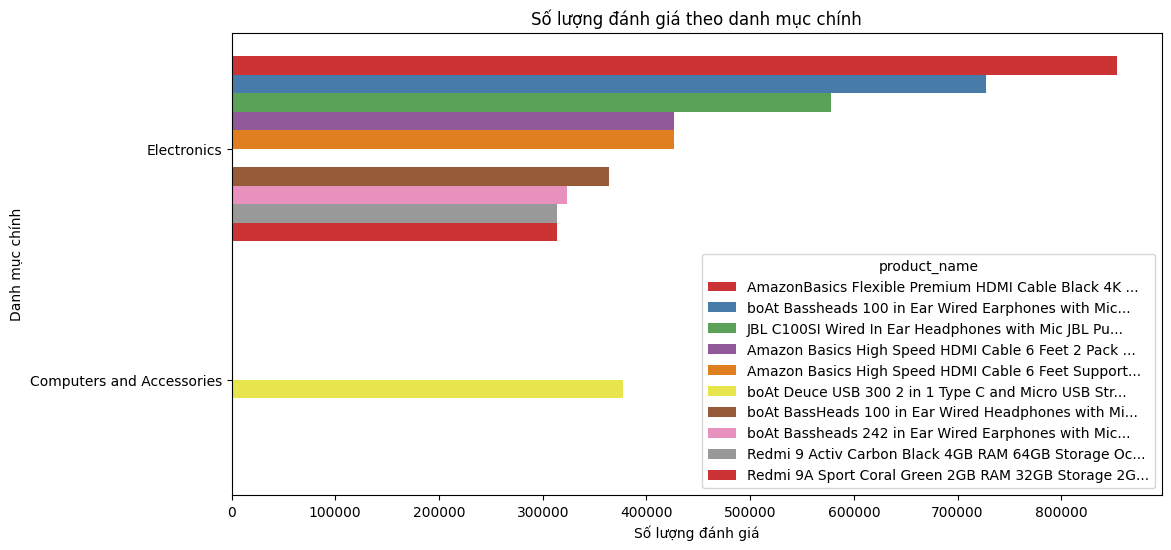

In [212]:
# Trực quan hóa số lượng đánh giá theo danh mục chính
plt.figure(figsize=(12, 6))
sns.barplot(x='rating_count', y='main_category', data=product_gr_cate_rating_count.head(10), palette='Set1', hue='product_name')
plt.title('Số lượng đánh giá theo danh mục chính')
plt.xlabel('Số lượng đánh giá')
plt.ylabel('Danh mục chính')
plt.show()

- Danh mục có số lượng sản phẩm được đánh giá nhiều nhất là Electronics, và điểm đánh giá trung bình cho danh mục này nằm ở mức 4.0 (Khá). Đứng đầu là Cáp AmazonBasics. 
- Danh mục cũng có sản phẩm bán chạy nằm trong Top 10 là Computers and Accessories với sản phẩm Deuce USB.  Mặc dù số lượng đánh giá của sản phẩm này rất cao, nhưng tổng thể danh mục này không có nhiều sản phẩm nổi bật khác như Electronics. Và Computers and Accessories cũng có rating trung bình là 4.15 nằm ở mức khá. <br>
**--> Những sản phẩm có số lượng đánh giá cao nhất trong từng danh mục có thể được coi là các mặt hàng bán chạy tiềm năng, ngay cả khi không có dữ liệu bán hàng trực tiếp.**

**Các mô hình phân tích cần chú ý rằng một số danh mục sẽ chiếm ưu thế hơn về mặt dữ liệu, có thể gây mất cân bằng nếu không xử lý (data imbalance). Những sản phẩm có số lượng đánh giá cao không đồng nghĩa với chất lượng cao → cần kết hợp với rating trung bình để đánh giá chính xác hơn.** 

### Tỷ lệ giảm giá trung bình thay đổi như thế nào giữa các danh mục sản phẩm

main_category
HomeImprovement              0.575000
Computers and Accessories    0.540243
Health and PersonalCare      0.530000
Electronics                  0.508289
MusicalInstruments           0.460000
Car and Motorbike            0.420000
Home and Kitchen             0.401205
OfficeProducts               0.123548
Toys and Games               0.000000
Name: discount_percentage, dtype: float64


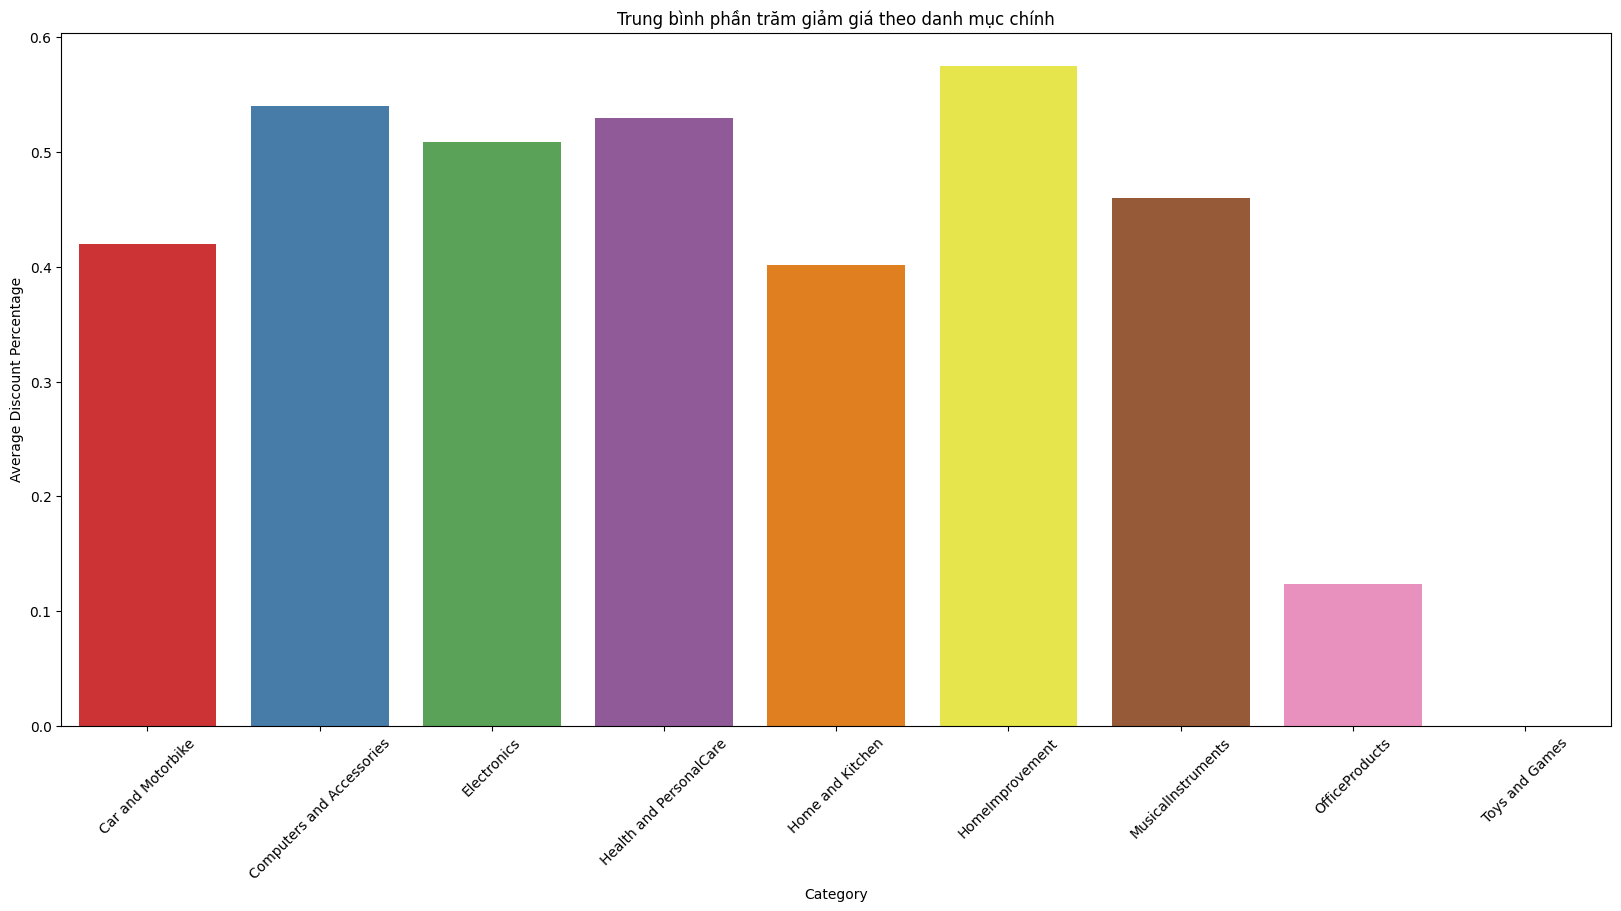

In [213]:
avg_discount_per_category = df_processed.groupby('main_category')['discount_percentage'].mean()
print(avg_discount_per_category.sort_values(ascending=False))
plt.figure(figsize=(20, 9))
sns.barplot(x=avg_discount_per_category.index, y=avg_discount_per_category.values, palette='Set1', hue=avg_discount_per_category.index)
plt.title('Trung bình phần trăm giảm giá theo danh mục chính')
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.ylabel("Average Discount Percentage")
plt.show()

Giảm giá nhiều nhất nằm ở danh mục HomeImprovement, Computers and Accessories và Health and PersonalCare. 

Home Improvement đứng đầu với mức giảm giá trung bình 58%, Computers and Accessories, Health and PersonalCare, và Electronics có mức giảm trung bình từ 51% đến 54%. Đây đều là những danh mục có nhu cầu cao.

Toys and Games: Không có dữ liệu hoặc mức giảm bằng 0 → Những danh mục này có thể ít được khuyến mãi, hoặc số lượng sản phẩm trong dataset còn hạn chế.

**Có danh mục gần như không có giảm giá (Toys and Games), trong khi danh mục khác có mức giảm trung bình rất cao → mô hình dễ bị mất cân bằng đặc trưng. Điều này có thể khiến mô hình thiên lệch về các đặc trưng của danh mục chiếm ưu thế trong dữ liệu**

## 4.3. Phân tích mối quan hệ giữa các biến

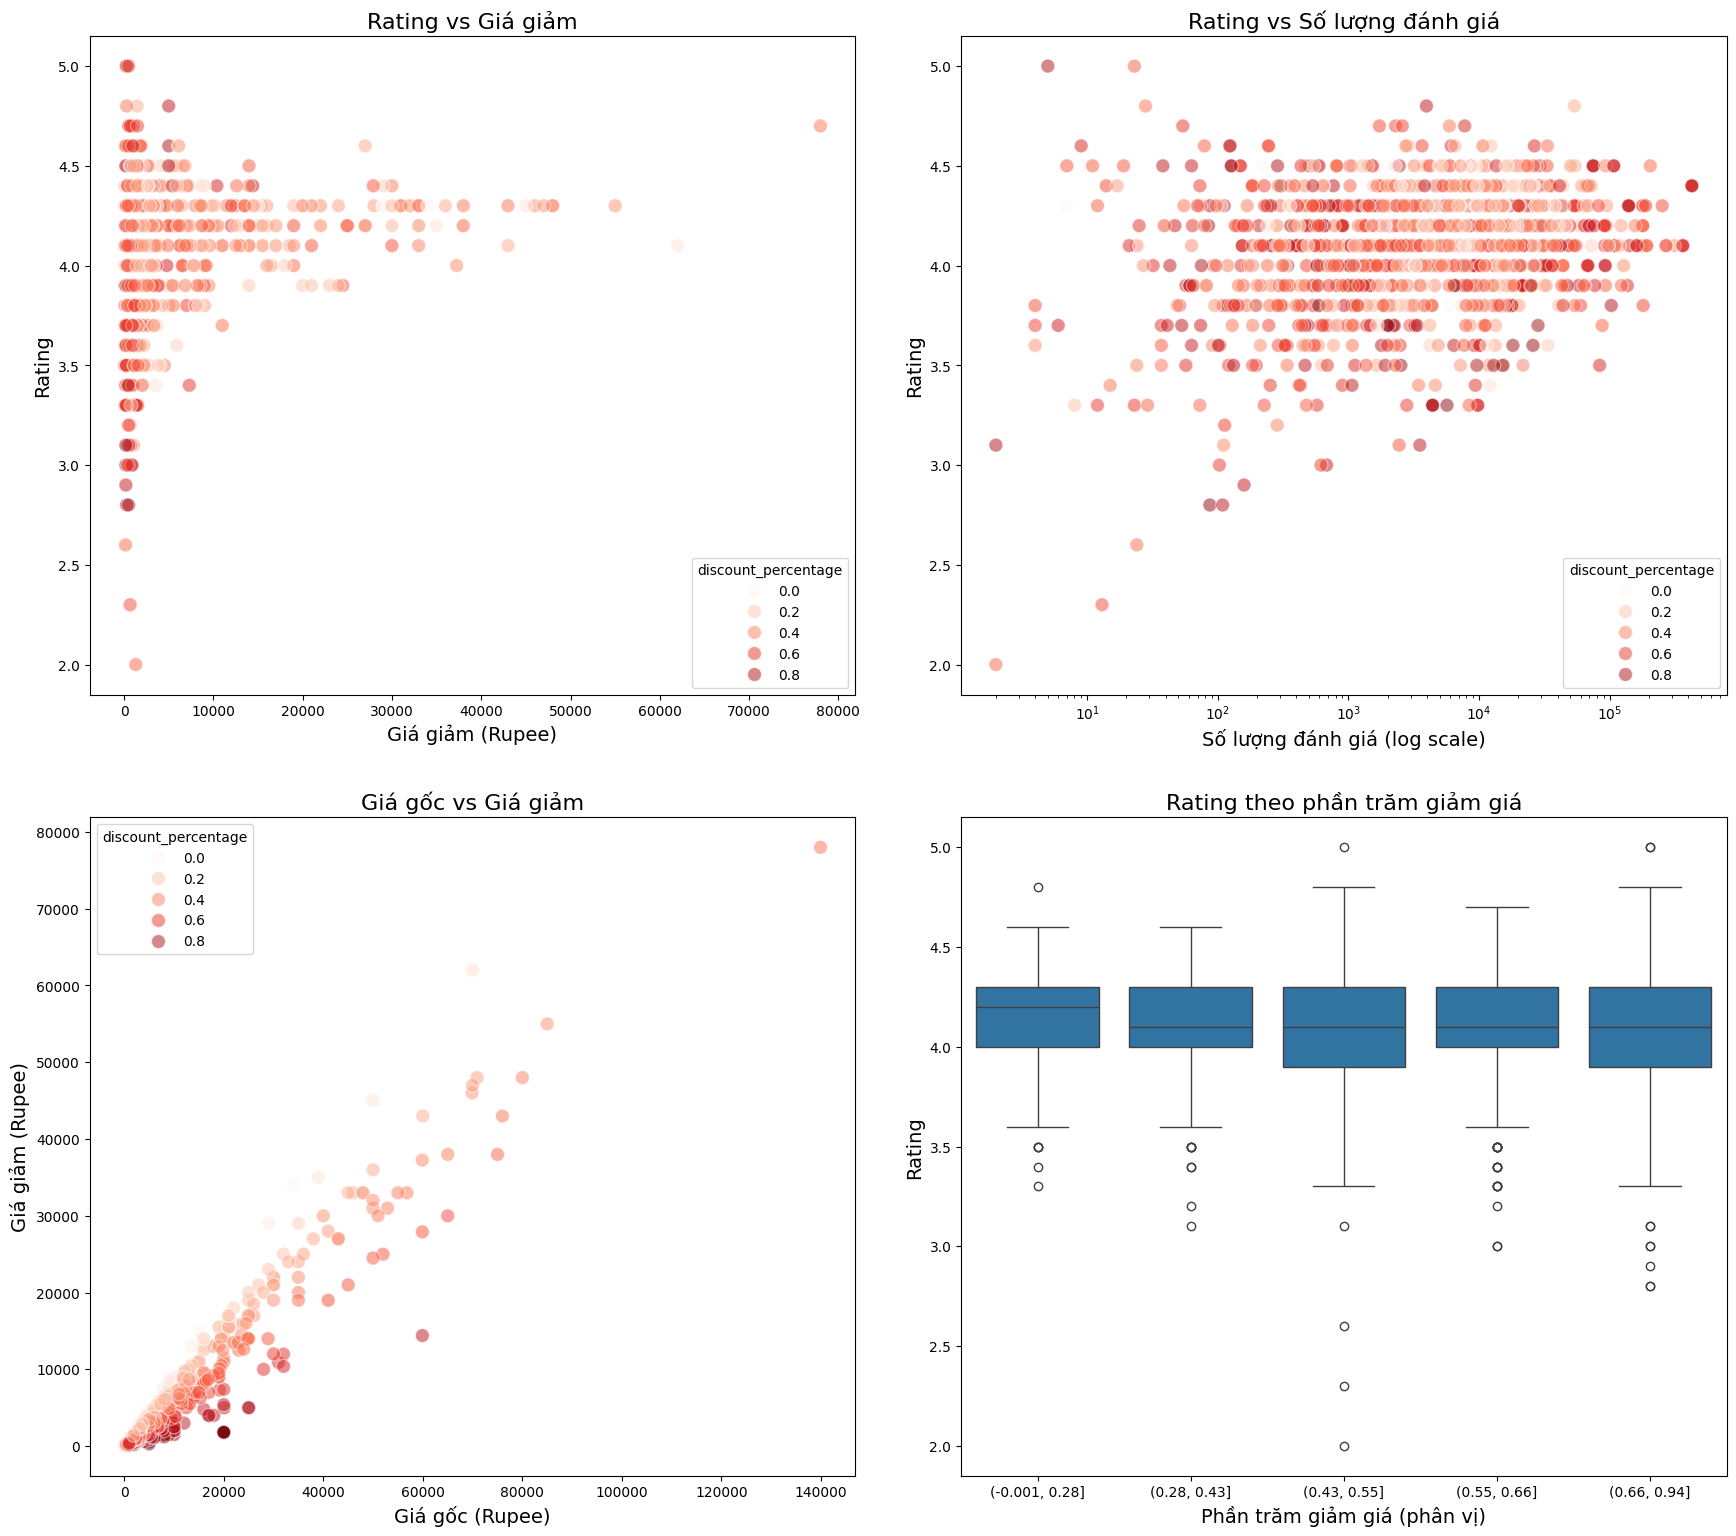

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, axes = plt.subplots(2, 2, figsize=(18, 16))  

# Rating vs Giá giảm
sns.scatterplot(
    data=df_processed, x='discounted_price', y='rating',
    alpha=0.5, hue='discount_percentage', palette='Reds', ax=axes[0, 0],
    s=100  
)
axes[0, 0].set_title('Rating vs Giá giảm', fontsize=16)
axes[0, 0].set_xlabel('Giá giảm (Rupee)', fontsize=14)
axes[0, 0].set_ylabel('Rating', fontsize=14)

# Rating vs Số lượng đánh giá
sns.scatterplot(
    data=df_processed, x='rating_count', y='rating',
    alpha=0.5, hue='discount_percentage', palette='Reds', ax=axes[0, 1],
    s=100
)
axes[0, 1].set_title('Rating vs Số lượng đánh giá', fontsize=16)
axes[0, 1].set_xlabel('Số lượng đánh giá (log scale)', fontsize=14)
axes[0, 1].set_ylabel('Rating', fontsize=14)
axes[0, 1].set_xscale('log')

# Giá gốc vs Giá giảm
sns.scatterplot(
    data=df_processed, x='actual_price', y='discounted_price',
    alpha=0.5, hue='discount_percentage', palette='Reds', ax=axes[1, 0],
    s=100
)
axes[1, 0].set_title('Giá gốc vs Giá giảm', fontsize=16)
axes[1, 0].set_xlabel('Giá gốc (Rupee)', fontsize=14)
axes[1, 0].set_ylabel('Giá giảm (Rupee)', fontsize=14)

# Rating theo phần trăm giảm giá
sns.boxplot(
    data=df_processed,
    x=pd.qcut(df_processed['discount_percentage'], 5),
    y='rating',
    ax=axes[1, 1]
)
axes[1, 1].set_title('Rating theo phần trăm giảm giá', fontsize=16)
axes[1, 1].set_xlabel('Phần trăm giảm giá (phân vị)', fontsize=14)
axes[1, 1].set_ylabel('Rating', fontsize=14)

plt.tight_layout(pad=3.0)
plt.show()

- Rating và giá giảm không có quan hệ tuyến tính với nhau, nghĩa là đánh giá cho một sản phẩm không phải do giá mà có thể do các yếu tố khác như chất lượng sản phẩm. Điểm đáng chú ý là các sản phẩm giá rất cao (>50,000 Rupee) hầu hết đều có rating tốt (>4.0), cho thấy ở phân khúc cao cấp, người tiêu dùng có xu hướng đánh giá tích cực hơn hoặc sản phẩm đáp ứng tốt hơn kỳ vọng cao của khách hàng.
- Rating và số lượng đánh giá cho một sản phẩm cũng không có quan hệ tuyến tính với nhau. Số lượng đánh giá không phản ánh rating của một sản phẩm. Nhìn theo thang logarit, các sản phẩm có số lượng đánh giá rất cao (>10^5) thường duy trì rating ổn định trong khoảng 3.8-4.5, không có nhiều sản phẩm có rating thấp trong nhóm này. Ngược lại, sự biến động về rating lớn nhất xuất hiện ở nhóm sản phẩm có số lượng đánh giá trung bình (10^2-10^3), cho thấy khi số lượng đánh giá tăng lên, rating có xu hướng hội tụ về mức trung bình cao.
- Giá gốc (Actual price) và giá giảm (Discounted_price) hiển nhiên có mối quan hệ tuyến tính với nhau. Và qua biểu đồ thấy rằng giá gốc càng cao thì % giảm giá càng ít đi, nghĩa là các sản phẩm phân khúc cao sẽ ít đưa ra chiến lược giảm giá hơn các sản phẩm có giá thấp hoặc trung bình. 
- Biểu đồ boxplot rating theo phần trăm giảm giá cho thất rating biến động không nhiều giữa các khoảng giám giá (khảng 3.5 - 4.7). Nhưng khoảng giảm giá ở mức 43% - 55% là có nhiều biến động (outliers) cho rating cực cao (5.0) hoặc cực thấp (2.0). Các sản phẩm giảm giá quá thấp (<28%) hoặc quá cao (>68%) có xu hướng ổn định hơn về rating với IQR hẹp hơn.

**Kết luận**:
Chất lượng sản phẩm (thể hiện qua rating) là độc lập với giá cả

Ở các phân khúc giá khác nhau có các chiến lược giảm giá khác nhau

Mức giảm giá 43-55% là khu vực "biến động" nhất về phản hồi khách hàng, có thể đòi hỏi nhà bán hàng cần thận trọng khi áp dụng chiến lược giảm giá này

## 4.4. Phân tích đánh giá

### Phân phối độ dài của review_conent (nội dung đánh giá)

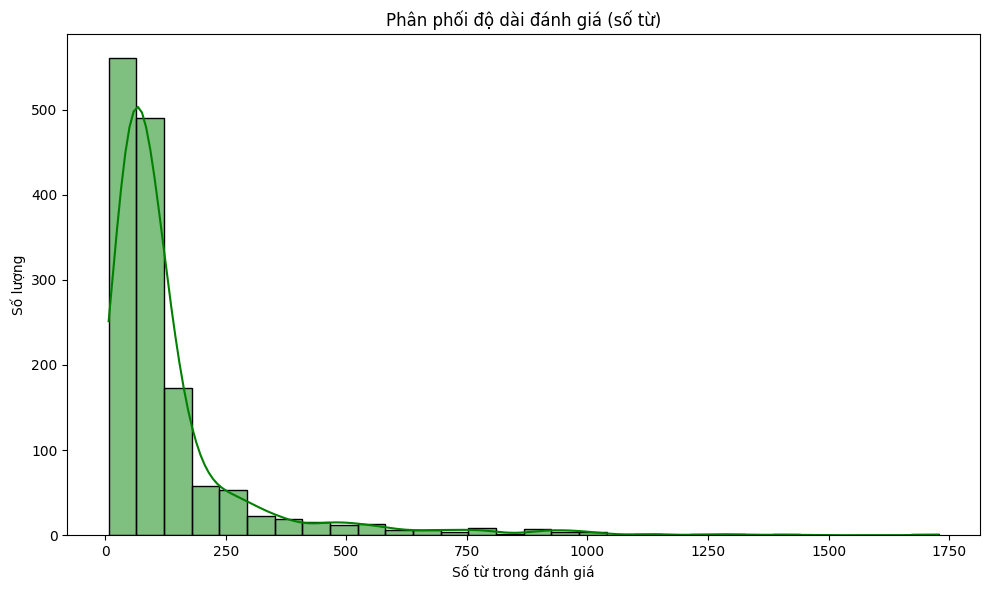

In [215]:
# Thống kê độ dài đánh giá
df_processed['review_length'] = df_processed['review_content'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)

plt.figure(figsize=(10, 6))
sns.histplot(df_processed['review_length'], bins=30, kde=True, color='green')
plt.title('Phân phối độ dài đánh giá (số từ)')
plt.xlabel('Số từ trong đánh giá')
plt.ylabel('Số lượng')
plt.tight_layout()
plt.show()

Phân phối lệch phải rõ rệt: Đa số đánh giá tập trung ở phạm vi ngắn (0-150 từ), với tần suất cao nhất ở khoảng 50-100 từ. 

Thấy được: Người dùng Amazon thường ưu tiên sự ngắn gọn, tập trung vào điểm chính khi đánh giá sản phẩm.

Rào cản thời gian: Người dùng không muốn đầu tư quá nhiều thời gian vào việc viết đánh giá, phản ánh hành vi tiêu dùng hiện đại - nhanh và hiệu quả.

### Từ ngữ phổ biến trong các đánh giá 

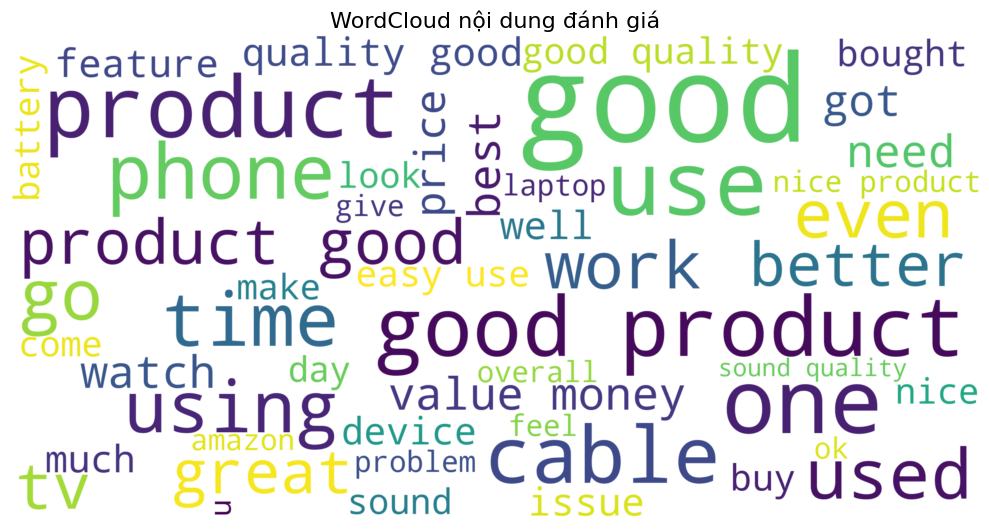

In [216]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np


# Kết hợp tất cả review content thành một chuỗi văn bản lớn
all_reviews = ' '.join([str(review) for review in df_processed['review_content'] if isinstance(review, str)])
stopwords = set(STOPWORDS)
custom_stopwords = {'the', 'and', 'to', 'is', 'in', 'it', 'of', 'for', 'this', 'that', 'a', 'on', 'i', 'was', 'with', 'my'}
stopwords.update(custom_stopwords)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    max_words=50,
    max_font_size=100,
    scale=3,
    random_state=42
).generate(all_reviews)

# Hiển thị wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud nội dung đánh giá', fontsize=16)
plt.tight_layout()
plt.show()

Những từ phổ biến đa số là đánh giá tích cực: good, nice, best, great, better, well và các từ liên quan đến các sản phẩm điện tử (cable, phone, battery, laptop,...) phản ánh đúng như các phân tích ở trên khi số lượng các sản phẩm ở danh mục Electronics nhiều nhất nên số lượng đánh giá cũng nhiều, và người dùng cũng có xu hướng để lại đánh giá cho các sản phẩm này. 

Phần lớn độ dài đánh giá cực ngắn (0-50 từ): Thường là phản hồi cảm xúc đơn giản ("Great!", "Good") hoặc chỉ liệt kê ưu, nhược điểm cơ bản (Easy use). 

## Kết luận: 
1. Phân phối dữ liệu số: 
- Giá sản phẩm (Discounted_price,  Actual_price) có phân phối lệch phải, dữ liệu tập trung ở phân khúc giá thấp.
- Phần trăm giảm giá (Discounted_percentage): Phân phối rộng, tập trung ở khoảng 40–60%. Đây là đặc trưng quan trọng có thể ảnh hưởng đến hành vi người dùng nhưng cần kiểm soát biến động ở khoảng 43–55% vì có nhiều outliers về rating.
- Điểm đánh giá (Rating): Phân phối lệch trái – chủ yếu nằm trong khoảng 3.5–4.5, dữ liệu rating thiên về tích cực, mô hình cần lưu ý tránh thiên lệch nếu dùng rating làm nhãn hoặc feature.
- Số lượng đánh giá (Review_count): Lệch phải, hầu hết sản phẩm có ít hơn 100.000 đánh giá.
2. Mất cân bằng dữ liệu theo danh mục: 
- Các danh mục như Electronics, Computers and Accessories, Home and Kitchen chiếm 80–90% dữ liệu. 
- Các danh mục khác chỉ có vài sản phẩm (OfficeProducts, Toys, MusicalInstruments…). 
3. Mối quan hệ giữa các đặc trưng: 
- Giá gốc và Giá sau giảm: Quan hệ tuyến tính rõ ràng → tránh dùng cả hai feature trong mô hình để tránh dư thừa.
- % giảm giá càng cao thường áp dụng cho sản phẩm giá rẻ → cần chuẩn hóa hoặc phân loại trước khi đưa vào mô hình.
4. Dữ liệu văn bản đánh giá:
- Đánh giá ngắn, từ tích cực nhiều.


# 5. XỬ LÝ OUTLIERS, NHIỄU 

In [217]:
# Tạo một bản sao của DataFrame đã xử lý để lưu trữ dữ liệu gốc trước khi bỏ outliers
df_raw = df_processed.copy()


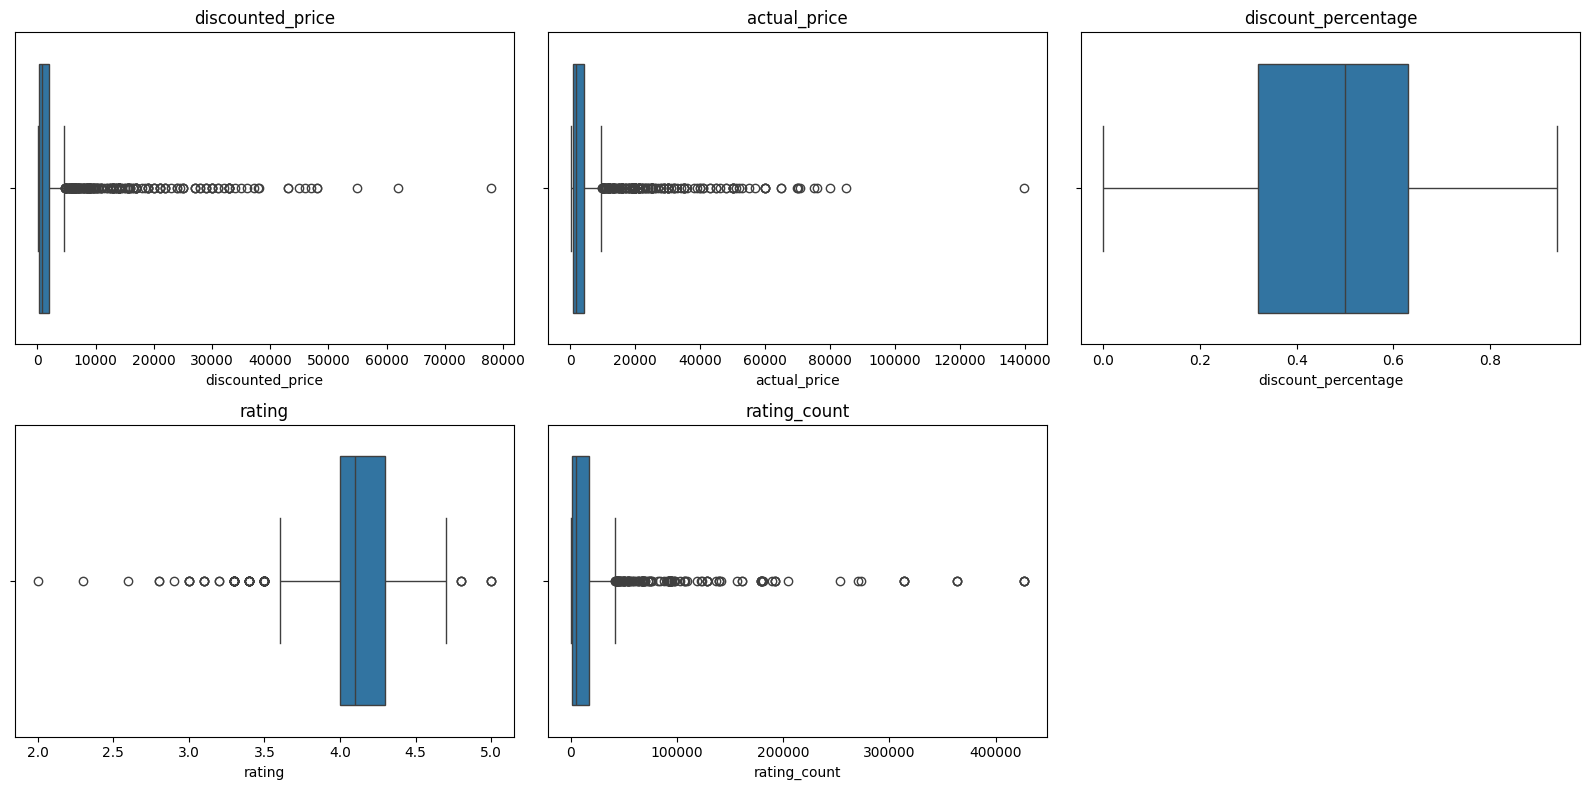

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

# Vẽ boxplot để kiểm tra outliers
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_processed[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [219]:
# Kiểm tra tỷ lệ outliers của từng biến số bằng phương pháp IQR
def compute_iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

def outlier_ratio_iqr(series):
    lower, upper = compute_iqr_bounds(series)
    outliers = ((series < lower) | (series > upper)).sum()
    ratio = outliers / series.shape[0]
    return outliers, ratio

print("Tỷ lệ outliers theo từng biến số:")
for col in numeric_cols:
    outliers, ratio = outlier_ratio_iqr(df_processed[col])
    print(f"{col}: {outliers} outliers ({ratio:.2%})")

Tỷ lệ outliers theo từng biến số:
discounted_price: 217 outliers (14.81%)
actual_price: 213 outliers (14.54%)
discount_percentage: 0 outliers (0.00%)
rating: 74 outliers (5.05%)
rating_count: 141 outliers (9.62%)


In [220]:
def remove_outliers(df, column):
    upper = df[column].quantile(0.95)
    return df[(df[column] <= upper)]

for col in ['discounted_price']:
    before = df_processed.shape[0]
    df_processed = remove_outliers(df_processed, col)
    after = df_processed.shape[0]
    print(f" Đã loại bỏ {(before - after)} dòng ngoài khoảng 90% trung tâm ở cột '{col}'.")

 Đã loại bỏ 71 dòng ngoài khoảng 90% trung tâm ở cột 'discounted_price'.


# 6. CHUẨN HÓA DỮ LIỆU VÀ TƯƠNG QUAN GIỮA CÁC BIẾN 

## 6.1. Chuẩn hóa dữ liệu số

In [221]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df_standard = df_processed.copy()
# Tạo cột 'rating_standard' để lưu rating chuẩn hóa, rating sẽ giữ nguyên
df_standard['rating_standard'] = df_standard['rating'].copy()
df_raw['rating_standard'] = df_raw['rating'].copy()
 
df_raw_standard = df_raw.copy()

numeric_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating_standard', 'rating_count']

# Chuẩn hóa các cột số
df_standard[numeric_cols] = scale.fit_transform(df_standard[numeric_cols])
df_raw_standard[numeric_cols] = scale.fit_transform(df_raw_standard[numeric_cols])

In [222]:
df_standard[numeric_cols].head()

discounted_price  actual_price  discount_percentage  rating_standard  \
0         -0.490149     -0.466290             0.713641         0.368402   
1         -0.559254     -0.610841            -0.256100        -0.307769   
2         -0.559254     -0.312103             1.914272        -0.645855   
3         -0.514336     -0.543384             0.205681         0.368402   
4         -0.574803     -0.601204             0.575106         0.368402   

   rating_count  
0      0.131197  
1      0.582417  
2     -0.242613  
3      1.734636  
4     -0.037259

## 6.2. Chuẩn hóa văn bản

In [223]:
#!pip install sentence-transformers

In [224]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# TF-IDF với 1000 chiều
tfidf = TfidfVectorizer(max_features=1000)
about_embeddings = tfidf.fit_transform(df_standard['about_product'])
print("Đã hoàn thành việc huấn luyện TfidfVectorizer.")

total_unique_words = len(tfidf.vocabulary_)

print(f"Tổng số từ độc lập trong tập dữ liệu là: {total_unique_words}")

Đã hoàn thành việc huấn luyện TfidfVectorizer.
Tổng số từ độc lập trong tập dữ liệu là: 1000


In [225]:
svd = TruncatedSVD(n_components=300, random_state=42) 
about_embeddings_reduced = svd.fit_transform(about_embeddings)
print("Phương sai giải thích được sau khi SVD:", svd.explained_variance_ratio_.sum())
# TF-IDF với product_name
product_name_embeddings = tfidf.fit_transform(df_standard['product_name'])
product_name_embeddings_reduced = svd.fit_transform(product_name_embeddings)
print("Phương sai giải thích được sau khi SVD cho product_name:", svd.explained_variance_ratio_.sum())
# TF-IDF với review_title
review_title_embeddings = tfidf.fit_transform(df_standard['review_title'])
review_title_embeddings_reduced = svd.fit_transform(review_title_embeddings)
print("Phương sai giải thích được sau khi SVD cho review_title:", svd.explained_variance_ratio_.sum())
# TF-IDF với review_content
review_content_embeddings = tfidf.fit_transform(df_standard['review_content'])
review_content_embeddings_reduced = svd.fit_transform(review_content_embeddings)
print("Phương sai giải thích được sau khi SVD cho review_content:", svd.explained_variance_ratio_.sum())

Phương sai giải thích được sau khi SVD: 0.8380305223886577
Phương sai giải thích được sau khi SVD cho product_name: 0.8083730967894126
Phương sai giải thích được sau khi SVD cho review_title: 0.8124265702703231
Phương sai giải thích được sau khi SVD cho review_content: 0.8097475326669995


Trong xử lý văn bản (text) với TF-IDF, dữ liệu thường có rất nhiều chiều nhưng nhiễu cao, nên giữ lại ~80% phương sai là lựa chọn cân bằng tốt giữa hiệu năng và độ chính xác.

## 6.3 Tương quan giữa các biến 

### Tương quan giữa các biến số 

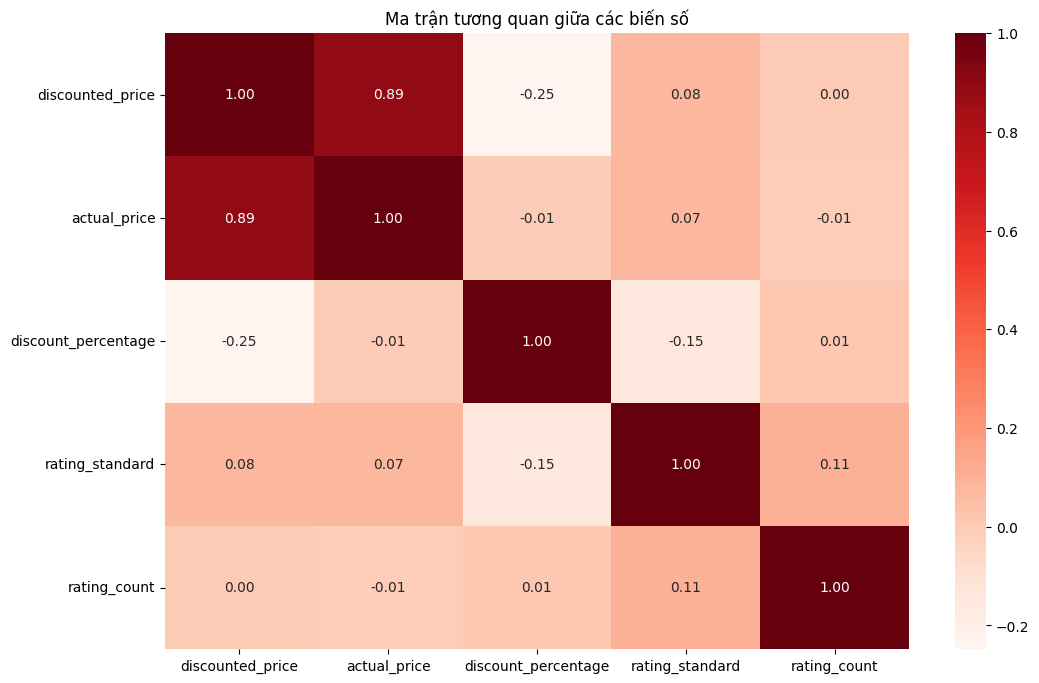

In [226]:
# Xem tương quan giữa các biến số
plt.figure(figsize=(12, 8))
sns.heatmap(df_standard[numeric_cols].corr(), annot=True, cmap='Reds', fmt='.2f')
plt.title('Ma trận tương quan giữa các biến số')
plt.show()

- Actual price và discounted price có tương quan thuận rất cao => Chỉ nên chọn một trong hai biến để tránh đa cộng tuyến và overfitting cho các mô hình. 
- Rating_standard và rating_count có tương quan thấp với các biến khác. 

### Tương quan giữa các biến text đã được SVD 

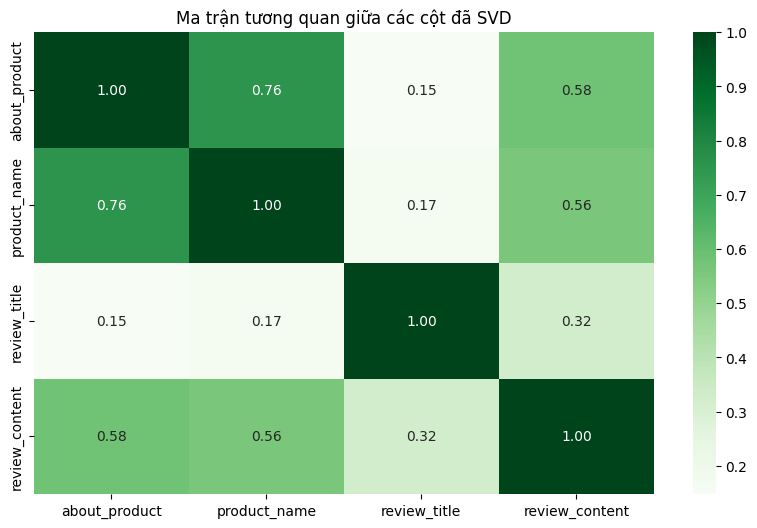

In [227]:
# Tính ma trận tương quan giữa các cột SVD 
correlation_matrix = pd.DataFrame({
    'about_product': about_embeddings_reduced[:, 0],
    'product_name': product_name_embeddings_reduced[:, 0],
    'review_title': review_title_embeddings_reduced[:, 0],
    'review_content': review_content_embeddings_reduced[:, 0]
}).corr()
# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f')
plt.title('Ma trận tương quan giữa các cột đã SVD')
plt.show()


- about_product và product_name có tương quan cao (0.76) -> nên chọn một trong hai biến cho mô hình.
- review_content có tương quan với các biến khác cao hơn so với review_title. 

### Tương quan giữa biến phân loại và biến số (bao gồm cả biến text được SVD)

In [228]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Tạo DataFrame chứa các embedding và biến phân loại
embedding_df = pd.DataFrame({
    'about_product_emb': about_embeddings_reduced[:, 0],
    'product_name_emb': product_name_embeddings_reduced[:, 0],
    'review_title_emb': review_title_embeddings_reduced[:, 0],
    'review_content_emb': review_content_embeddings_reduced[:, 0],
    'actual_price': df_standard['actual_price'],
    'discounted_price': df_standard['discounted_price'],
    'discount_percentage': df_standard['discount_percentage'],
    'rating_standard': df_standard['rating_standard'],
    'rating': df_standard['rating'],
    'rating_count': df_standard['rating_count'],
    'main_category': df_standard['main_category'],
    'specific_category': df_standard['specific_category']
})

# Danh sách các biến embedding và biến phân loại
numeric_vars = ['about_product_emb', 'product_name_emb', 'review_title_emb', 'review_content_emb', 'actual_price', 'discounted_price', 'discount_percentage', 'rating_standard', 'rating', 'rating_count']
categorical_vars = ['main_category', 'specific_category']

results_df = pd.DataFrame(columns=['categorical_variable', 'num_variable', 'F_value', 'p_value', 'significant'])

# Thực hiện ANOVA cho mỗi cặp biến
for cat_var in categorical_vars:
    # Kiểm tra số lượng mức của biến phân loại
    n_levels = embedding_df[cat_var].nunique()
    if n_levels > 50:
        print(f"Bỏ qua {cat_var} vì có quá nhiều mức ({n_levels})")
        continue
    
    for emb_var in numeric_vars:
        try:
            # Tạo formula cho mô hình ANOVA, xây dưng theo công thức: biến phụ thuộc ~ biến phân loại
            formula = f"{emb_var} ~ C({cat_var})"
            
            # Tạo mô hình
            model = ols(formula, data=embedding_df).fit()
            
            # Thực hiện ANOVA Type II
            # kiểm tra sự khác biệt trung bình của biến số theo từng nhóm phân loại
            anova_table = sm.stats.anova_lm(model, typ=2)
            f_value = anova_table['F'].iloc[0]
            p_value = anova_table['PR(>F)'].iloc[0]
            significant = p_value < 0.05
            
            # Thêm kết quả vào DataFrame
            row = {
                'categorical_variable': cat_var,
                'num_variable': emb_var,
                'F_value': f_value,
                'p_value': p_value,
                'significant': significant
            }
            results_df = pd.concat([results_df, pd.DataFrame([row])], ignore_index=True)
            
        except Exception as e:
            print(f"Lỗi khi phân tích {emb_var} theo {cat_var}: {str(e)}")

# Hiển thị kết quả
results_df = results_df.sort_values(['categorical_variable', 'p_value'])
print(results_df)


Bỏ qua specific_category vì có quá nhiều mức (203)
  categorical_variable         num_variable     F_value        p_value  \
1        main_category     product_name_emb  119.104679  1.349808e-151   
0        main_category    about_product_emb   97.545485  1.045514e-128   
3        main_category   review_content_emb   35.027754   1.044188e-50   
6        main_category  discount_percentage   31.742084   4.980846e-46   
4        main_category         actual_price   21.195613   1.381376e-30   
5        main_category     discounted_price   17.518328   4.635101e-25   
9        main_category         rating_count   10.851583   6.399195e-15   
8        main_category               rating    7.482752   8.263828e-10   
7        main_category      rating_standard    7.482752   8.263828e-10   
2        main_category     review_title_emb    4.431211   2.586444e-05   

  significant  
1        True  
0        True  
3        True  
6        True  
4        True  
5        True  
9        True  
8     

C:\Users\HP\AppData\Local\Temp\ipykernel_9972\1900793349.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([row])], ignore_index=True)


Các đặc trưng số và embedding đều bị ảnh hưởng mạnh bởi danh mục sản phẩm chính → điều này xác nhận mô hình hóa hay phân tích dữ liệu nên tính đến biến phân loại main_category để tránh sai lệch hoặc mất cân bằng.

Nếu dùng các embedding hoặc biến số này làm đầu vào mô hình dự báo hay phân cụm, cần lưu ý về phân phối khác biệt theo nhóm danh mục, mô hình có thể bị thiên lệch hoặc mất cân bằng do ảnh hưởng từ danh mục.

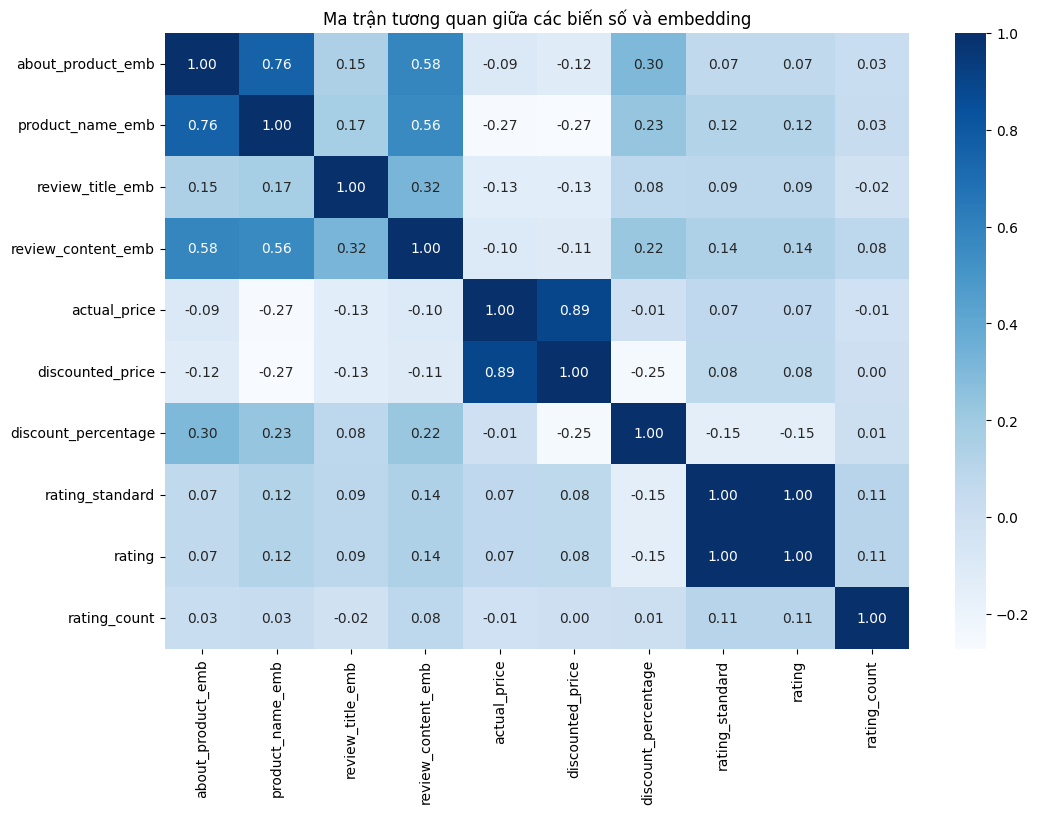

In [229]:
# Tương quan giữa emb và biến số bằng heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(embedding_df[numeric_vars].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Ma trận tương quan giữa các biến số và embedding')
plt.show()

## Lựa chọn các biến tối ưu:

Dựa trên kết quả **ANOVA** và **ma trận tương quan**, sử dụng các biến sau đây:
1. **`product_name_emb`**
   - **F-value:** 120.25 (cao nhất)
   - **Ý nghĩa:** Thể hiện mối liên hệ mạnh với danh mục sản phẩm.
2. **`about_product_emb`**
   - **F-value:** 97.65
   - **Ý nghĩa:** Mô tả thông tin chi tiết sản phẩm, cũng liên hệ mạnh với danh mục.
3. **`discounted_price`**
   - **F-value:** 17.52
   - **Ý nghĩa:** Đại diện cho giá thực tế người mua trả, rất quan trọng trong việc phân khúc theo giá.
4. **`rating`**
   - **F-value:** 7.48
   - **Ý nghĩa:** Mặc dù không cao, nhưng phản ánh sự đánh giá từ khách hàng – rất hữu ích trong phân cụm chất lượng.
---

Loại bỏ do đa cộng tuyến: 
- `actual_price` **bị loại** do tương quan cao với `discounted_price` (**r = 0.89**)
- `product_name_emb` và `about_product_emb` có tương quan cao (**r = 0.75**) ⇒ **chọn 1** trong 2 biến

Còn: 
- `review_title_emb`: F = 4.41 → **liên hệ yếu**, tương quan thấp, không cần đưa vào


# 7. XÂY DỰNG MÔ HÌNH HỒI QUY VÀ PHÂN LOẠI
Xây dựng các mô hình:
1.  **Hồi quy:** Dự đoán giá đã giảm (`discounted_price`) của sản phẩm.
2.  **Phân loại:** Dự đoán xem một sản phẩm có phải là sản phẩm được đánh giá cao hay không.

## 7.1. Chuẩn bị dữ liệu cho mô hình hồi quy và phân loại (tạo df_model_ml)

In [230]:
# Tạo bản sao df_processed để làm việc cho các mô hình.
df_model_ml = df_standard.copy()

In [231]:
# Đảm bảo các cột số là kiểu numeric và không có NaN 
cols_to_ensure_numeric_ml = ['discounted_price', 'actual_price', 'discount_percentage', 'rating_standard', 'rating', 'rating_count']
for col in cols_to_ensure_numeric_ml:
    df_model_ml[col] = pd.to_numeric(df_model_ml[col], errors='coerce')
    df_model_ml[col] = df_model_ml[col].fillna(df_model_ml[col].median())

In [232]:
# Tạo đặc trưng mới từ các cột giá
# Sự chênh lệch giá giữa giá thực tế và giá đã giảm
df_model_ml['price_diff'] = df_model_ml['actual_price'] - df_model_ml['discounted_price']
# Tỷ lệ giá đã giảm so với giá thực tế
df_model_ml['price_ratio'] = np.where(df_model_ml['actual_price'] != 0, 
                                   df_model_ml['discounted_price'] / df_model_ml['actual_price'], 
                                   0) 

# Tạo biến mục tiêu cho Phân loại 
df_model_ml['rating_label'] = df_model_ml['rating'].apply(lambda x: 1 if x >= 4.0 else 0)

# Mã hóa One-Hot cho 'main_category' 
df_model_ml = pd.get_dummies(df_model_ml, columns=['main_category'], prefix='cat', dummy_na=False)

# Loại bỏ các cột không cần thiết cho mô hình
cols_to_drop_ml_specific = ['product_id', 'product_name', 'category', 'about_product', 
                            'user_id', 'user_name', 'review_id', 'review_title', 
                            'review_content', 'img_link', 'product_link', 'specific_category']

df_model_ml.drop(columns=[col for col in cols_to_drop_ml_specific if col in df_model_ml.columns], inplace=True, errors='ignore')

# --- Loại bỏ các dòng có NaN còn sót lại ---
print(f"Kích thước df_model_ml trước khi dropna cho ML: {df_model_ml.shape}")
df_model_ml.dropna(inplace=True)
print(f"Kích thước df_model_ml sau khi dropna cho ML: {df_model_ml.shape}")

print("\nThông tin df_model_ml sau chuẩn bị cho ML:")
df_model_ml.info()
print("\n5 dòng đầu của df_model_ml:")
df_model_ml.head()

Kích thước df_model_ml trước khi dropna cho ML: (1394, 19)
Kích thước df_model_ml sau khi dropna cho ML: (1394, 19)

Thông tin df_model_ml sau chuẩn bị cho ML:
<class 'pandas.core.frame.DataFrame'>
Index: 1394 entries, 0 to 1464
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   discounted_price               1394 non-null   float64
 1   actual_price                   1394 non-null   float64
 2   discount_percentage            1394 non-null   float64
 3   rating                         1394 non-null   float64
 4   rating_count                   1394 non-null   float64
 5   review_length                  1394 non-null   int64  
 6   rating_standard                1394 non-null   float64
 7   price_diff                     1394 non-null   float64
 8   price_ratio                    1394 non-null   float64
 9   rating_label                   1394 non-null   int64  
 10  cat_Car and M

discounted_price  actual_price  discount_percentage  rating  rating_count  \
0         -0.490149     -0.466290             0.713641     4.2      0.131197   
1         -0.559254     -0.610841            -0.256100     4.0      0.582417   
2         -0.559254     -0.312103             1.914272     3.9     -0.242613   
3         -0.514336     -0.543384             0.205681     4.2      1.734636   
4         -0.574803     -0.601204             0.575106     4.2     -0.037259   

   review_length  rating_standard  price_diff  price_ratio  rating_label  \
0             40         0.368402    0.023859     1.051167             1   
1            118        -0.307769   -0.051586     0.915549             1   
2             11        -0.645855    0.247152     1.791893             0   
3             47         0.368402   -0.029048     0.946542             1   
4            245         0.368402   -0.026401     0.956087             1   

   cat_Car and Motorbike  cat_Computers and Accessories  cat_Electronics  \
0                  False                           True            False   
1                  False                           True            False   
2                  False                           True            False   
3                  False                           True            False   
4                  False                           True            False   

   cat_Health and PersonalCare  cat_Home and Kitchen  cat_HomeImprovement  \
0                        False                 False                False   
1                        False                 False                False   
2                        False                 False                False   
3                        False                 False                False   
4                        False                 False                False   

   cat_MusicalInstruments  cat_OfficeProducts  cat_Toys and Games  
0                   False               False               False  
1                   False               False               False  
2                   False               False               False  
3                   False               False               False  
4                   False               False               False

## 7.2. Mô hình hồi quy: dự đoán `discounted_price`
**Câu hỏi:** "Dựa vào các đặc điểm như giá gốc, phần trăm giảm giá, điểm đánh giá (rating), số lượt đánh giá (rating_count) và danh mục chính (main_category), dự đoán giá đã giảm (discounted_price) của sản phẩm?"

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Chuẩn bị dữ liệu ---
cat_cols_reg_ml = [col for col in df_model_ml.columns if col.startswith('cat_')]
num_features_reg_ml = ['actual_price', 'discount_percentage', 'rating_standard', 'rating_count'] 
X_reg_cols_ml = num_features_reg_ml + cat_cols_reg_ml

X_reg = df_model_ml[X_reg_cols_ml]
y_reg = df_model_ml['discounted_price']

# Chia dữ liệu
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Chuẩn hóa các cột số
scaler_reg = StandardScaler()
X_reg_train_scaled = X_reg_train.copy()
X_reg_test_scaled = X_reg_test.copy()

X_reg_train_scaled[num_features_reg_ml] = scaler_reg.fit_transform(X_reg_train[num_features_reg_ml])
X_reg_test_scaled[num_features_reg_ml] = scaler_reg.transform(X_reg_test[num_features_reg_ml])

print(f"Số lượng features cho mô hình: {X_reg_train_scaled.shape[1]}")
print(f"Kích thước tập huấn luyện mô hình: {X_reg_train_scaled.shape}, Nhãn: {y_reg_train.shape}")
print(f"Kích thước tập kiểm tra mô hình: {X_reg_test_scaled.shape}, Nhãn: {y_reg_test.shape}")

Số lượng features cho mô hình: 13
Kích thước tập huấn luyện mô hình: (1115, 13), Nhãn: (1115,)
Kích thước tập kiểm tra mô hình: (279, 13), Nhãn: (279,)


### 7.2.1. Hồi quy tuyến tính (Linear Regression)

In [234]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_reg_train_scaled, y_reg_train)
y_reg_pred_lr = lr_model.predict(X_reg_test_scaled)

lr_rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred_lr))
lr_r2 = r2_score(y_reg_test, y_reg_pred_lr)

print(f"Linear Regression RMSE: {lr_rmse:.2f}")
print(f"Linear Regression R2 Score: {lr_r2:.4f}")

Linear Regression RMSE: 0.33
Linear Regression R2 Score: 0.8515


Mô hình có sai số RMSE khá thấp, và R2 khá cao (giải thích được 85% biến động của dữ liệu). 

### 7.2.2. Mạng neural nhân tạo (ANN) cho hồi quy

**Cấu trúc ANN cho hồi quy:**
- **Input Layer:** Số neuron bằng số lượng features đầu vào.
- **Hidden Layer 1:** 128 neurons, hàm kích hoạt 'relu'. Sử dụng `Dropout(0.3)`.
- **Hidden Layer 2:** 64 neurons, hàm kích hoạt 'relu'. Sử dụng `Dropout(0.3)`.
- **Hidden Layer 3:** 32 neurons, hàm kích hoạt 'relu'.
- **Output Layer:** 1 neuron, không có hàm kích hoạt (hoặc 'linear').

**Biên dịch và Huấn luyện:**
- **Optimizer:** 'adam'.
- **Loss Function:** 'mean_squared_error' (MSE).
- **Metrics:** 'mean_absolute_error' (MAE).
- **Callbacks:** `EarlyStopping` (patience=10).

Tóm tắt mô hình ANN Hồi quy:


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_87 (Dense)                │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8464 - mae: 0.5156 - val_loss: 0.3351 - val_mae: 0.2953
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3277 - mae: 0.3166 - val_loss: 0.1004 - val_mae: 0.1566
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3097 - mae: 0.2705 - val_loss: 0.0609 - val_mae: 0.1574
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1540 - mae: 0.2434 - val_loss: 0.0458 - val_mae: 0.1565
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1068 - mae: 0.2105 - val_loss: 0.0363 - val_mae: 0.1307
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1016 - mae: 0.1989 - val_loss: 0.0272 - val_mae: 0.1174
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1058 - mae: 0.2019 - val_loss: 0.0302 - val_mae: 0.1261
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0723 - mae: 0.1713 - val_loss: 0.0294 - val_mae: 0.1230
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.076

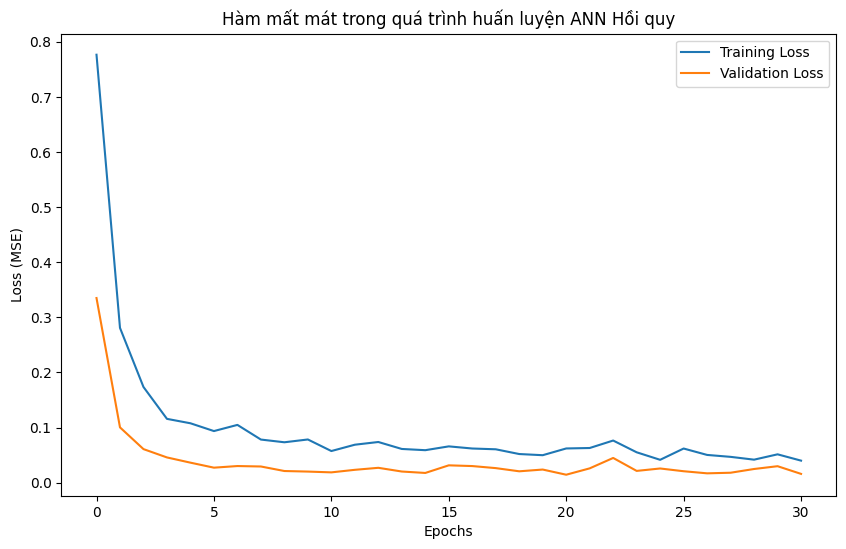

In [235]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score

input_dim_reg = X_reg_train_scaled.shape[1]

ann_reg_model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim_reg,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1) 
])

ann_reg_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
print("Tóm tắt mô hình ANN Hồi quy:")
ann_reg_model.summary()

early_stopping_reg = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

X_reg_train_scaled = X_reg_train_scaled.values.astype(np.float32)
y_reg_train = y_reg_train.values.astype(np.float32)


history_reg = ann_reg_model.fit(
    X_reg_train_scaled, y_reg_train,
    epochs=100, 
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping_reg],
    verbose=1 
)

plt.figure(figsize=(10, 6))
plt.plot(history_reg.history['loss'], label='Training Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title('Hàm mất mát trong quá trình huấn luyện ANN Hồi quy')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

Đồ thị cho thấy một quá trình huấn luyện khá tốt:
- Điểm hội tụ tốt: Mô hình đạt MSE thấp sau khi huấn luyện (khoảng 0.03-0.05) cho cả tập huấn luyện và kiểm định.
- Không có overfitting nghiêm trọng: Validation loss nhìn chung thấp hơn training loss trong hầu hết các epoch, không thấy hiện tượng validation loss tăng cao khi training loss tiếp tục giảm.

In [236]:
X_reg_test_scaled = X_reg_test_scaled.values.astype(np.float32)

# Tính toán RMSE và R2 Score trên tập test
y_reg_pred_ann = ann_reg_model.predict(X_reg_test_scaled).flatten()
ann_reg_rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred_ann))
ann_reg_r2 = r2_score(y_reg_test, y_reg_pred_ann)

print(f"\nANN Regression RMSE trên tập test: {ann_reg_rmse:.2f}")
print(f"ANN Regression R2 Score trên tập test: {ann_reg_r2:.4f}")

# Lưu mô hình ANN Hồi quy
ann_reg_model.save('ann_regression_model.h5')


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 



ANN Regression RMSE trên tập test: 0.12
ANN Regression R2 Score trên tập test: 0.9812


## 7.3. Mô hình phân loại: Dự đoán `rating_label`

**Câu hỏi:** "Dựa vào các đặc điểm sản phẩm, hãy dự đoán xem sản phẩm đó có rating cao (>=4.0 là 'Cao' - 1, ngược lại là 'Thấp' - 0) hay không?"

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Chuẩn bị dữ liệu ---
cat_cols_cls_ml = [col for col in df_model_ml.columns if col.startswith('cat_')]
num_features_cls_ml = ['discounted_price', 'actual_price', 'discount_percentage', 
                       'rating_count', 'price_diff', 'price_ratio']
X_cls_cols_ml = num_features_cls_ml + cat_cols_cls_ml

X_cls = df_model_ml[X_cls_cols_ml]
y_cls = df_model_ml['rating_label']

# Chia dữ liệu
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

# Chuẩn hóa các cột số
scaler_cls = StandardScaler()
X_cls_train_scaled = X_cls_train.copy()
X_cls_test_scaled = X_cls_test.copy()

X_cls_train_scaled[num_features_cls_ml] = scaler_cls.fit_transform(X_cls_train[num_features_cls_ml])
X_cls_test_scaled[num_features_cls_ml] = scaler_cls.transform(X_cls_test[num_features_cls_ml])

print(f"Số lượng features cho phân loại: {X_cls_train_scaled.shape[1]}")
print(f"Kích thước tập huấn luyện phân loại: {X_cls_train_scaled.shape}, Nhãn: {y_cls_train.shape}")
print(f"Kích thước tập kiểm tra phân loại: {X_cls_test_scaled.shape}, Nhãn: {y_cls_test.shape}")
print(f"Phân phối nhãn trong tập huấn luyện:\n{y_cls_train.value_counts(normalize=True)}")
print(f"Phân phối nhãn trong tập kiểm tra:\n{y_cls_test.value_counts(normalize=True)}")

Số lượng features cho phân loại: 15
Kích thước tập huấn luyện phân loại: (1115, 15), Nhãn: (1115,)
Kích thước tập kiểm tra phân loại: (279, 15), Nhãn: (279,)
Phân phối nhãn trong tập huấn luyện:
rating_label
1    0.749776
0    0.250224
Name: proportion, dtype: float64
Phân phối nhãn trong tập kiểm tra:
rating_label
1    0.749104
0    0.250896
Name: proportion, dtype: float64


### 7.3.1. Hồi quy Logistic (Logistic Regression)

Logistic Regression Accuracy: 0.7563

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.62      0.07      0.13        70
           1       0.76      0.99      0.86       209

    accuracy                           0.76       279
   macro avg       0.69      0.53      0.49       279
weighted avg       0.73      0.76      0.68       279



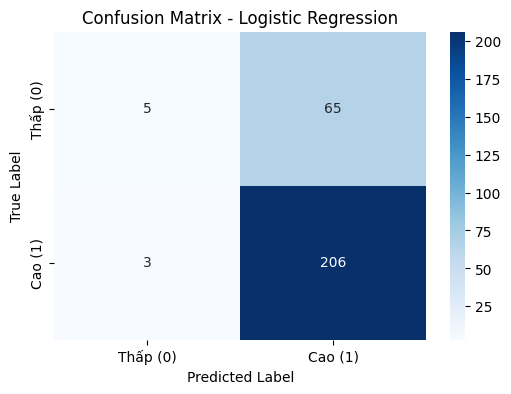

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg_model = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')
logreg_model.fit(X_cls_train_scaled, y_cls_train)
y_cls_pred_logreg = logreg_model.predict(X_cls_test_scaled)

logreg_accuracy = accuracy_score(y_cls_test, y_cls_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print("\nClassification Report (Logistic Regression):\n", classification_report(y_cls_test, y_cls_pred_logreg))

cm_logreg = confusion_matrix(y_cls_test, y_cls_pred_logreg)
plt.figure(figsize=(6,4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Thấp (0)', 'Cao (1)'], yticklabels=['Thấp (0)', 'Cao (1)'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 7.3.2. Random Forest


Độ chính xác (Random Forest): 0.7885

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.62      0.40      0.49        70
           1       0.82      0.92      0.87       209

    accuracy                           0.79       279
   macro avg       0.72      0.66      0.68       279
weighted avg       0.77      0.79      0.77       279



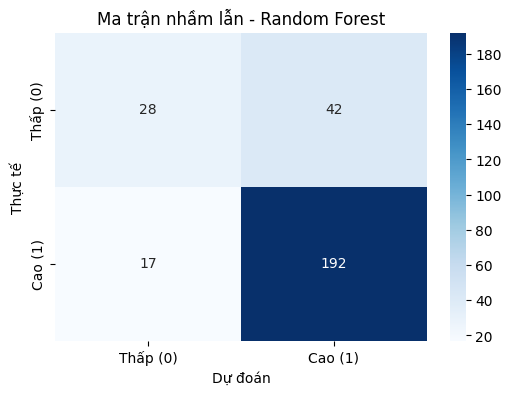

In [239]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

rf_model = RandomForestClassifier(
    n_estimators=300,         # Số lượng cây trong rừng (tăng lên giúp mô hình ổn định hơn)
    max_depth=30,             # Độ sâu tối đa của mỗi cây (ngăn overfitting)
    max_features='sqrt',      # Số lượng đặc trưng được chọn ngẫu nhiên tại mỗi node: sqrt(tổng số đặc trưng)
    min_samples_split=3,      # Số mẫu tối thiểu để chia một node (node chỉ tách nếu có ≥ 3 mẫu)
    min_samples_leaf=1,       # Số mẫu tối thiểu trong mỗi lá (leaf node)
    class_weight='balanced',  # Tự động cân bằng trọng số giữa các lớp (giúp nếu dữ liệu mất cân bằng)
    random_state=42           # Đặt seed để tái lập kết quả giống nhau mỗi lần chạy
)

# Huấn luyện mô hình trên dữ liệu huấn luyện
rf_model.fit(X_cls_train_scaled, y_cls_train)

# Dự đoán kết quả trên dữ liệu kiểm tra
y_pred = rf_model.predict(X_cls_test_scaled)

# Tính độ chính xác (accuracy)
acc = accuracy_score(y_cls_test, y_pred)
print(f"\nĐộ chính xác (Random Forest): {acc:.4f}")

# In ra các chỉ số precision, recall, f1-score cho từng lớp
print("\nBáo cáo phân loại:\n", classification_report(y_cls_test, y_pred, zero_division=0))

cm = confusion_matrix(y_cls_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Thấp (0)', 'Cao (1)'],  # Nhãn trục x (dự đoán)
            yticklabels=['Thấp (0)', 'Cao (1)'])  # Nhãn trục y (thực tế)
plt.title('Ma trận nhầm lẫn - Random Forest')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()


## 7.4. So sánh và kết luận mô hình hồi quy và phân loại

### 7.4.1. Đánh giá các mô hình hồi quy (Dự đoán `discounted_price`)

**Câu hỏi nghiên cứu:** "Dựa vào các đặc điểm như giá gốc, phần trăm giảm giá, điểm đánh giá (rating), số lượt đánh giá (rating_count) và danh mục chính (main_category), hãy dự đoán giá đã giảm (discounted_price) của sản phẩm?"

**Các kỹ thuật khai phá được áp dụng:**

1.  **Hồi quy Tuyến tính (Linear Regression):**
    *   **Mô tả:** Là một mô hình hồi quy cơ bản, giả định mối quan hệ tuyến tính giữa các biến độc lập (features) và biến phụ thuộc (giá đã giảm).
    *   **Ưu điểm:**
        *   Đơn giản, dễ hiểu và dễ triển khai.
        *   Tính toán nhanh, không đòi hỏi nhiều tài nguyên.
        *   Cung cấp diễn giải trực quan về mối quan hệ giữa các biến thông qua các hệ số hồi quy.
    *   **Nhược điểm (đối với tập dữ liệu này):**
        *   **Giả định tuyến tính:** Tập dữ liệu Amazon có thể chứa các mối quan hệ phi tuyến phức tạp giữa giá và các yếu tố khác (ví dụ: ảnh hưởng của rating đến giá có thể không tuyến tính). Phân phối của các biến giá lệch phải cũng cho thấy điều này.
        *   **Nhạy cảm với outliers:** Mặc dù đã có bước xử lý outliers cho `discounted_price` bằng cách giới hạn ở phân vị 95%, các outliers tiềm ẩn ở các biến độc lập vẫn có thể ảnh hưởng đến mô hình.
        *   **Đa cộng tuyến:** Các biến như `actual_price` và `discount_percentage` có mối quan hệ với nhau và với `discounted_price`. Các biến one-hot encoding từ `main_category` cũng có thể gây ra đa cộng tuyến nếu không được xử lý cẩn thận (mặc dù scikit-learn thường xử lý được).
    *   **Kết quả trên tập dữ liệu:**
        *   RMSE: 969.29
        *   R2 Score: 0.8515
        *   **Phân tích:** R2 score ở mức 0.85 cho thấy mô hình giải thích được khoảng 85% sự biến thiên của `discounted_price`, đây là một kết quả khá tốt. Tuy nhiên, RMSE còn tương đối cao (khoảng 969 Rupee), cho thấy sai số dự đoán trung bình còn lớn.

2.  **Mạng Neural Nhân tạo (ANN) cho Hồi quy:**
    *   **Mô tả:** Sử dụng một mạng neural đa lớp (MLP) với các lớp ẩn có hàm kích hoạt 'relu' và một lớp output tuyến tính để dự đoán giá trị liên tục. Cấu trúc gồm các lớp Dense và Dropout để tránh overfitting.
    *   **Ưu điểm:**
        *   **Khả năng học các mối quan hệ phi tuyến:** ANN rất mạnh trong việc nắm bắt các mẫu phức tạp và phi tuyến trong dữ liệu, điều mà Hồi quy tuyến tính có thể bỏ qua. Điều này phù hợp với bản chất của dữ liệu giá sản phẩm.
        *   **Linh hoạt:** Có thể điều chỉnh kiến trúc mạng (số lớp, số neuron, hàm kích hoạt) để phù hợp với độ phức tạp của bài toán.
    *   **Nhược điểm (đối với tập dữ liệu này):**
        *   **"Hộp đen":** Khó diễn giải hơn so với Hồi quy Tuyến tính về vai trò cụ thể của từng feature.
        *   **Yêu cầu dữ liệu và tài nguyên:** Thường cần nhiều dữ liệu hơn và thời gian huấn luyện lâu hơn.
        *   **Dễ overfitting:** Nếu không có các kỹ thuật điều chuẩn (regularization) như Dropout và Early Stopping (đã được sử dụng), mô hình có thể học quá khớp với dữ liệu huấn luyện.
    *   **Kết quả trên tập dữ liệu:**
        *   RMSE: 353.09
        *   R2 Score: 0.9803
        *   **Phân tích:** ANN cho kết quả vượt trội so với Hồi quy Tuyến tính. RMSE giảm đáng kể xuống còn khoảng 353 Rupee và R2 score tăng lên 0.98. Điều này cho thấy ANN đã nắm bắt tốt hơn các mối quan hệ phức tạp trong dữ liệu để dự đoán `discounted_price`. Đồ thị loss cho thấy mô hình hội tụ tốt và không có dấu hiệu overfitting rõ rệt nhờ Early Stopping.

**Ý nghĩa kết quả khai phá (Hồi quy):**

*   **Mô hình tốt nhất:** Mạng Neural Nhân tạo (ANN) là mô hình tốt hơn rõ rệt để dự đoán `discounted_price` trên tập dữ liệu này, với sai số thấp hơn và khả năng giải thích sự biến thiên của giá cao hơn.
*   **Bản chất dữ liệu:** Kết quả cho thấy mối quan hệ giữa các yếu tố đầu vào (giá gốc, % giảm giá, rating, số lượt rating, danh mục) và giá đã giảm là phi tuyến và phức tạp, điều mà ANN xử lý tốt hơn Hồi quy Tuyến tính.
*   **Khả năng ứng dụng:**
    *   Mô hình ANN có thể được sử dụng để hỗ trợ việc định giá sản phẩm, dự đoán giá bán tiềm năng dựa trên các đặc tính của nó.
    *   Phân tích các trọng số hoặc độ quan trọng của feature trong ANN (mặc dù phức tạp hơn) có thể giúp hiểu yếu tố nào ảnh hưởng mạnh nhất đến giá đã giảm.

### 7.4.2. Đánh giá các mô hình phân loại (Dự đoán `rating_label`)

**Câu hỏi nghiên cứu:** "Dựa vào các đặc điểm sản phẩm, hãy dự đoán xem sản phẩm đó có rating cao (>=4.0 là 'Cao' - 1, ngược lại là 'Thấp' - 0) hay không?"

**Các kỹ thuật khai phá được áp dụng:**

1.  **Hồi quy Logistic (Logistic Regression):**
    *   **Mô tả:** Là một mô hình phân loại tuyến tính, sử dụng hàm sigmoid để đưa ra xác suất một mẫu thuộc về một lớp nhất định.
    *   **Ưu điểm:**
        *   Đơn giản, dễ hiểu và dễ triển khai.
        *   Tính toán nhanh.
        *   Hiệu quả cho các bài toán có ranh giới quyết định tương đối tuyến tính.
    *   **Nhược điểm (đối với tập dữ liệu này):**
        *   **Giả định ranh giới tuyến tính:** Có thể không nắm bắt tốt các mối quan hệ phức tạp giữa các features và nhãn rating.
        *   **Mất cân bằng lớp:** Dữ liệu có sự mất cân bằng giữa lớp 'Cao' (1) và 'Thấp' (0) (khoảng 75% là lớp 'Cao'). Hồi quy Logistic thông thường có thể bị thiên vị về phía lớp đa số, dẫn đến recall thấp cho lớp thiểu số.
    *   **Kết quả trên tập dữ liệu:**
        *   Accuracy: 0.7599
        *   **Phân tích:** Độ chính xác tổng thể ở mức khá. Tuy nhiên, nhìn vào Classification Report, recall cho lớp 'Thấp' (0) rất kém (0.09), nghĩa là mô hình bỏ sót rất nhiều sản phẩm có rating thấp, dự đoán chúng là rating cao. Precision cho lớp 'Thấp' cũng không quá cao (0.67). Điều này cho thấy hạn chế của mô hình khi xử lý dữ liệu mất cân bằng và có thể là các mối quan hệ phi tuyến.

2.  **Random Forest Classifier:**
    *   **Mô tả:** Là một thuật toán học máy có giám sát thuộc nhóm ensemble learning, xây dựng nhiều cây quyết định trong quá trình huấn luyện và đưa ra dự đoán dựa trên biểu quyết (cho phân loại) hoặc trung bình (cho hồi quy) của các cây riêng lẻ.
    *   **Ưu điểm:**
        *   **Khả năng xử lý mối quan hệ phi tuyến:** Rất hiệu quả trong việc nắm bắt các mẫu phức tạp.
        *   **Ít bị overfitting hơn cây quyết định đơn lẻ:** Nhờ cơ chế tổng hợp kết quả từ nhiều cây.
        *   **Xử lý tốt cả dữ liệu số và categorical:** (Dù ở đây `main_category` đã được one-hot).
        *   **Có khả năng xử lý mất cân bằng lớp:** Thông qua tham số `class_weight='balanced'` (đã được sử dụng), giúp mô hình chú trọng hơn đến việc phân loại đúng lớp thiểu số.
        *   **Cung cấp độ quan trọng của feature:** Giúp hiểu yếu tố nào ảnh hưởng nhất đến quyết định.
    *   **Nhược điểm (đối với tập dữ liệu này):**
        *   **"Hộp đen" hơn Hồi quy Logistic:** Khó diễn giải trực tiếp cách từng cây đưa ra quyết định.
        *   **Tốn tài nguyên tính toán hơn:** So với Hồi quy Logistic, đặc biệt khi số lượng cây (`n_estimators`) lớn.
    *   **Kết quả trên tập dữ liệu:**
        *   Accuracy: 0.8029
        *   **Phân tích:** Độ chính xác tổng thể (0.80) cao hơn Hồi quy Logistic. Quan trọng hơn, recall cho lớp 'Thấp' (0) đã được cải thiện đáng kể lên 0.43 (so với 0.09 của LogReg). F1-score cho cả hai lớp cũng tốt hơn. Điều này cho thấy Random Forest với `class_weight='balanced'` đã xử lý vấn đề mất cân bằng lớp và các mối quan hệ phức tạp tốt hơn.

**Ý nghĩa kết quả khai phá (Phân loại):**

*   **Mô hình tốt nhất:** Random Forest Classifier cho hiệu suất tốt hơn Hồi quy Logistic trong việc dự đoán nhãn rating, đặc biệt là trong việc nhận diện các sản phẩm có rating thấp (lớp 'Thấp').
*   **Xử lý mất cân bằng lớp:** Việc sử dụng `class_weight='balanced` trong Random Forest đã giúp cải thiện đáng kể khả năng nhận diện lớp thiểu số, đây là một điểm quan trọng nếu mục tiêu là phát hiện các sản phẩm có vấn đề về chất lượng (rating thấp).
*   **Thách thức còn lại:** Mặc dù recall cho lớp 'Thấp' đã cải thiện, nó vẫn ở mức 0.43, nghĩa là mô hình vẫn bỏ sót hơn một nửa số sản phẩm có rating thấp. Điều này cho thấy việc phân loại chính xác các sản phẩm rating thấp vẫn là một thách thức. Có thể các features hiện tại chưa đủ mạnh để phân biệt rõ ràng, hoặc cần các kỹ thuật xử lý mất cân bằng dữ liệu tiên tiến hơn (ví dụ: SMOTE) hoặc feature engineering sâu hơn (ví dụ, trích xuất thông tin từ cột `about_product` bằng NLP và đưa vào mô hình phân loại).
*   **Khả năng ứng dụng:**
    *   Mô hình phân loại có thể giúp doanh nghiệp/người bán hàng nhanh chóng sàng lọc và xác định các sản phẩm có khả năng được đánh giá cao hoặc thấp.
    *   Đối với các sản phẩm dự đoán có rating thấp, có thể tiến hành phân tích sâu hơn để tìm nguyên nhân và cải thiện chất lượng hoặc mô tả sản phẩm.
    *   Đối với các sản phẩm dự đoán có rating cao, có thể sử dụng thông tin này để quảng bá hoặc làm nổi bật chúng.

**Kết luận chung:**
Đối với bài toán hồi quy dự đoán giá, Mạng Neural Nhân tạo (ANN) là lựa chọn vượt trội. Đối với bài toán phân loại nhãn rating, Random Forest cho thấy khả năng tốt hơn Hồi quy Logistic, đặc biệt trong việc xử lý dữ liệu mất cân bằng và nắm bắt các mối quan hệ phức tạp hơn. Cả hai hướng tiếp cận đều cung cấp những thông tin giá trị về đặc điểm và định vị sản phẩm trên thị trường.


# 8. XÂY DỰNG MÔ HÌNH PHÂN CỤM CÁC LOẠI SẢN PHẨM THEO ĐẶC TÍNH SẢN PHẨM VÀ CẢM NHẬN KHÁCH HÀNG 

## 8.1 Phân cụm theo Kmeans

In [240]:
# Lấy 2 cột số feature: 
X_num = df_standard[['discounted_price', 'rating_standard', 'rating_count']].values
# Bỏ null khỏi X_num
X_num = np.nan_to_num(X_num)
weight = 10
X_num_weighted = X_num * weight

# Ghép với embedding
X = np.hstack([X_num_weighted, about_embeddings_reduced, review_content_embeddings_reduced])

print("Shape đặc trưng đầu vào:", X.shape)

Shape đặc trưng đầu vào: (1394, 603)


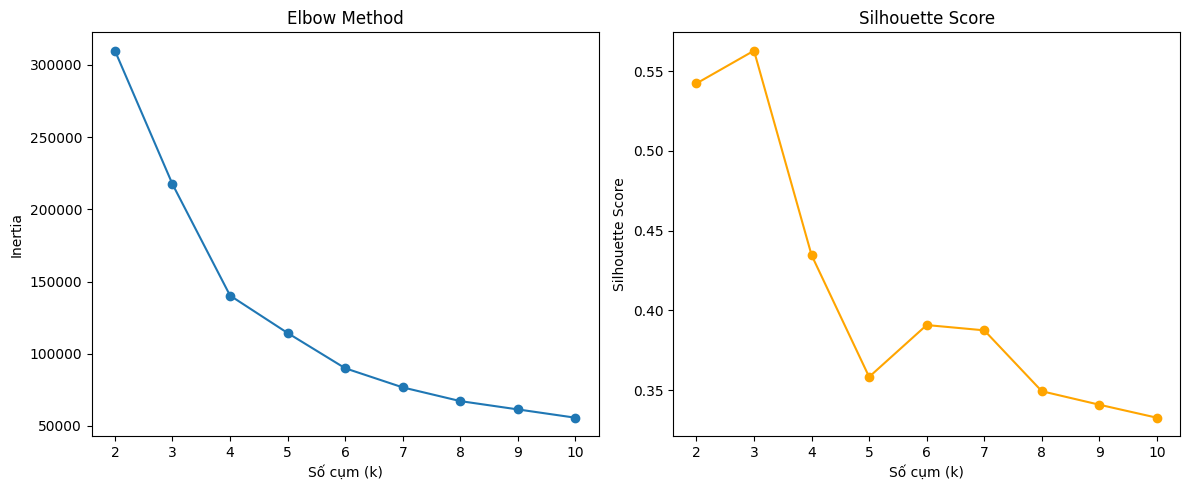

In [241]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(K, silhouette, marker='o', color='orange')
plt.xlabel('Số cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

### Xây dựng mô hình 

In [242]:
# Phân cụm KMeans với k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Thêm nhãn cụm vào DataFrame ban đầu
df_standard['kmeans_cluster'] = labels
df_processed['kmeans_cluster'] = labels

# Thống kê số lượng điểm trong mỗi cụm
print("Số lượng điểm trong mỗi cụm:")
print(pd.Series(labels).value_counts())

Số lượng điểm trong mỗi cụm:
1    1223
0     129
2      42
Name: count, dtype: int64


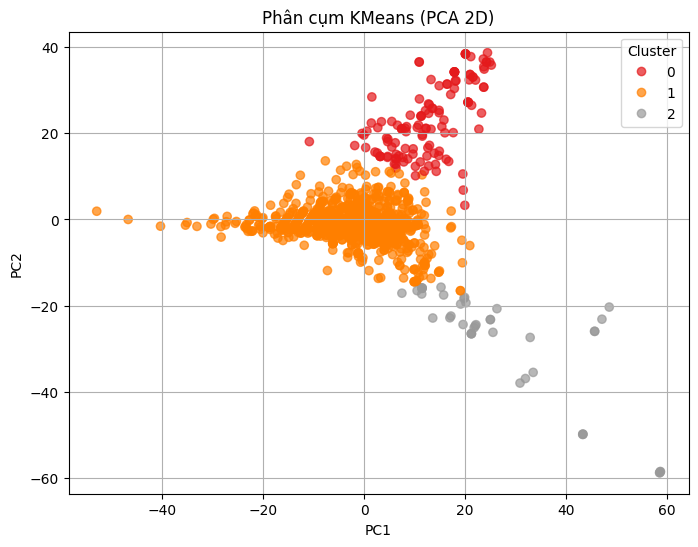

In [243]:
from sklearn.decomposition import PCA

# Giảm chiều dữ liệu xuống 2 thành phần chính với PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Vẽ scatter plot, mỗi cụm một màu
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='Set1', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Phân cụm KMeans (PCA 2D)')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()

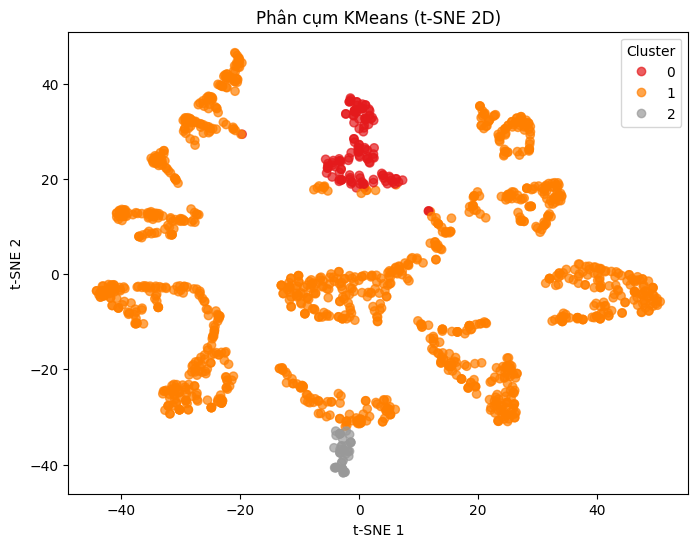

In [244]:
# t-SNE để giảm chiều dữ liệu xuống 2D
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
# Vẽ scatter plot với t-SNE
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap='Set1', alpha=0.7)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Phân cụm KMeans (t-SNE 2D)')
plt.legend(*scatter.legend_elements(), title="Cluster")

plt.show()

Mỗi cụm có hình dạng và phân bố đặc trưng riêng và có rất ít điểm nằm ở vùng chồng lấn giữa các cụm. Ranh giới giữa các cụm tương đối rõ ràng, ít có sự chồng lấn

In [245]:
# Đánh giá Silhouette Score
# Điểm số này cho biết mức độ phân tách giữa các cụm, giá trị càng cao thì các cụm càng rõ ràng.
# Điểm Davies-Bouldin Index càng thấp thì các cụm càng phân tách rõ ràng.
from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_score = silhouette_score(X, labels)
db_score = davies_bouldin_score(X, labels)
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")

Silhouette Score: 0.563
Davies-Bouldin Index: 0.698


**Nhận xét**:
- Silhouette Score: 0.563 là giá trị ở mức trung bình khá. Phân cụm có sự phân biệt nhất định giữa các cụm, nhưng vẫn còn chồng lấn hoặc một số điểm nằm không đúng cụm.
-  0.689 là một giá trị tốt, cho thấy các cụm có sự tách biệt hợp lý, ít chồng lấn.

In [246]:
# Thống kê đặc trưng từng cụm
print("\nTrung bình giá đã giảm và rating theo từng cụm:")
print(df_processed.groupby(['kmeans_cluster'])[['discounted_price', 'rating', 'rating_count']].mean())
print(df_processed['kmeans_cluster'].value_counts())


Trung bình giá đã giảm và rating theo từng cụm:
                discounted_price    rating   rating_count
kmeans_cluster                                           
0                    9769.209302  4.182171   11935.395349
1                     992.507302  4.078986   12238.423423
2                    1419.047619  4.161905  221814.690476
kmeans_cluster
1    1223
0     129
2      42
Name: count, dtype: int64


Cụm 0: "Sản phẩm cao cấp, chất lượng tốt" (129 sản phẩm - 9.26%)  
Đặc điểm:  
- Giá cao nhất (9,769 Rupee) - gấp gần 10 lần cụm khác  
- Rating cao (4.18) - cao nhất trong các cụm  
- Lượng đánh giá trung bình (~12K)  

Ý nghĩa: Sản phẩm cao cấp với giá cao, chất lượng được đánh giá tốt  

Cụm 1: "Sản phẩm giá trị tốt" (1,223 sản phẩm - 87.8%)  
Đặc điểm:  
- Giá thấp nhất (992.5 Rupee)  
- Rating thấp nhất (4.08) - tuy nhiên vẫn là rating tốt  
- Lượng đánh giá trung bình (~12K)  

Ý nghĩa: Sản phẩm đại chúng với giá cả phải chăng, chất lượng chấp nhận được  

Cụm 2: "Sản phẩm phổ biến, được tin cậy cao" (42 sản phẩm - 3.02%)  
Đặc điểm:  
- Giá trung bình (1,419 Rupee) - cao hơn cụm 1 nhưng thấp hơn nhiều so với cụm 0  
- Rating tốt (4.16) - gần bằng cụm 0  
- Lượng đánh giá CỰC CAO (221,814) - gấp 18 lần các cụm khác  

Ý nghĩa: Sản phẩm "best-seller", được nhiều người tin dùng, có giá hợp lý và chất lượng tốt  

Mô hình phân cụm đã thành công trong việc phát hiện 3 phân khúc thị trường có ý nghĩa:  
- Phân khúc cao cấp (9.26%): Giá cao, chất lượng tốt  
- Phân khúc đại chúng (87.8%): Giá hợp lý, chất lượng khá  
- Phân khúc siêu phổ biến (3.02%): Sản phẩm được đánh giá nhiều nhất, có thể là best-seller  

Cải thiện mô hình 

In [247]:
from sklearn.impute import SimpleImputer
# Cải thiện mô hình bằng cách giảm chiều cho about_product_embeddings bằng PCA 
# Dùng biến rating (không chuẩn hóa) 
pca = PCA(n_components=2, random_state=42)
about_embeddings_pca = pca.fit_transform(about_embeddings_reduced)
review_content_embeddings_pca = pca.fit_transform(review_content_embeddings_reduced)

X_num_new = df_standard[['discounted_price','rating_count', 'rating']].values
X_improved = np.hstack([X_num_new*10, about_embeddings_pca, review_content_embeddings_pca])
# Kiểm tra kích thước của dữ liệu đầu vào
print("Shape của dữ liệu đầu vào sau khi cải thiện:", X_improved.shape)

imputer = SimpleImputer(strategy='median')
X_improved_imputed = imputer.fit_transform(X_improved)
# Kiểm tra lại
print("Shape sau khi loại bỏ NaN:", X_improved_imputed.shape)

kmeans_improved = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_improved = kmeans_improved.fit_predict(X_improved_imputed)
# Thêm nhãn cụm vào DataFrame
df_processed['kmeans_cluster_improved'] = labels_improved
df_standard['kmeans_cluster_improved'] = labels_improved

# Đánh giá Silhouette Score
sil_score_improved = silhouette_score(X_improved_imputed, labels_improved)
db_score_improved = davies_bouldin_score(X_improved_imputed, labels_improved)
print(f"Silhouette Score (cải thiện): {sil_score_improved:.3f}")
print(f"Davies-Bouldin Index (cải thiện): {db_score_improved:.3f}")

Shape của dữ liệu đầu vào sau khi cải thiện: (1394, 7)
Shape sau khi loại bỏ NaN: (1394, 7)
Silhouette Score (cải thiện): 0.715
Davies-Bouldin Index (cải thiện): 0.541


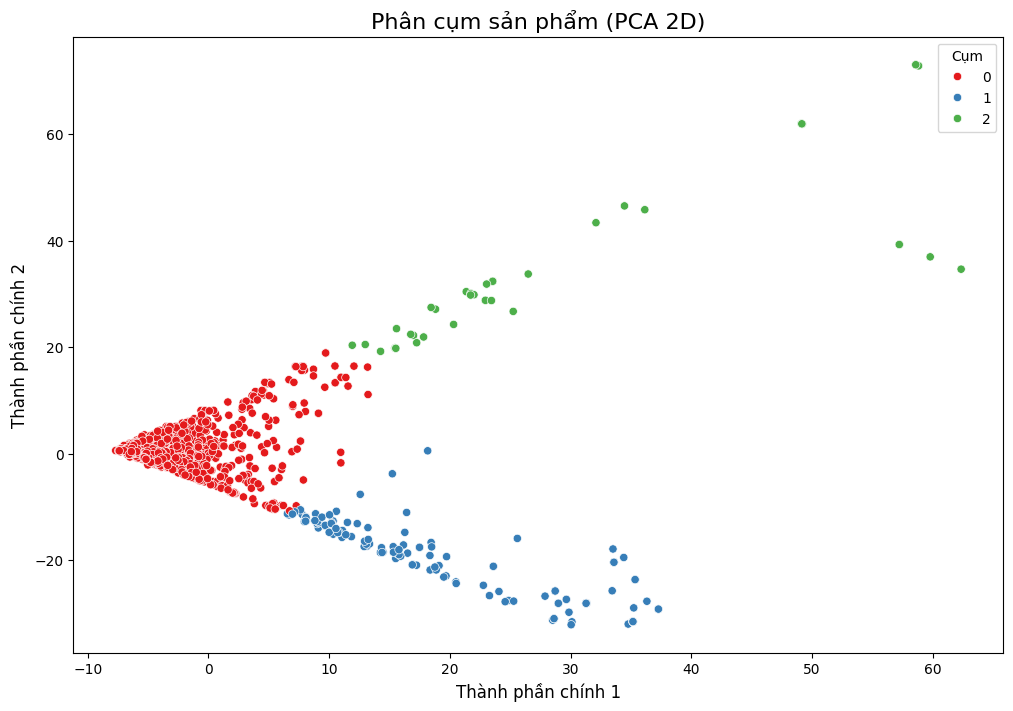

In [248]:
# Áp dụng PCA để giảm chiều dữ liệu xuống 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_improved_imputed)
plot_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': df_standard['kmeans_cluster_improved'],
    'Price': df_standard['discounted_price'],
    'Rating Count': df_standard['rating_count'],
    'Rating': df_standard['rating']
})

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=plot_df,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='Set1')
plt.title('Phân cụm sản phẩm (PCA 2D)', fontsize=16)
plt.xlabel('Thành phần chính 1', fontsize=12)
plt.ylabel('Thành phần chính 2', fontsize=12)
plt.legend(title='Cụm', fontsize=10)

plt.show()

In [249]:
# Thống kê số lượng điểm trong mỗi cụm
print("Số lượng điểm trong mỗi cụm (cải thiện):")
print(pd.Series(labels_improved).value_counts())

Số lượng điểm trong mỗi cụm (cải thiện):
0    1223
1     129
2      42
Name: count, dtype: int64


In [250]:
# So sánh điểm Stilhouette Score và Davies-Bouldin Index giữa các cụm ban đầu và cải thiện
print("\nĐiểm Silhouette Score và Davies-Bouldin Index:")
print(f"Silhouette Score (ban đầu): {sil_score:.3f}, (cải thiện): {sil_score_improved:.3f}")
print(f"Davies-Bouldin Index (ban đầu): {db_score:.3f}, (cải thiện): {db_score_improved:.3f}")


Điểm Silhouette Score và Davies-Bouldin Index:
Silhouette Score (ban đầu): 0.563, (cải thiện): 0.715
Davies-Bouldin Index (ban đầu): 0.698, (cải thiện): 0.541


Nhận xét: Chỉ số Silhouette Score đã tăng từ 0.563 lên 0.712, tương đương mức tăng 26.5%. Điều này cho thấy mô hình cải thiện đã tạo ra các cụm có cấu trúc tốt hơn đáng kể.

Chỉ số Davies-Bouldin đã giảm từ 0.698 xuống 0.542, tương đương mức giảm 22.3%. Với chỉ số này, giá trị càng thấp càng tốt, thể hiện các cụm được tách biệt tốt hơn

In [251]:
# Tính toán giá trung bình, đánh giá trung bình và các thông số khác cho mỗi cụm
cluster_features_kmeans = df_processed.groupby('kmeans_cluster_improved')[
    ['discounted_price', 'rating', 'rating_count', 
     ]].mean()

print("Đặc điểm trung bình của các cụm:")
cluster_features_kmeans.head()

Đặc điểm trung bình của các cụm:


discounted_price    rating   rating_count
kmeans_cluster_improved                                           
0                              990.950474  4.081112   12234.217035
1                             9783.968992  4.162016   11975.209302
2                             1419.047619  4.161905  221814.690476

- Cụm 0: giá thấp nhất (trung bình 990 Rupee cho một sản phẩm), đánh giá cũng thấp nhất và số lượng đánh giá nằm ở mức trung bình --> Sản phẩm đại chúng với giá rẻ, được nhiều người mua nhưng chất lượng không đáp ứng mức độ hài lòng của khách hàng.
- Cụm 1: Giá rất cao (trung bình 9000 Rupee cho một sản phẩm), được đánh giá cao nhất, dù số lượng đánh giá ít nhất trong cụm --> Sản phẩm cao cấp, phân khúc cao, giá cao, ít người mua nhưng mức độ hài lòng rất cao (có thể là sản phẩm chất lượng tốt)
- Cụm 2: Giá trung bình (1420 Rupee cho một sản phẩm), số lượng đánh giá nhiều nhất và đánh giá cho các sản phẩm này cao (xấp xỉ với các sản phẩm phân khúc cao) --> Những sản phẩm phổ biến nhất, giá hợp lý đi kèm chất lượng ổn định, best seller được nhiều người mua. 

In [252]:
# Phân tích danh mục sản phẩm trong từng cụm
category_distribution_kmeans = pd.crosstab(
    df_processed['kmeans_cluster_improved'], 
    df_processed['main_category'], 
    normalize='index'
) * 100

print("\nPhân bố danh mục sản phẩm trong từng cụm (%):")
category_distribution_kmeans.round(1)


Phân bố danh mục sản phẩm trong từng cụm (%):


main_category            Car and Motorbike  Computers and Accessories  \
kmeans_cluster_improved                                                 
0                                      0.1                       35.7   
1                                      0.0                        5.4   
2                                      0.0                       19.0   

main_category            Electronics  Health and PersonalCare  \
kmeans_cluster_improved                                         
0                               29.1                      0.1   
1                               56.6                      0.0   
2                               76.2                      0.0   

main_category            Home and Kitchen  HomeImprovement  \
kmeans_cluster_improved                                      
0                                    32.1              0.2   
1                                    38.0              0.0   
2                                     4.8              0.0   

main_category            MusicalInstruments  OfficeProducts  Toys and Games  
kmeans_cluster_improved                                                      
0                                       0.2             2.5             0.1  
1                                       0.0             0.0             0.0  
2                                       0.0             0.0             0.0

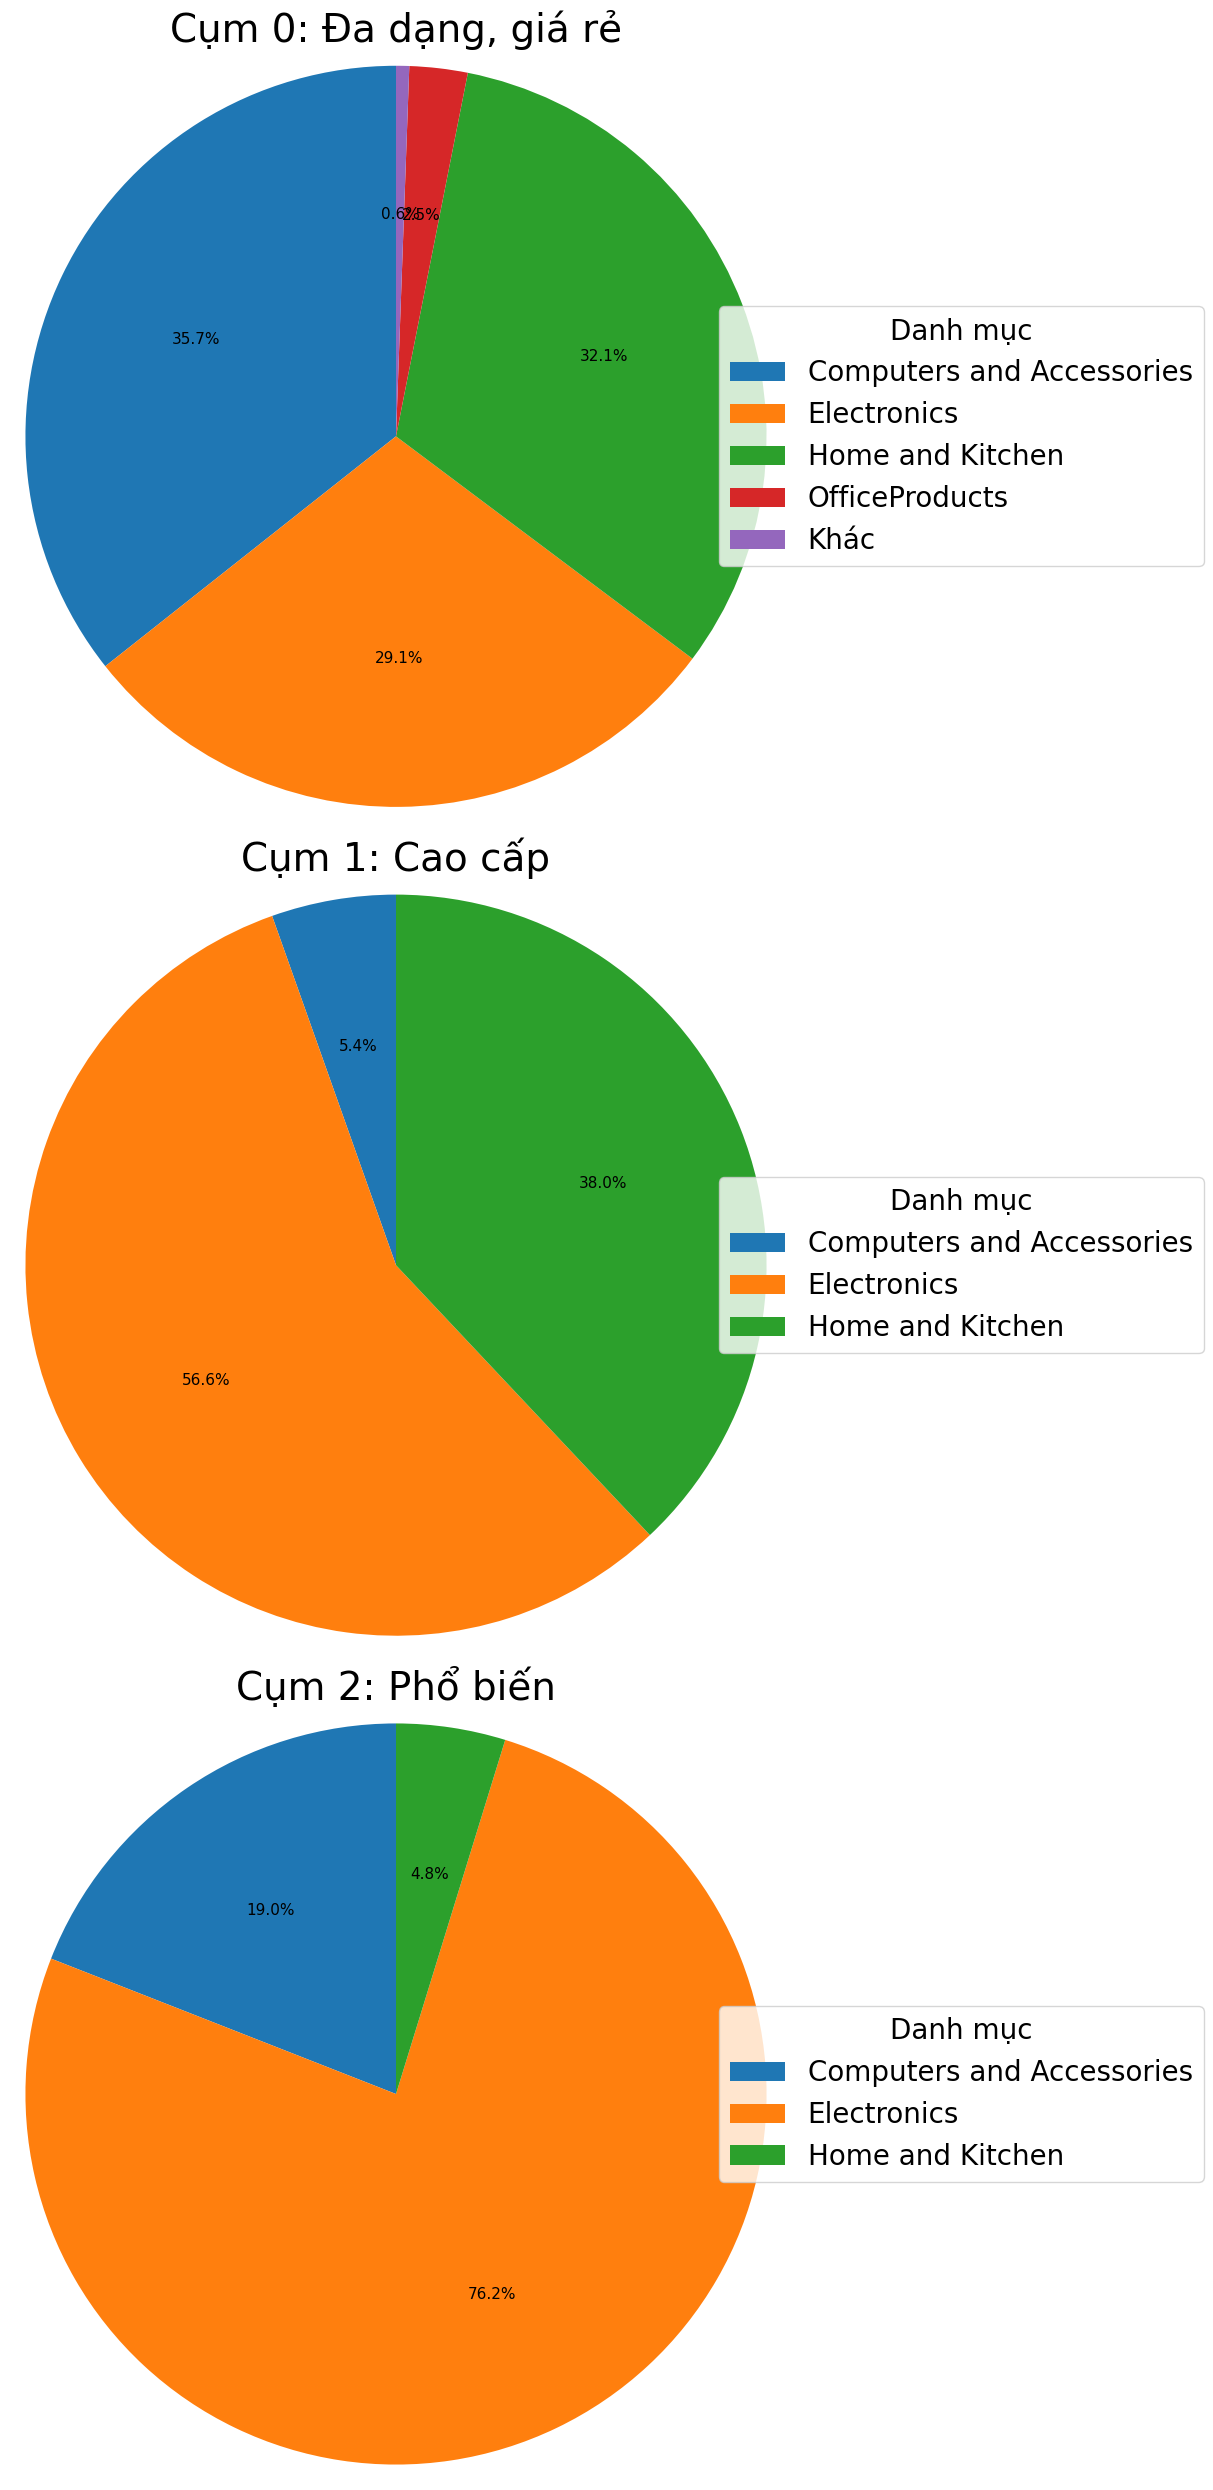

In [253]:
# Tạo biểu đồ tròn cho từng cụm 
fig, axes = plt.subplots(3, 1, figsize=(35, 25))
clusters = [0, 1, 2]
cluster_names = ["Cụm 0: Đa dạng, giá rẻ", "Cụm 1: Cao cấp", "Cụm 2: Phổ biến"]

data = category_distribution_kmeans
for i, cluster in enumerate(clusters):
    cluster_data = data.loc[cluster]
    significant_categories = cluster_data[cluster_data >= 1.0]
    other_pct = 100 - significant_categories.sum()

    if other_pct > 0:
        categories = list(significant_categories.index) + ['Khác']
        values = list(significant_categories.values) + [other_pct]
        plot_data = pd.Series(values, index=categories)
    else:
        plot_data = significant_categories
    
    wedges, texts, autotexts = axes[i].pie(
        plot_data, 
        autopct='%1.1f%%',
        textprops={'fontsize':11}, 
        startangle=90,
       
        radius=1.2  
    )
    axes[i].set_title(cluster_names[i], fontsize=28)
    axes[i].legend(
        wedges, 
        plot_data.index, 
        title="Danh mục",
        loc="center left", 
        bbox_to_anchor=(0.9, 0, 0.5, 1),
        fontsize=20,
        title_fontsize=20
    )
    axes[i].set(aspect="equal")  

plt.tight_layout()
plt.show()


- Cụm 0: Đa dạng danh mục, tập trung vào máy tính và đồ gia dụng. Danh mục chính: Computers and Accessories (35.7%), Home and Kitchen (32.1%), Electronics (29.1%). Đặc điểm: Đây là cụm đa dạng nhất, phân bố khá đồng đều giữa 3 danh mục chính và có sự hiện diện của tất cả các danh mục sản phẩm, kể cả những danh mục nhỏ.

- Cụm 1: Tập trung vào điện tử và đồ gia dụng cao cấp. Danh mục chính: Electronics (56.6%), Home and Kitchen (38.0%). 
Đặc điểm: Chỉ tập trung vào 2 danh mục chính và một ít Computers (5.4%), đây là các sản phẩm điện tử và đồ gia dụng cao cấp, giá cao. 

- Cụm 2: Chuyên biệt về thiết bị điện tử: Danh mục áp đảo: Electronics (76.2%). Đặc điểm: Cụm này rất chuyên biệt về thiết bị điện tử, là những sản phẩm phổ biến được đánh giá cao

Phân tích các từ khóa nổi bật về mô tả sản phẩm trong các cụm: 

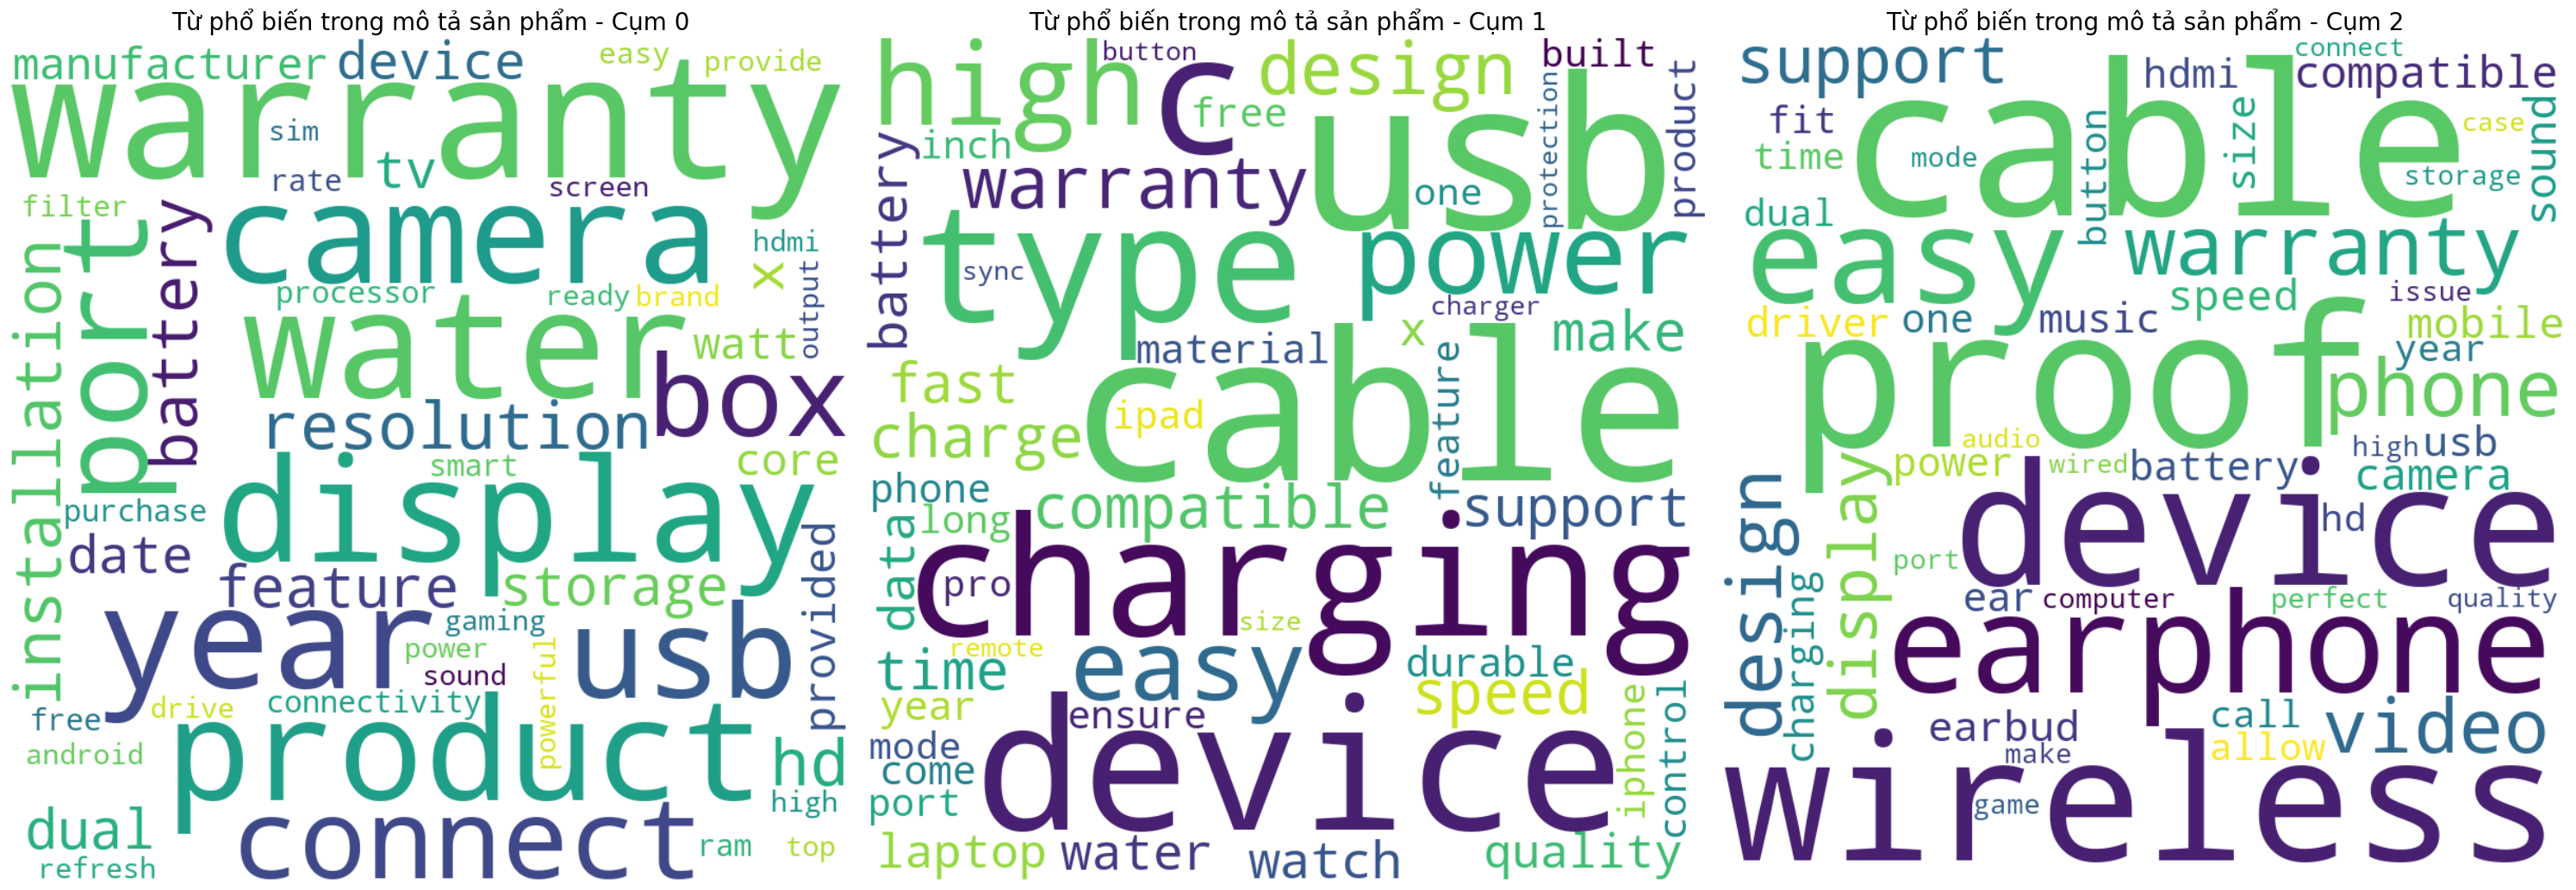

In [254]:
plt.figure(figsize=(30, 30))
stopwords = set(STOPWORDS)
custom_stopwords = {'the', 'and', 'to', 'is', 'in', 'it', 'of', 'for', 'this', 'that', 'a', 'on', 'with', 'you', 'your',
                    'are', 'be', 'as', 'can', 'will', 'by', 'an', 'or', 'at', 'use', 'from', 'has', 'have', 'its'}
stopwords.update(custom_stopwords)

for cluster in sorted(df_processed['kmeans_cluster_improved'].unique()):
    text_about = ' '.join([str(t) for t in df_processed[df_processed['kmeans_cluster'] == cluster]['about_product'] 
                           if isinstance(t, str)])
   
    wordcloud = WordCloud(
        width=800, 
        height=800, 
        background_color='white',
        max_words=50,
        stopwords=stopwords,
        collocations=False,
        max_font_size=200,
        random_state=42
    ).generate(text_about)

    plt.subplot(1, 3, cluster + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Từ phổ biến trong mô tả sản phẩm - Cụm {cluster}', fontsize=20)
plt.tight_layout()
plt.show()


- Cụm 0: Sản phẩm giá rẻ, đánh giá thấp: Từ khóa nổi bật: warranty, camera, water, display, battery, resolution. Nhấn mạnh vào camera, resolution và hiển thị - đặc điểm cơ bản mà người mua quan tâm ở phân khúc giá rẻ.
- Cụm 1: Sản phẩm giá cao, chất lượng được đánh giá cao nhất: Từ khóa nổi bật: cable, charging, device, earphone, wireless, compatible. Là sản phẩm phụ kiện cao cấp, đặc biệt là phụ kiện âm thanh (earphone) và sạc (charging, cable). Xuất hiện nhiều từ về tính tương thích (compatible) và công nghệ không dây (wireless), phản ánh đặc trưng của sản phẩm công nghệ cao cấp.
- Cụm 2: Sản phẩm phổ biến, bán chạy giá cả phải chăng. Từ khóa nổi bật: support, cable, device, compatible, easy. Nhấn mạnh vào tính năng hỗ trợ (support) và dễ sử dụng (easy). Đây là những sản phẩm phổ biến nên tập trung vào trải nghiệm người dùng, tính tương thích rộng rãi với nhiều thiết bị. 

Từ khóa nổi bật trong đánh giá của khách hàng ở các cụm: 

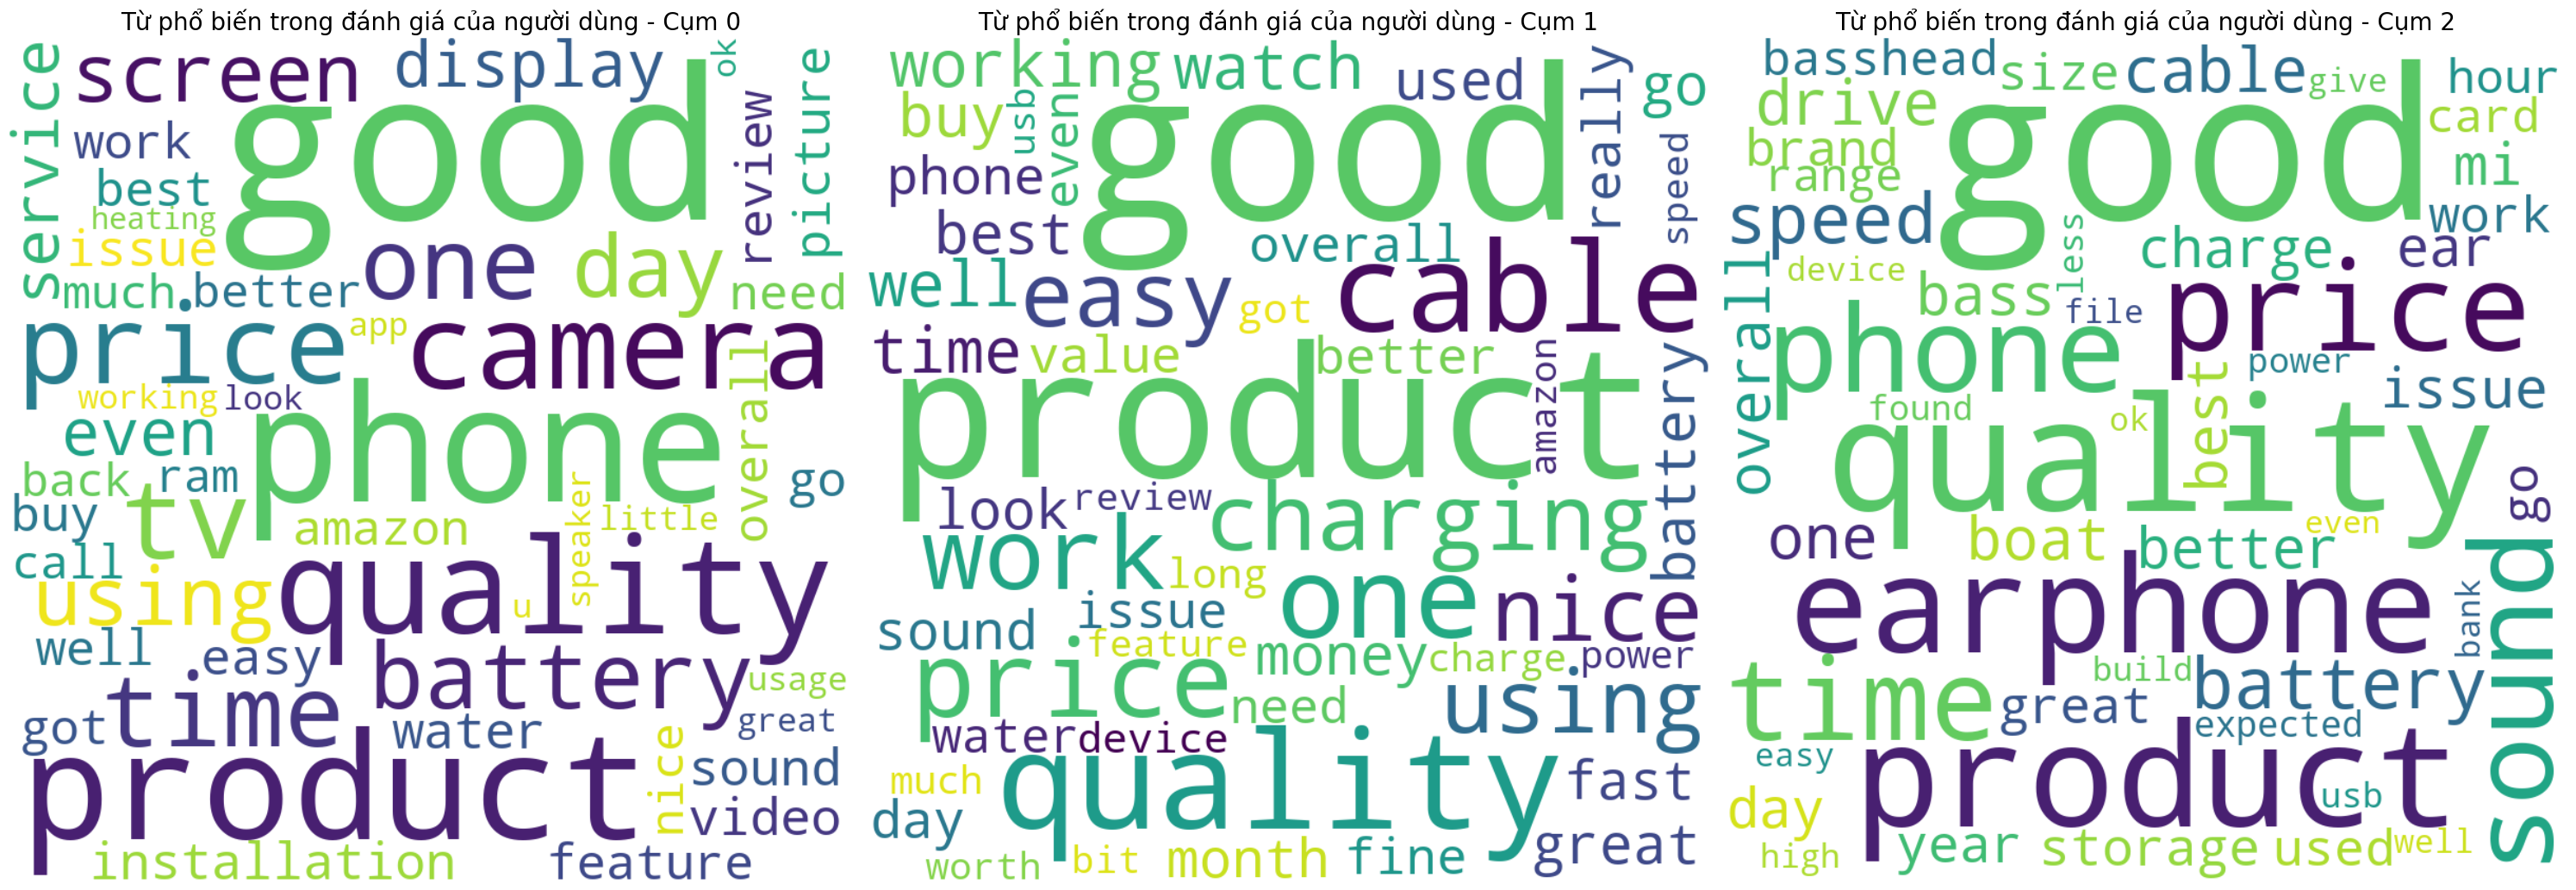

In [255]:
plt.figure(figsize=(30, 30))
for cluster in sorted(df_processed['kmeans_cluster_improved'].unique()):
    text_about = ' '.join([str(t) for t in df_processed[df_processed['kmeans_cluster'] == cluster]['review_content'] 
                           if isinstance(t, str)])

    wordcloud = WordCloud(
        width=800, 
        height=800, 
        background_color='white',
        max_words=50,
        stopwords=stopwords,
        collocations=False,
        max_font_size=200,
        random_state=42
    ).generate(text_about)

    plt.subplot(1, 3, cluster + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Từ phổ biến trong đánh giá của người dùng - Cụm {cluster}', fontsize=20)
plt.tight_layout()
plt.show()

- Cụm 0: Sản phẩm giá rẻ, đánh giá thấp. Đánh giá tập trung vào tính năng cơ bản (screen, battery) và giá cả (price). Người dùng thường đánh giá sản phẩm là "good" nhưng không xuất hiện các từ thể hiện sự xuất sắc. Người dùng chấp nhận chất lượng tương đối với giá cả hợp lý, không có nhiều kỳ vọng cao.
- Cụm 1: Sản phẩm giá cao, chất lượng được đánh giá cao nhất. Vẫn có sự xuất hiện của "price" - cho thấy người dùng quan tâm đến giá trị sản phẩm và có nhiều đánh giá tốt như well, best, fast, eassy, better, greate... Đánh giá dựa trên sự kết hợp giữa chất lượng cao và tính tiện dụng, quan tâm đến giá trị nhận được.
- Cụm 2: Sản phẩm phổ biến, bán chạy giá cả phải chăng. "Quality" nổi bật hơn các cụm khác, phản ánh người dùng đánh giá cao chất lượng của những sản phẩm phổ biến này.

## 8.2 Phân cụm với K-Medoids trên tập dữ liệu chưa xử lý outliers

In [256]:
from sklearn_extra.cluster import KMedoids
X_raw_num = df_raw_standard[['discounted_price', 'rating', 'rating_count']].values

# TF-IDF với review_content
review_content_embeddings_raw = tfidf.fit_transform(df_raw['review_content'])
review_content_embeddings_reduced_raw = svd.fit_transform(review_content_embeddings_raw)
print("Phương sai giải thích được sau khi SVD cho review_content:", svd.explained_variance_ratio_.sum())
# TF -IDF với about_product
about_embeddings_raw = tfidf.fit_transform(df_raw['about_product'])
about_embeddings_reduced_raw = svd.fit_transform(about_embeddings_raw)
print("Phương sai giải thích được sau khi SVD cho about_product:", svd.explained_variance_ratio_.sum())


pca_raw = PCA(n_components=2, random_state=42)
about_embeddings_reduced_raw = pca_raw.fit_transform(about_embeddings_reduced_raw)
review_content_embeddings_reduced_raw = pca_raw.fit_transform(review_content_embeddings_reduced_raw)


# Ghép với embedding
X_raw = np.hstack([X_raw_num*10, about_embeddings_reduced_raw, review_content_embeddings_reduced_raw])

print("Shape đặc trưng đầu vào:", X_raw.shape)

Phương sai giải thích được sau khi SVD cho review_content: 0.8095156574759994
Phương sai giải thích được sau khi SVD cho about_product: 0.8363330990779263
Shape đặc trưng đầu vào: (1465, 7)


In [257]:
from sklearn.impute import SimpleImputer
# Áp dụng K-medoids với cùng số cụm
kmedoids = KMedoids(
    n_clusters=3, 
    method='pam',     
    random_state=42
)

imputer = SimpleImputer(strategy='median')
X_raw = imputer.fit_transform(X_raw)

# Kiểm tra lại
print("Shape sau khi loại bỏ NaN:",X_raw.shape)

labels_kmedoids = kmedoids.fit_predict(X_raw)

# Thêm nhãn cụm vào DataFrame
df_raw['kmedoids_cluster'] = labels_kmedoids


# Thống kê số lượng điểm trong mỗi cụm
print("Số lượng điểm trong mỗi cụm (K-medoids):")
print(pd.Series(labels_kmedoids).value_counts())

# Đánh giá hiệu suất
sil_score_kmedoids = silhouette_score(X_raw, labels_kmedoids)
db_score_kmedoids = davies_bouldin_score(X_raw, labels_kmedoids)
print(f"Silhouette Score (K-medoids): {sil_score_kmedoids:.3f}")
print(f"Davies-Bouldin Index (K-medoids): {db_score_kmedoids:.3f}")

# So sánh với K-means
print("\nSo sánh K-means vs K-medoids:")
print(f"Silhouette Score - K-means: {sil_score_improved:.3f}, K-medoids: {sil_score_kmedoids:.3f}")
print(f"Davies-Bouldin - K-means: {db_score_improved:.3f}, K-medoids: {db_score_kmedoids:.3f}")

Shape sau khi loại bỏ NaN: (1465, 7)
Số lượng điểm trong mỗi cụm (K-medoids):
2    1207
1     150
0     108
Name: count, dtype: int64
Silhouette Score (K-medoids): 0.687
Davies-Bouldin Index (K-medoids): 0.751

So sánh K-means vs K-medoids:
Silhouette Score - K-means: 0.715, K-medoids: 0.687
Davies-Bouldin - K-means: 0.541, K-medoids: 0.751


Nếu mục tiêu là hiệu suất phân cụm tốt nhất: tiếp tục sử dụng K-means

Nếu cần tính giải thích được (interpretability) và khả năng thích ứng với dữ liệu nhiễu: có thể cân nhắc K-medoids dù hiệu suất thấp hơn

In [258]:
cluster_df = df_raw.copy()
cluster_df['cluster'] = labels_kmedoids

# Thống kê các đặc trưng chính theo cụm
cluster_stats = cluster_df.groupby('cluster')[
    ['discounted_price', 'rating', 'rating_count']
].mean().reset_index()

cluster_stats.head()

cluster  discounted_price    rating   rating_count
0        0       1170.888889  4.184259  134061.342593
1        1      19849.126667  4.184000   14291.073333
2        2       1221.835485  4.077879     8418.33278

- Cụm 0: Giá thấp, đánh giá cao, số lượng đánh giá nhiều nhất.
- Cụm 1: Giá rất cao, phân khúc sản phẩm cao cấp với đánh giá khá cao, chất lượng đi kèm giá tiền, số lượng người mua nhiều.
- Cụm 2: Giá trung bình, nhưng đánh giá thấp, và số người mua ít. 

## 8.3 Phân cụm phân cấp HAC 

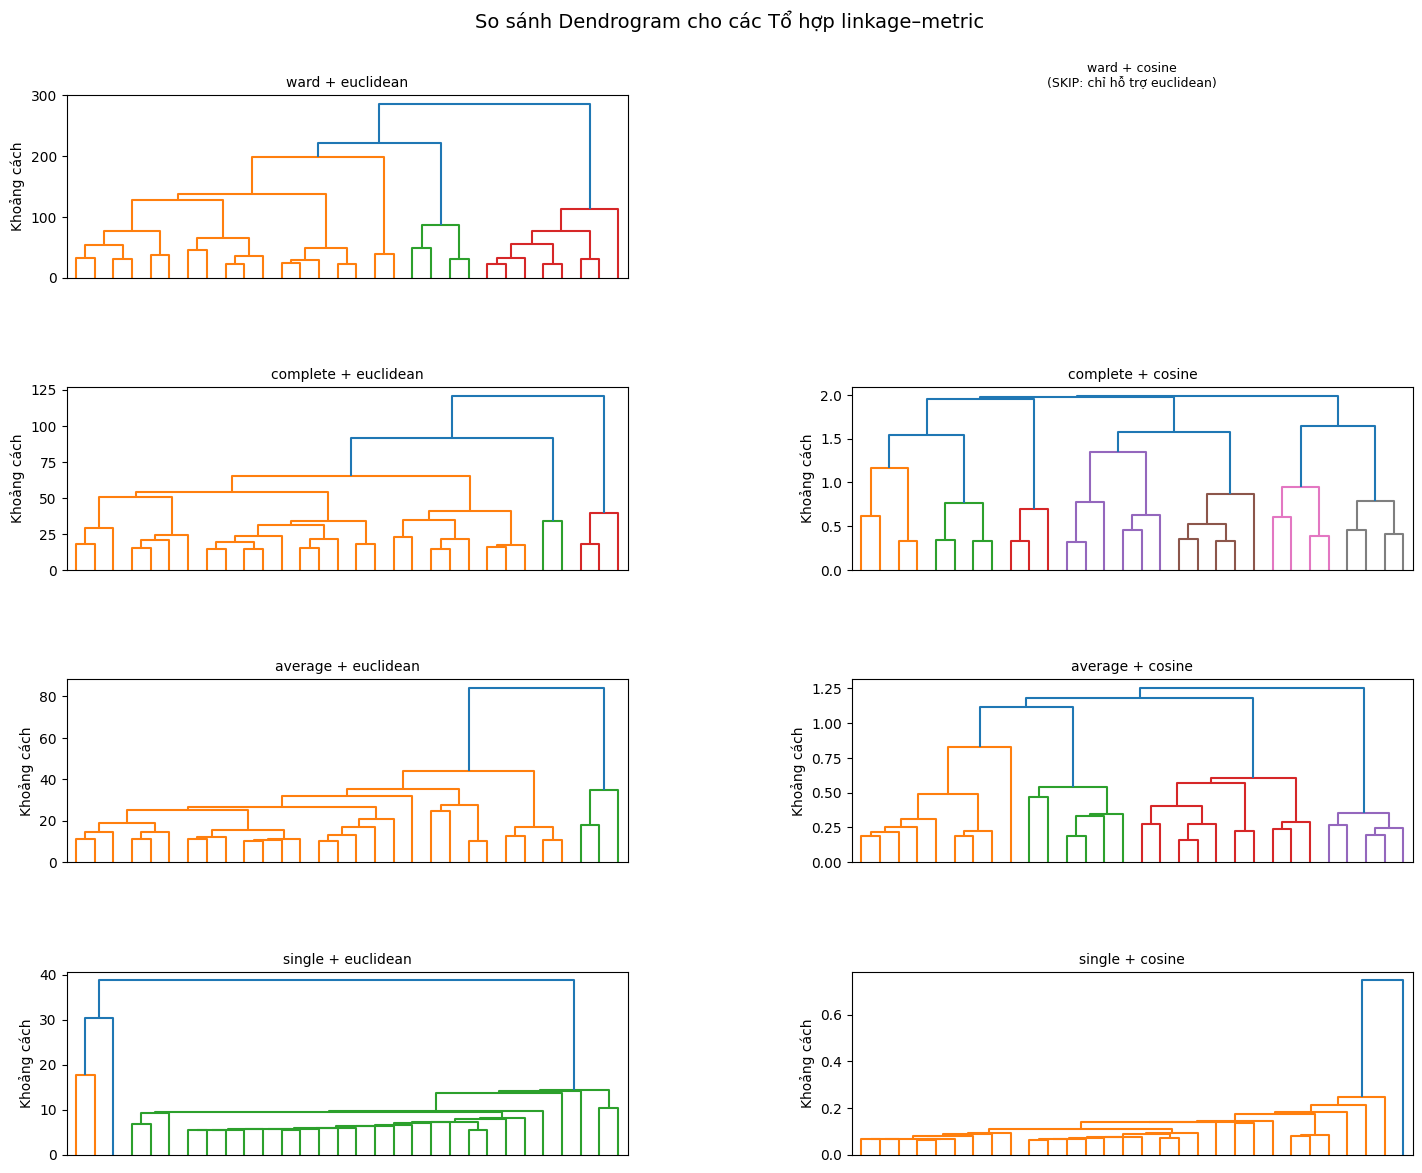

In [259]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Lấy mẫu ngẫu nhiên (nếu dữ liệu quá lớn)
sample_size = min(500, X.shape[0])
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_sample = X[indices]

linkage_methods = ['ward', 'complete', 'average', 'single']
affinity_metrics = ['euclidean', 'cosine']

# Tạo lưới 4 hàng x 3 cột
fig, axes = plt.subplots(nrows=len(linkage_methods), 
                         ncols=len(affinity_metrics), 
                         figsize=(15, 12), 
                         sharex=False, sharey=False)
fig.tight_layout(pad=4.0)

for i, method in enumerate(linkage_methods):
    for j, metric in enumerate(affinity_metrics):
        ax = axes[i, j]
        
        # Nếu method='ward' buộc phải metric='euclidean'
        if method == 'ward' and metric != 'euclidean':
            ax.axis('off')
            ax.set_title(f"{method} + {metric}\n(SKIP: chỉ hỗ trợ euclidean)", fontsize=9)
            continue
        
        # Tính linkage
        try:
            Z = linkage(X_sample, method=method, metric=metric)
        except Exception as e:
            ax.axis('off')
            ax.set_title(f"{method} + {metric}\n(Lỗi)", fontsize=9)
            continue
        
        # Vẽ dendrogram rút gọn (truncate_mode='lastp')
        dendrogram(
            Z,
            ax=ax,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=False,
            truncate_mode='lastp',
            p=30
        )
        
        ax.set_title(f"{method} + {metric}", fontsize=10)
        ax.set_ylabel("Khoảng cách")
        ax.set_xticks([])

# Chỉnh lại khoảng cách giữa các subplot
plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.suptitle("So sánh Dendrogram cho các Tổ hợp linkage–metric", y=1.02, fontsize=14)
plt.show()


In [260]:
best_method = 'ward'
best_affinity = 'euclidean'

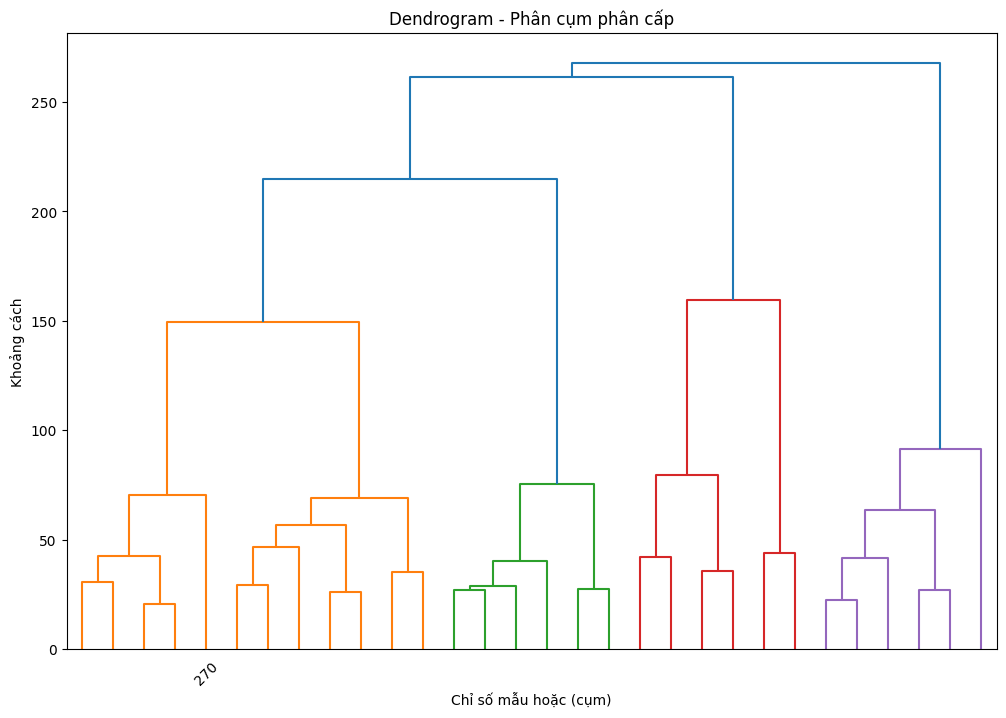

In [261]:
# 1. Vẽ dendrogram để xác định số cụm tối ưu
from scipy.cluster.hierarchy import dendrogram, linkage

# Lấy mẫu ngẫu nhiên để vẽ dendrogram (do kích thước dữ liệu lớn)
sample_size = min(500, X.shape[0])
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_sample = X[indices]

# Tính toán ma trận liên kết
plt.figure(figsize=(12, 8))
linked = linkage(X_sample, method='ward', metric = 'euclidean')

# Vẽ dendrogram
dendrogram(linked, 
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           truncate_mode='lastp',
           p=30)  # Hiển thị 30 nút cuối cùng
plt.title('Dendrogram - Phân cụm phân cấp')
plt.xlabel('Chỉ số mẫu hoặc (cụm)')
plt.ylabel('Khoảng cách')


plt.show()

In [262]:
from sklearn.cluster import AgglomerativeClustering

In [263]:
# Phân cụm phân cấp với phương pháp tốt nhất
agglo = AgglomerativeClustering(n_clusters=3, metric = best_affinity, linkage = best_method)
agglo_labels = agglo.fit_predict(X_improved_imputed)
df_processed['agglo_cluster'] = agglo_labels

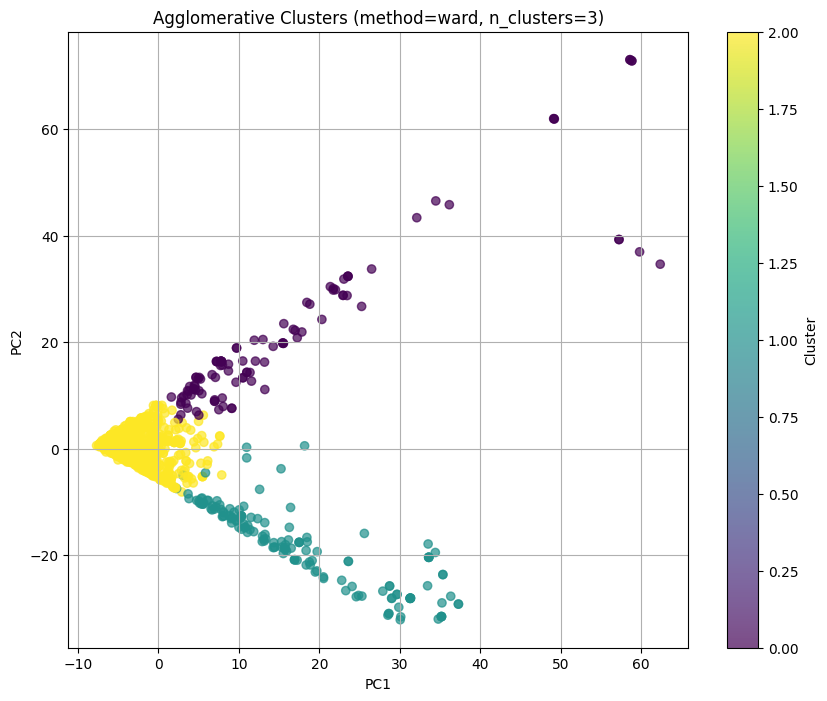

In [264]:
# 5. Trực quan hóa kết quả phân cụm phân cấp
from sklearn.decomposition import PCA

# Giảm chiều dữ liệu xuống 2 thành phần chính với PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_improved_imputed)

# Trực quan hóa kết quả phân cụm phân cấp
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=agglo_labels, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Agglomerative Clusters (method={best_method}, n_clusters=3)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [265]:
# Đánh giá kết quả phân cụm
sil_score_agglo = silhouette_score(X_improved_imputed, agglo_labels)
db_score_agglo = davies_bouldin_score(X_improved_imputed, agglo_labels)
print(f"Silhouette Score (Agglomerative - {best_method}): {sil_score_agglo:.3f}")
print(f"Davies-Bouldin Index (Agglomerative - {best_method}): {db_score_agglo:.3f}")

# Thống kê đặc trưng từng cụm
print("\nThống kê đặc trưng từng cụm:")
print(df_processed.groupby('agglo_cluster')[['discounted_price', 'rating']].mean())
print(df_processed['agglo_cluster'].value_counts())

Silhouette Score (Agglomerative - ward): 0.683
Davies-Bouldin Index (Agglomerative - ward): 0.719

Thống kê đặc trưng từng cụm:
               discounted_price    rating
agglo_cluster                            
0                   1097.738318  4.173832
1                   9096.872483  4.148322
2                    932.137460  4.075747
agglo_cluster
2    1138
1     149
0     107
Name: count, dtype: int64


Diễn giải và gán nhãn cho các cụm:

Cụm 0: "Sản phẩm đại trà, chất lượng trung bình-thấp" (738 sản phẩm - 53%)
Đặc điểm: Giá thấp hơn trung bình, đánh giá thấp hơn trung bình
Khác biệt với KMeans: Đây là cụm lớn nhất, nhưng rating không quá thấp như cụm 0 của KMeans
Ý nghĩa: Sản phẩm phổ thông, giá rẻ, chất lượng tương đối phù hợp với giá tiền

Cụm 1: "Sản phẩm cao cấp" (124 sản phẩm - 9%)
Đặc điểm: Giá cao hơn trung bình rất nhiều (~2.8 độ lệch chuẩn), đánh giá chỉ nhỉnh hơn trung bình một chút
Khác biệt với KMeans: Gần như giống hệt cụm 2 của KMeans
Ý nghĩa: Sản phẩm cao cấp nhưng có vẻ bị định giá cao so với chất lượng thực tế cảm nhận

Cụm 2: "Sản phẩm giá trị tốt nhất" (532 sản phẩm - 38%)
Đặc điểm: Giá thấp hơn trung bình, nhưng rating cao hơn trung bình rất nhiều
Khác biệt với KMeans: Rating cao hơn hẳn (0.85 so với 0.44)
Ý nghĩa: Đây là những sản phẩm "món hời" thực sự - giá thấp nhưng chất lượng được đánh giá rất cao

## 8.4. Phân cụm với DBSCAN 

In [266]:
# Shape đầu vào 
print("Shape của dữ liệu đầu vào:", X_improved_imputed.shape)

Shape của dữ liệu đầu vào: (1394, 7)


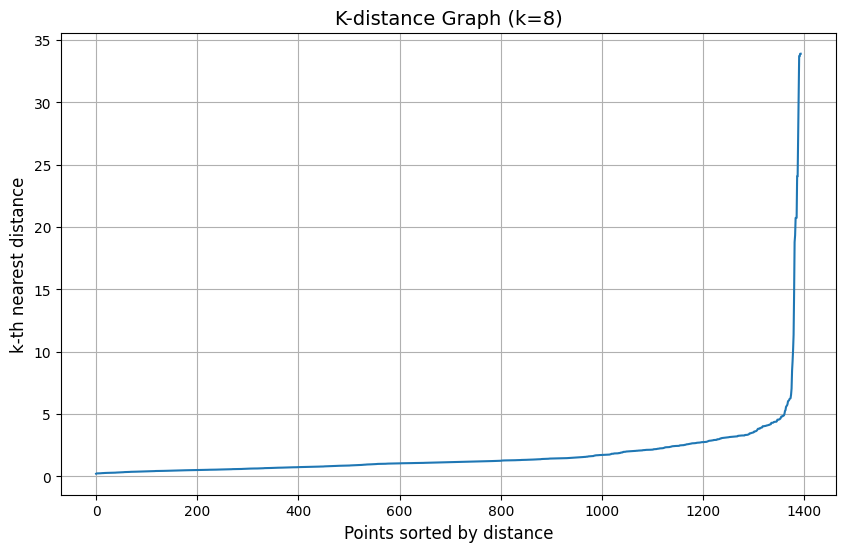

In [267]:
from sklearn.neighbors import NearestNeighbors

# Tìm giá trị eps phù hợp
k = 8 
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_improved_imputed)
distances, indices = neigh.kneighbors(X_improved_imputed)

# Sắp xếp khoảng cách theo thứ tự tăng dần
distances = np.sort(distances[:, k-1])

# Vẽ đồ thị "elbow" để xác định eps
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph (k={})'.format(k), fontsize=14)
plt.xlabel('Points sorted by distance', fontsize=12)
plt.ylabel('k-th nearest distance', fontsize=12)
plt.grid(True)
plt.show()

In [268]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=4, min_samples=8)
dbscan_labels = dbscan.fit_predict(X_improved_imputed)

# Số lượng cụm (không tính noise là -1)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f'Số lượng cụm ước tính: {n_clusters}')
print(f'Số lượng điểm nhiễu: {n_noise}')

# Lưu nhãn
df_processed['dbscan_cluster'] = dbscan_labels

Số lượng cụm ước tính: 4
Số lượng điểm nhiễu: 31


In [291]:
# Đanh giá kết quả phân cụm
sil_score_dbscan = silhouette_score(X_improved_imputed, dbscan_labels)
db_score_dbscan = davies_bouldin_score(X_improved_imputed, dbscan_labels)
print(f"Silhouette Score (DBSCAN): {sil_score_dbscan:.3f}")



Silhouette Score (DBSCAN): 0.664


Silhouette Score: 0.664
- Giá trị khá tốt: Điểm silhouette trên 0.6 thường được xem là phân cụm có chất lượng khá tốt
- Gắn kết trong cụm: Điểm số này cho thấy các điểm trong cùng cụm có độ tương đồng cao
- Phân tách giữa các cụm: Các cụm được phân biệt khá rõ ràng với nhau

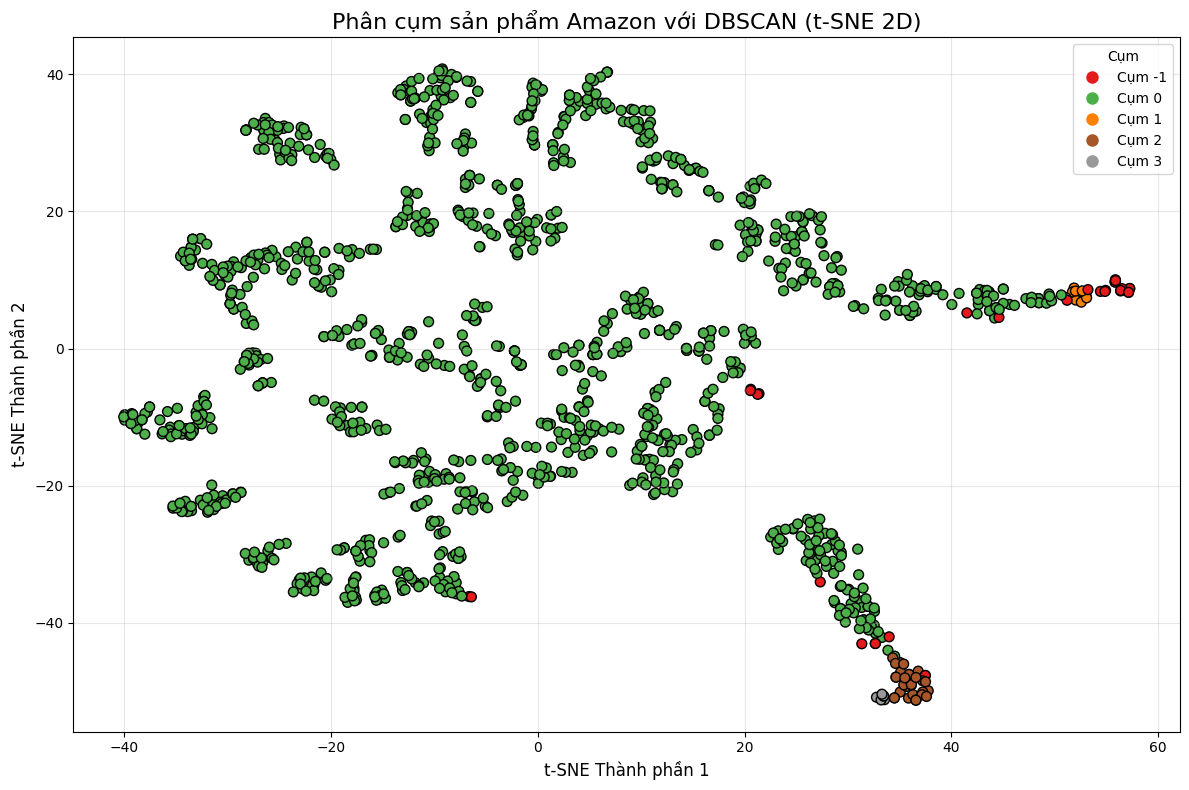

In [270]:
# Giảm chiều dữ liệu bằng t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_improved_imputed)

# Tạo DataFrame để trực quan hóa
tsne_df = pd.DataFrame({
    'tSNE1': X_tsne[:, 0],
    'tSNE2': X_tsne[:, 1],
    'Cluster': dbscan_labels,
    'Price': df_processed['discounted_price'],
    'Rating Count': df_processed['rating_count']
})

# Vẽ scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    tsne_df['tSNE1'], 
    tsne_df['tSNE2'], 
    c=tsne_df['Cluster'], 
    cmap='Set1', 
    s=50, 
    edgecolor='k'
)


unique_clusters = sorted(tsne_df['Cluster'].unique())
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cụm {label}', 
                      markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10)
           for label in unique_clusters]

plt.legend(handles=handles, title='Cụm', fontsize=10)

plt.title('Phân cụm sản phẩm Amazon với DBSCAN (t-SNE 2D)', fontsize=16)
plt.xlabel('t-SNE Thành phần 1', fontsize=12)
plt.ylabel('t-SNE Thành phần 2', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- DBSCAN đã nhận diện được 4 cụm rõ rệt (cụm 0, 1, 2, 3) và các điểm nhiễu (31 điểm). 
- Cụm 0 (màu xanh lá) chiếm đa số dữ liệu và có hình dạng phức tạp, không đều.
- Các điểm được đánh dấu là cụm -1 (màu đỏ) là outliers. DBSCAN tự động phát hiện và gán nhãn các outliers, một ưu điểm so với K-means và K-medoids.
- Không giống K-means phân cụm theo hình cầu, DBSCAN đã phát hiện các cụm có hình dạng phức tạp. Đây là ưu điểm lớn khi làm việc với dữ liệu thương mại điện tử có cấu trúc phức tạp. 

--> So sánh với các phương pháp khác: DBSCAN có Silhouette thấp hơn K-means (0.715) nhưng mang lại nhiều thông tin hơn về cấu trúc dữ liệu và outliers

In [271]:
# Phân tích đặc trưng của từng cụm
print("\nĐặc trưng của cụm DBSCAN ")

# Tính toán giá trị trung bình của các đặc trưng quan trọng theo cụm
cluster_features_dbscan = df_processed.groupby('dbscan_cluster')[
    ['discounted_price', 'rating', 'rating_count']
].mean().round(2)

print("\nGiá trị trung bình của các đặc trưng theo cụm:")
cluster_features_dbscan 



Đặc trưng của cụm DBSCAN 

Giá trị trung bình của các đặc trưng theo cụm:


discounted_price  rating  rating_count
dbscan_cluster                                        
-1                       4412.16    4.03     183821.13
 0                       1406.76    4.09      12855.42
 1                        863.62    4.16     181859.54
 2                      14057.79    4.22      17907.06
 3                      12914.17    4.12      52948.67

- Cụm 0: Giá khá thấp, đánh giá thấp nhất, số lượng đánh giá hay lượt mua cũng thấp nhất, nhưng đa số sản phẩm thuộc vào cụm này. Đại diện cho phân khúc sản phẩm thông thường, giá cả hợp lý, chất lượng vừa phải --> Sản phẩm phổ thông chất lượng vừa phải. 
- Cụm 1: Giá rất thấp, nhưng đánh giá lại khá cao (trung bình 4.16) với số lượt đánh giá cao nhất, đây là những sản phẩm "best-seller" giá rẻ - sản phẩm phổ biến với chi phí thấp nhưng chất lượng được đánh giá cao --> Sản phẩm phổ biến giá rẻ.
- Cụm 2: Giá cao nhất, đánh giá cũng cao nhất, phân khúc hàng cao cấp, chất lượng --> Sản phẩm cao cấp, premium.  
- Cụm 3: Giá trung bình, đánh giá trung bình và số lượt đánh giá cũng khá nhiều, một phân khúc sản phẩm phổ biến, đại trà. Đây là phân khúc sản phẩm cao cấp nhưng phổ biến hơn so với cụm 2. Giá cả chỉ thấp hơn một chút nhưng có số lượt đánh giá cao hơn nhiều, thể hiện tính phổ biến rộng rãi hơn trong phân khúc cao cấp --> Sản phẩm cao cấp phổ biến.
- Cụm -1 (Outliers): Sản phẩm nổi bật bất thường. Đây là những sản phẩm có đặc tính bất thường - giá cao trung bình nhưng đánh giá thấp nhất, tuy nhiên lại có lượng tương tác rất cao. Có thể là những sản phẩm gây tranh cãi hoặc có tính viral trên nền tảng.

In [272]:
# Phân tích phân phối danh mục trong từng cụm
category_distribution_dbscan = pd.crosstab(
    df_processed['dbscan_cluster'], 
    df_processed['main_category'], 
    normalize='index'
) * 100

print("\nPhân phối danh mục trong từng cụm (%):")
category_distribution_dbscan.round(1)



Phân phối danh mục trong từng cụm (%):


main_category   Car and Motorbike  Computers and Accessories  Electronics  \
dbscan_cluster                                                              
-1                            0.0                       19.4         71.0   
 0                            0.1                       33.6         30.3   
 1                            0.0                       38.5         61.5   
 2                            0.0                        0.0         84.8   
 3                            0.0                        0.0        100.0   

main_category   Health and PersonalCare  Home and Kitchen  HomeImprovement  \
dbscan_cluster                                                               
-1                                  0.0               9.7              0.0   
 0                                  0.1              33.3              0.2   
 1                                  0.0               0.0              0.0   
 2                                  0.0              15.2              0.0   
 3                                  0.0               0.0              0.0   

main_category   MusicalInstruments  OfficeProducts  Toys and Games  
dbscan_cluster                                                      
-1                             0.0             0.0             0.0  
 0                             0.2             2.4             0.1  
 1                             0.0             0.0             0.0  
 2                             0.0             0.0             0.0  
 3                             0.0             0.0             0.0

- Cụm 0: Sản phẩm phổ thông chất lượng vừa phải, có danh mục sản phẩm đa dạng nhất. Đây là thị trường tiềm năng của Amazon, nơi có nhiều loại sản phẩm đa dạng nhưng không nổi bật về doanh số hay đánh giá.
- Cụm 1: Sản phẩm phổ biến giá rẻ, chủ yếu ở đồ điện tử --> Best-seller trong lĩnh vực điện tử, đây là phân khúc sản phẩm điện tử giá rẻ nhưng chất lượng tốt. 
- Cụm 2: Sản phẩm cao cấp, premium, điện tử cao cấp và đồ dùng gia dụng, đây là phân khúc sản phẩm cao cấp phục vụ người tiêu dùng có thu nhập cao, ưu tiên chất lượng hơn giá cả.
- Cụm 3: Sản phẩm cao cấp phổ biến, 100% nằm ở danh mục điện tử --> Phân khúc điện tử cao cấp phổ biến, đây có thể là phân khúc thiết bị điện tử cao cấp đã được đại chúng hóa - như smartphone cao cấp, laptop hiệu năng cao, TV cao cấp. 

# 9. PHÂN TÍCH VĂN BẢN ĐỂ PHÂN TÍCH MỨC ĐỘ HÀI LÒNG/CẢM XÚC CỦA KHÁCH HÀNG CHO MỘT SẢN PHẨM 

## 9.1 Tiền xử lý văn bản 

In [273]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

# Tiền xử lý văn bản
max_words = 10000 # Giữ lại 10,000 từ phổ biến nhất
## Giới hạn độ dài tối đa của mỗi chuỗi là 200 từ
max_len = 200 

# Đếm tần suất các từ trong review_content
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_processed['review_content'])
# Chuyển đổi văn bản thành các chuỗi số
sequences = tokenizer.texts_to_sequences(df_processed['review_content'])
#  Chuẩn hóa độ dài của mỗi chuỗi:
X = pad_sequences(sequences, maxlen=max_len)
# In thông tin về tokenizer
print(f"Số lượng từ trong từ điển: {len(tokenizer.word_index)}")
# In thông tin về các từ phổ biến nhất
print("10 từ phổ biến nhất trong review_content:")
for word, index in list(tokenizer.word_index.items())[:10]:
    print(f"{word}: {index}")

print(f"Kích thước đầu vào của mô hình: {X.shape}")

Số lượng từ trong từ điển: 10144
10 từ phổ biến nhất trong review_content:
good: 1
product: 2
quality: 3
use: 4
cable: 5
one: 6
price: 7
also: 8
like: 9
work: 10
Kích thước đầu vào của mô hình: (1394, 200)


In [274]:
# Tạo nhãn mức độ hài lòng dựa trên rating
def create_satisfaction_label(rating):
    rating = float(rating)
    if rating <= 1.0:
        return 'Rất không hài lòng'
    elif rating <= 2.0:
        return 'Không hài lòng'
    elif rating <= 3.0:
        return 'Trung lập'
    elif rating <= 4.0:
        return 'Hài lòng'
    else:
        return 'Rất hài lòng'

# Áp dụng hàm gán nhãn
df_processed['satisfaction'] = df_processed['rating'].apply(create_satisfaction_label)

# Mã hóa nhãn mức độ hài lòng
label_encoder = LabelEncoder()
encoded_satisfaction = label_encoder.fit_transform(df_processed['satisfaction'])
y_satisfaction = tf.keras.utils.to_categorical(encoded_satisfaction)
num_satisfaction_classes = len(label_encoder.classes_)

# In ra ánh xạ giữa các lớp và mã hóa
satisfaction_mapping = dict(zip(label_encoder.classes_, range(num_satisfaction_classes)))
print("Ánh xạ các mức độ hài lòng:")
for label, code in satisfaction_mapping.items():
    print(f"{label}: {code}")


Ánh xạ các mức độ hài lòng:
Hài lòng: 0
Không hài lòng: 1
Rất hài lòng: 2
Trung lập: 3


## 9.2 Xây dựng mạng thần kinh tích chập - CNN 

Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4036 - loss: 1.3315 - val_accuracy: 0.5448 - val_loss: 1.1681
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5740 - loss: 1.1234 - val_accuracy: 0.5448 - val_loss: 0.9724
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6098 - loss: 0.9435 - val_accuracy: 0.5448 - val_loss: 0.8332
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5567 - loss: 0.8141 - val_accuracy: 0.5448 - val_loss: 0.8121
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_55 (Embedding)        │ (None, 1000, 44)       │       440,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_59 (Conv1D)              │ (None, 998, 44)        │         5,852 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_55         │ (None, 44)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 22)             │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_110 (Dropout)           │ (None, 22)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_165 (Dense)               │ (None, 4)              │            92 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,340,804 (5.11 MB)

 Trainable params: 446,934 (1.70 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 893,870 (3.41 MB)


Đánh giá mô hình trên tập huấn luyện:
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6395 - loss: 1.1054
Loss: 1.1155, Accuracy: 0.6241


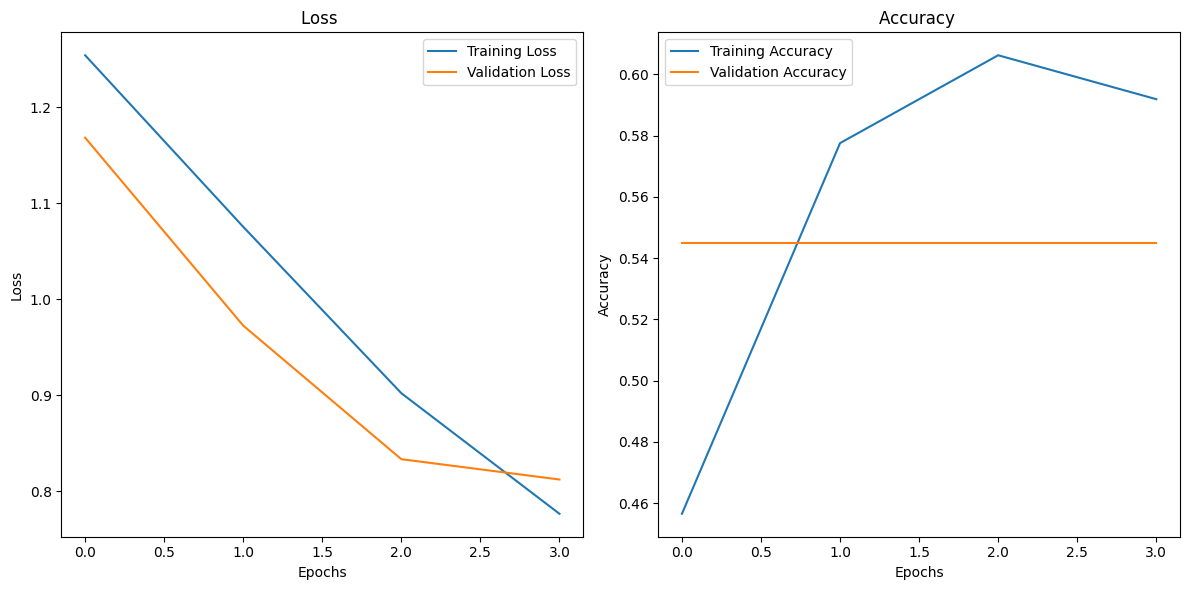

In [338]:
# Tạo mô hình CNN 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

model = Sequential()
model.add(Embedding(max_words, 44, input_length=max_len)) 
model.add(Conv1D(44, 3, activation='relu'))  
model.add(GlobalMaxPooling1D())
model.add(Dense(22, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(0.5))
model.add(Dense(num_satisfaction_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(
    X, y_satisfaction,
    epochs=10,  
    batch_size=10,
    validation_split=0.2,
    callbacks=[early_stopping] 
)

model.summary()
# Đánh giá mô hình trên tập huấn luyện
print("\nĐánh giá mô hình trên tập huấn luyện:")
loss, accuracy = model.evaluate(X, y_satisfaction)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Trực quan hóa quá trình huấn luyện
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

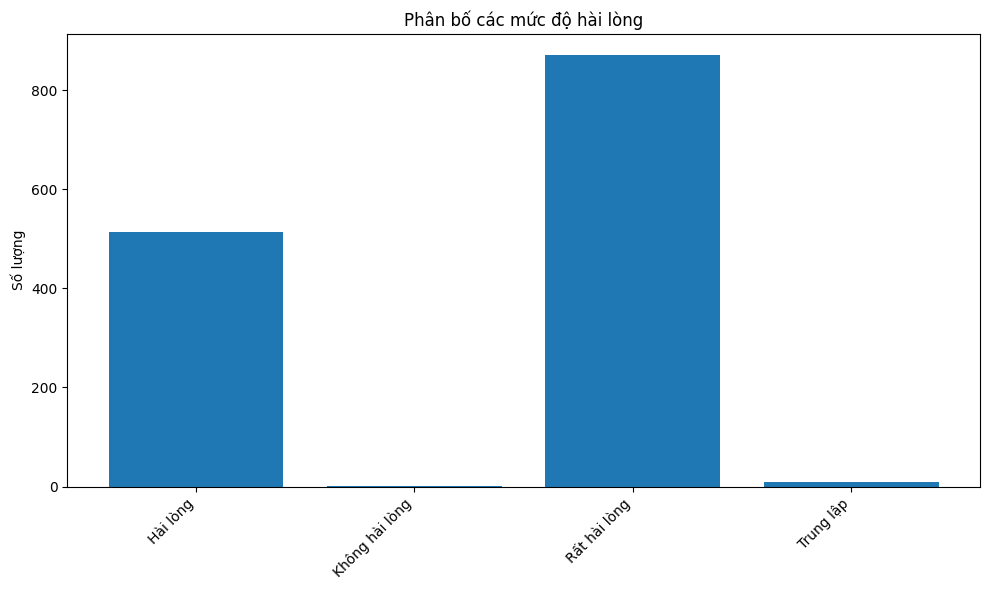

Class weights: {0: 0.6780155642023347, 1: 348.5, 2: 0.40057471264367817, 3: 38.72222222222222}


In [326]:
# Hiển thị phân bố các lớp
y_classes = np.argmax(y_satisfaction, axis=1)
class_counts = pd.Series(y_classes).value_counts().sort_index()
class_names = list(satisfaction_mapping.keys())

plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts)
plt.title('Phân bố các mức độ hài lòng')
plt.ylabel('Số lượng')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Tính class weights để cân bằng dữ liệu
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_classes), y=y_classes)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Class weights:", class_weight_dict)

Phân tích mức độ mất cân bằng
Class weights phản ánh sự nghịch đảo của tần suất xuất hiện của mỗi lớp. Từ kết quả này:

- Class 1 có trọng số cực lớn (348.5): Chỉ chiếm khoảng 0.29% dữ liệu
- Class 3 cũng có trọng số rất cao (38.7): Chiếm khoảng 2.6% dữ liệu
- Class 0 và 2 chiếm phần lớn dữ liệu, với trọng số nhỏ

In [329]:
# Kiểm tra phân phối các mức độ hài lòng
satisfaction_counts = df_processed['satisfaction'].value_counts()
print("\nPhân phối mức độ hài lòng:")
print(satisfaction_counts)
print(f"Tỷ lệ phần trăm: {satisfaction_counts / len(df_processed) * 100}")


Phân phối mức độ hài lòng:
satisfaction
Rất hài lòng      870
Hài lòng          514
Trung lập           9
Không hài lòng      1
Name: count, dtype: int64
Tỷ lệ phần trăm: satisfaction
Rất hài lòng      62.410330
Hài lòng          36.872310
Trung lập          0.645624
Không hài lòng     0.071736
Name: count, dtype: float64


Dữ liệu cực kỳ mất cân bằng:
- Tỷ lệ giữa lớp phổ biến nhất và hiếm nhất là 870:1
- Số lượng mẫu cho "Không hài lòng" chỉ có 1 - hoàn toàn không đủ để học pattern
- "Trung lập" chỉ có 9 mẫu - cũng quá ít để học đặc trưng

Class weights không thể giải quyết vấn đề:
- Khi các lớp thiểu số chỉ có 1-9 mẫu, việc tăng trọng số không thể bù đắp được thiếu sót về đặc trưng - ngôn ngữ
- Mô hình không có đủ ví dụ để hiểu cách biểu đạt sự không hài lòng/trung lập

Mô hình không thể tổng quát hóa:
- Model đang "ghi nhớ" lớp phổ biến thay vì học pattern

## 9.3 Cải thiện lại mô hình 

#### Lý do:

**Phân phối mức độ hài lòng:**

```
satisfaction
Rất hài lòng      870  
Hài lòng          514  
Trung lập           9  
Không hài lòng      1  
Name: count, dtype: int64
```

Do cách phân chia nhãn cũ, dữ liệu khá chênh lệch với nhãn *trung lập* và *không hài lòng*, dẫn đến mô hình không đủ để tối ưu cho các trường hợp đó.

---

#### Hiện trạng phân phối nhãn

Dữ liệu hiện tại có sự mất cân bằng nghiêm trọng giữa các nhãn:

- **Rất hài lòng**: 870 mẫu (62.5%)
- **Hài lòng**: 514 mẫu (36.9%)
- **Trung lập**: 9 mẫu (0.6%)
- **Không hài lòng**: 1 mẫu (~0%)

---

#### Các vấn đề phát sinh

##### 1. Thiếu dữ liệu cho lớp thiểu số:
- Chỉ có **1 mẫu "Không hài lòng"** và **9 mẫu "Trung lập"**
- Không đủ dữ liệu để mô hình học được đặc trưng của các lớp này

##### 2. Thiên lệch mô hình:
- Mô hình có xu hướng thiên về dự đoán các lớp đa số
- Khó phát hiện chính xác các trường hợp **tiêu cực/trung lập**

##### 3. Đánh giá không chính xác:
- Độ chính xác tổng thể cao nhưng **không phản ánh đúng hiệu năng thực tế**
- **Recall** và **Precision** của lớp thiểu số **rất thấp**


In [334]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    max_features=1000,      
    ngram_range=(1, 2),     
    sublinear_tf=True
)

X_tfidf = tfidf.fit_transform(df_processed['review_content'])

print("Shape TF-IDF matrix:", X_tfidf.shape)
print("Số lượng từ vựng:", len(tfidf.vocabulary_))

Shape TF-IDF matrix: (1394, 1000)
Số lượng từ vựng: 1000


In [335]:
X = X_tfidf
y = df_processed['rating']
def rating_to_class(rating):
    if rating <= 3.7:
        return 0  # Tiêu cực
    else:
        return 1  # Tích cực, tạm ổn
# Tạo nhãn phân loại mới
y_classified = y.apply(rating_to_class)

In [336]:
label_counts = y_classified.value_counts().sort_index()
print(label_counts)

rating
0     145
1    1249
Name: count, dtype: int64


- nhận xét: cũng còn vẫn chênh lệch nên áp dụng các phương pháp cân bằng dữ liệu

In [283]:
from imblearn.over_sampling import RandomOverSampler
X_train, X_test, y_train, y_test = train_test_split(
    X, y_classified, test_size=0.2, random_state=42
)

ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

ratio_labels = y_train.value_counts().sort_index()
print(ratio_labels)

rating
0    999
1    999
Name: count, dtype: int64


In [ ]:
model = Sequential()
model.add(Embedding(max_words, 44, input_length=max_len)) 
model.add(Conv1D(44, 3, activation='relu'))  
model.add(GlobalMaxPooling1D())
model.add(Dense(22, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=15,  
    batch_size=32, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping]
)
model.summary()
# Đánh giá mô hình trên tập huấn luyện
print("\nĐánh giá mô hình trên tập huấn luyện:")
loss, accuracy = model.evaluate(X, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Trực quan hóa quá trình huấn luyện
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

Epoch 1/15


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 2)

In [284]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, accuracy_score
print("\nĐang huấn luyện mô hình RandomForestClassifier...")
# Khởi tạo và huấn luyện mô hình phân loại
classifier_model = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_model.fit(X_train, y_train)
print("Huấn luyện hoàn tất!")

# Dự đoán trên tập kiểm tra
y_pred_cls = classifier_model.predict(X_test)

# Đánh giá mô hình phân loại
print("\nKết quả đánh giá mô hình phân loại:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_cls):.4f}")


# 2. In Classification Report (bao gồm Precision, Recall, F1-score, Support cho từng lớp)
class_names = ['Tiêu cực (Lớp 0)',  'Tích cực (Lớp 1)']
print("\nBáo cáo Phân loại Chi tiết (Classification Report):")
print(classification_report(y_test, y_pred_cls, target_names=class_names))


Đang huấn luyện mô hình RandomForestClassifier...
Huấn luyện hoàn tất!

Kết quả đánh giá mô hình phân loại:
Accuracy: 0.9176

Báo cáo Phân loại Chi tiết (Classification Report):
                  precision    recall  f1-score   support

Tiêu cực (Lớp 0)       1.00      0.21      0.34        29
Tích cực (Lớp 1)       0.92      1.00      0.96       250

        accuracy                           0.92       279
       macro avg       0.96      0.60      0.65       279
    weighted avg       0.92      0.92      0.89       279



##### Nhận xét:
- Mặc dù độ chính xác tổng thể (accuracy) đạt mức khá cao là 91.76%, tuy nhiên hiệu quả phân loại đối với lớp tiêu cực (Lớp 0) vẫn còn rất hạn chế. Cụ thể:

- Recall của lớp tiêu cực chỉ đạt 21%, cho thấy mô hình bỏ sót phần lớn các trường hợp tiêu cực trong quá trình dự đoán.

- F1-score của lớp này chỉ đạt 0.34, phản ánh sự mất cân đối nghiêm trọng trong khả năng cân bằng giữa precision và recall.

- Điều này cho thấy mô hình có xu hướng thiên lệch mạnh về lớp tích cực, và không đủ nhạy trong việc phát hiện các phản hồi tiêu cực — một yếu tố quan trọng trong các bài toán phân tích ý kiến.

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("\nĐang huấn luyện mô hình LogisticRegression...")

# Khởi tạo và huấn luyện mô hình LogisticRegression với cân bằng lớp
classifier_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
classifier_model.fit(X_train, y_train)
print("Huấn luyện hoàn tất!")

# Lấy xác suất dự đoán cho lớp 1
y_proba = classifier_model.predict_proba(X_test)[:, 1]

# Đặt threshold tùy chỉnh, ví dụ 0.4 thay vì 0.5
threshold = 0.4
y_pred_cls = (y_proba >= threshold).astype(int)

# Đánh giá mô hình phân loại
print("\nKết quả đánh giá mô hình phân loại với threshold =", threshold)
print(f"Accuracy: {accuracy_score(y_test, y_pred_cls):.4f}")

# Báo cáo phân loại chi tiết
class_names = ['Tiêu cực (Lớp 0)', 'Tích cực (Lớp 1)']
print("\nBáo cáo Phân loại Chi tiết (Classification Report):")
print(classification_report(y_test, y_pred_cls, target_names=class_names))


Đang huấn luyện mô hình LogisticRegression...
Huấn luyện hoàn tất!

Kết quả đánh giá mô hình phân loại với threshold = 0.4
Accuracy: 0.9104

Báo cáo Phân loại Chi tiết (Classification Report):
                  precision    recall  f1-score   support

Tiêu cực (Lớp 0)       0.59      0.45      0.51        29
Tích cực (Lớp 1)       0.94      0.96      0.95       250

        accuracy                           0.91       279
       macro avg       0.76      0.71      0.73       279
    weighted avg       0.90      0.91      0.90       279



##### Nhận xét:
- Mô hình Logistic Regression với ngưỡng phân lớp (threshold) điều chỉnh về 0.4 cho thấy sự cải thiện đáng kể so với mô hình trước đó, đặc biệt ở lớp tiêu cực:

- Recall lớp tiêu cực tăng lên 45%, nâng cao khả năng phát hiện các trường hợp phản hồi tiêu cực, giảm thiểu việc bỏ sót.

- F1-score của lớp tiêu cực đạt 0.51, thể hiện sự cân bằng tốt hơn giữa độ chính xác và độ nhạy so với mô hình Random Forest trước đó.

- Tuy nhiên, độ chính xác tổng thể vẫn duy trì ở mức cao (91.04%), đồng thời lớp tích cực cũng giữ được hiệu năng ổn định với precision 94% và recall 96%.

#### Kiểm tra thử khả năng dự đoán cảm xúc của mô hình

In [286]:
sample_text = [
    "The product quality is excellent and delivery was fast.",  # Tích cực
    "The product was broken, the customer service was terrible, and the overall quality was poor.",  # Tiêu cực rõ
    "It was okay, not great but not terrible either.",  # Trung lập
    "Absolutely fantastic! I'm very satisfied with my purchase.",  # Tích cực mạnh
    "Bad experience overall. Support was poor and the item didn't work.",  # Tiêu cực rõ
    "Average service, decent product, nothing exceptional.",  # Trung lập nhẹ
    "Horrible! Broken item, late delivery, and rude staff.",  # Tiêu cực mạnh
    "Great job! Fast shipping and the item works perfectly.",  # Tích cực
]
# Chuyển văn bản sang vector TF-IDF
sample_vec = tfidf.transform(sample_text)

# Dự đoán xác suất và nhãn
threshold = 0.4
probas = classifier_model.predict_proba(sample_vec)[:, 1]
pred_labels = (probas >= threshold).astype(int)

# In kết quả
for text, proba, label in zip(sample_text, probas, pred_labels):
    print(f"\nVăn bản: {text}")
    print(f"Xác suất thuộc lớp 1 (Tích cực): {proba:.4f}")
    print(f"Dự đoán: {'Tích cực' if label == 1 else 'Tiêu cực'} (với threshold = {threshold})")



Văn bản: The product quality is excellent and delivery was fast.
Xác suất thuộc lớp 1 (Tích cực): 0.6426
Dự đoán: Tích cực (với threshold = 0.4)

Văn bản: The product was broken, the customer service was terrible, and the overall quality was poor.
Xác suất thuộc lớp 1 (Tích cực): 0.1217
Dự đoán: Tiêu cực (với threshold = 0.4)

Văn bản: It was okay, not great but not terrible either.
Xác suất thuộc lớp 1 (Tích cực): 0.5829
Dự đoán: Tích cực (với threshold = 0.4)

Văn bản: Absolutely fantastic! I'm very satisfied with my purchase.
Xác suất thuộc lớp 1 (Tích cực): 0.6231
Dự đoán: Tích cực (với threshold = 0.4)

Văn bản: Bad experience overall. Support was poor and the item didn't work.
Xác suất thuộc lớp 1 (Tích cực): 0.1797
Dự đoán: Tiêu cực (với threshold = 0.4)

Văn bản: Average service, decent product, nothing exceptional.
Xác suất thuộc lớp 1 (Tích cực): 0.5214
Dự đoán: Tích cực (với threshold = 0.4)

Văn bản: Horrible! Broken item, late delivery, and rude staff.
Xác suất thuộc lớp 

##### Nhận xét:
- Mô hình Logistic Regression với threshold 0.4 hoạt động ổn định và có xu hướng an toàn khi phân loại các văn bản rõ ràng.

- Tuy nhiên, đối với các văn bản giọng điệu trung tính, mô hình hiện đang nghiêng về tích cực, do bản chất mất cân bằng nhãn trong dữ liệu huấn luyện.

In [287]:
# Dự đoán cảm xúc cho toàn bộ dataset
X_full = tfidf.transform(df_processed['review_content'])
sentiment_predictions = classifier_model.predict(X_full)
sentiment_proba = classifier_model.predict_proba(X_full)

# Thêm kết quả vào DataFrame
df_processed['predicted_sentiment'] = sentiment_predictions
df_processed['sentiment_confidence'] = sentiment_proba.max(axis=1)
df_processed['sentiment_label'] = df_processed['predicted_sentiment'].map({
    0: 'Tiêu cực', 1: 'Tích cực'
})

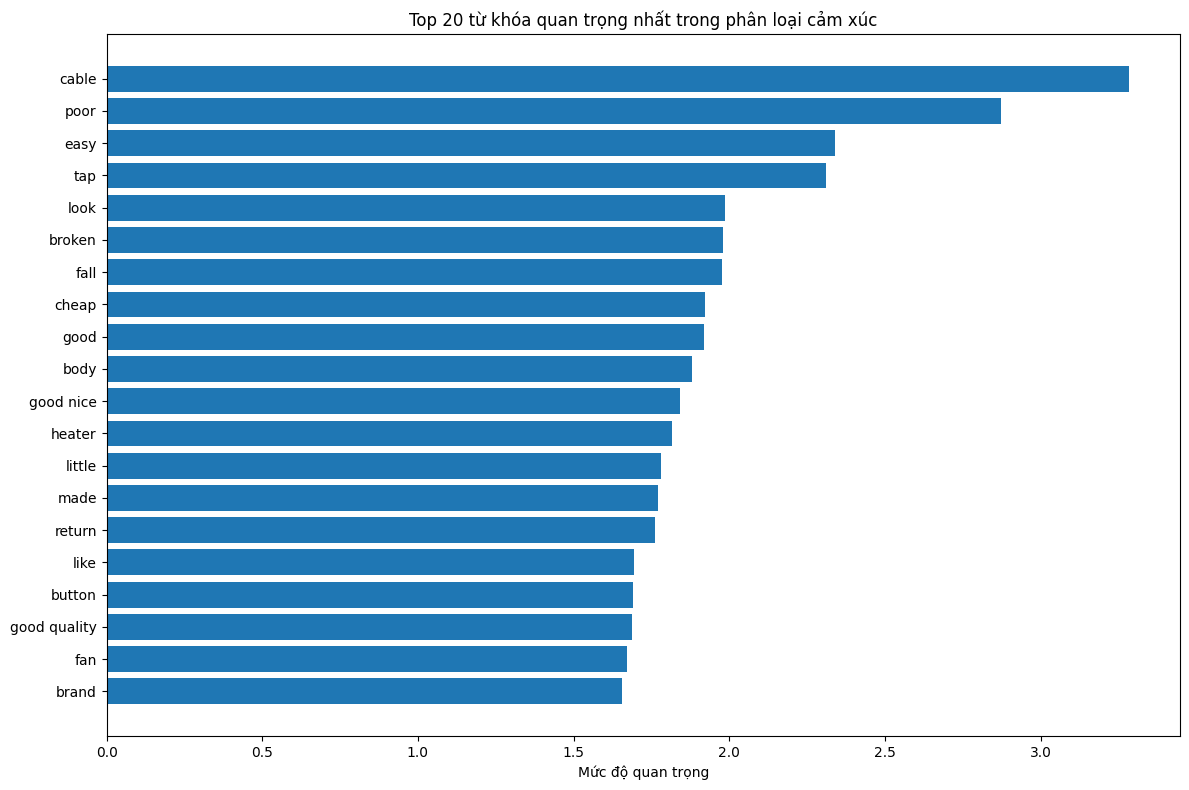

In [288]:
# Lấy các từ khóa quan trọng nhất cho phân loại
feature_names = tfidf.get_feature_names_out()
#importances = classifier_model.feature_importances_
importances = np.abs(classifier_model.coef_[0])


# Top từ khóa quan trọng
indices = np.argsort(importances)[::-1][:20]
top_features = [(feature_names[i], importances[i]) for i in indices]

# Trực quan hóa
plt.figure(figsize=(12, 8))
features, scores = zip(*top_features)
plt.barh(range(len(features)), scores)
plt.yticks(range(len(features)), features)
plt.xlabel('Mức độ quan trọng')
plt.title('Top 20 từ khóa quan trọng nhất trong phân loại cảm xúc')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

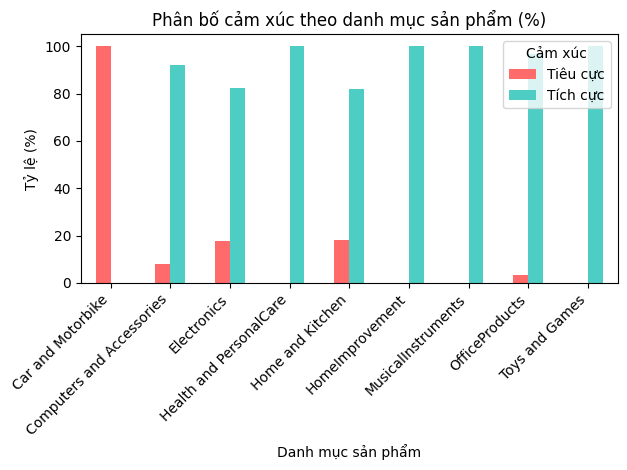

In [289]:
# Cảm xúc theo danh mục sản phẩm
sentiment_by_category = df_processed.groupby(['main_category', 'sentiment_label']).size().unstack(fill_value=0)
sentiment_by_category_pct = sentiment_by_category.div(sentiment_by_category.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))
sentiment_by_category_pct.plot(kind='bar', 
                               color=['#ff6b6b', '#4ecdc4'])
plt.title('Phân bố cảm xúc theo danh mục sản phẩm (%)')
plt.xlabel('Danh mục sản phẩm')
plt.ylabel('Tỷ lệ (%)')
plt.legend(title='Cảm xúc')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Nhận xét:
Biểu đồ cho thấy cảm xúc tích cực chiếm ưu thế trong hầu hết các danh mục sản phẩm, phản ánh mức độ hài lòng cao của khách hàng. Tuy nhiên, danh mục "Car and Motorbike" nổi bật với tỷ lệ cảm xúc tiêu cực gần như tuyệt đối, cho thấy đây là khu vực cần được ưu tiên cải thiện. Nguyên nhân có thể đến từ chất lượng sản phẩm không ổn định, phụ tùng không phù hợp, hoặc dịch vụ bảo hành và hậu mãi kém. Một số danh mục như Electronics, Health and Personal Care, và Home Improvement cũng có tỷ lệ tiêu cực ở mức trung bình – đây có thể là kết quả của kỳ vọng cao từ người tiêu dùng nhưng trải nghiệm thực tế chưa tương xứng, đặc biệt ở các khía cạnh như độ bền sản phẩm, hướng dẫn sử dụng hoặc dịch vụ hỗ trợ. Ngược lại, các danh mục như Toys and Games, Office Products, và Home and Kitchen duy trì tỷ lệ tích cực gần như tuyệt đối, cho thấy chất lượng sản phẩm ổn định, dễ sử dụng và phù hợp với kỳ vọng khách hàng. Các danh mục này nên được tiếp tục duy trì và có thể mở rộng quy mô kinh doanh.

# 10.Khai phá luật kết hợp (Association Rule Mining) - Phân tích mối quan hệ giữa các yếu tố sản phẩm

#### Rời rạc hóa dữ liệu cho Association Rules

In [290]:
def create_discretized_features(df):
    df_disc = df.copy()
    
    # 1. Rời rạc hóa Rating
    def categorize_rating(rating):
        if rating < 4:
            return "Rating_Thap"
        else:
            return "Rating_Cao"
    
    # 2. Rời rạc hóa Discount Percentage  
    def categorize_discount(discount):
        if discount == 0:
            return "Khong_Giam_Gia"
        elif discount <= 0.3:  # <= 30%
            return "Giam_Gia_Vua"
        else:
            return "Giam_Gia_Sau"
    
    # 3. Rời rạc hóa Price (thêm để có thêm insight)
    price_median = df['discounted_price'].median()
    def categorize_price(price):
        if price <= price_median:
            return "Gia_Thap"
        else:
            return "Gia_Cao"
    
    # Áp dụng rời rạc hóa
    df_disc['rating_category'] = ratings.apply(categorize_rating)
    df_disc['discount_category'] = df['discount_percentage'].apply(categorize_discount)
    df_disc['price_category'] = df['discounted_price'].apply(categorize_price)
    
    return df_disc

# Áp dụng rời rạc hóa
df_discretized = create_discretized_features(df_processed)

print("Đã tạo xong các thuộc tính rời rạc hóa!")
print("\nThống kê các thuộc tính rời rạc:")
print("Rating category:", df_discretized['rating_category'].value_counts())
print("\nDiscount category:", df_discretized['discount_category'].value_counts())
print("\nPrice category:", df_discretized['price_category'].value_counts())

NameError: name 'ratings' is not defined

#### Tạo transactions và áp dụng thuật toán Apriori

In [ ]:
def create_transactions_for_association_rules(df):
    transactions = []
    
    for _, row in df.iterrows():
        transaction = []
        
        # Thêm các thuộc tính rời rạc hóa
        transaction.append(row['main_category'])
        transaction.append(row['rating_category'])
        transaction.append(row['discount_category'])
        transaction.append(row['price_category'])
        
        transactions.append(transaction)
    
    return transactions

# Tạo transactions
transactions = create_transactions_for_association_rules(df_discretized)

print(f"Đã tạo {len(transactions)} transactions")
print("Ví dụ 5 transactions đầu tiên:")
for i, trans in enumerate(transactions[:5]):
    print(f"Transaction {i+1}: {trans}")

Đã tạo 1394 transactions
Ví dụ 5 transactions đầu tiên:
Transaction 1: ['Computers and Accessories', 'Rating_Cao', 'Giam_Gia_Sau', 'Gia_Thap']
Transaction 2: ['Computers and Accessories', 'Rating_Cao', 'Giam_Gia_Sau', 'Gia_Thap']
Transaction 3: ['Computers and Accessories', 'Rating_Thap', 'Giam_Gia_Sau', 'Gia_Thap']
Transaction 4: ['Computers and Accessories', 'Rating_Cao', 'Giam_Gia_Sau', 'Gia_Thap']
Transaction 5: ['Computers and Accessories', 'Rating_Cao', 'Giam_Gia_Sau', 'Gia_Thap']


In [ ]:
# === CHUYỂN ĐỔI SANG ĐỊNH DẠNG CHO APRIORI ===
#!pip install mlxtend

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Chuyển đổi transactions sang one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print("Shape của ma trận one-hot:", df_encoded.shape)
print("Các items có trong dataset:")
print(list(te.columns_))

Shape của ma trận one-hot: (1394, 16)
Các items có trong dataset:
['Car and Motorbike', 'Computers and Accessories', 'Electronics', 'Gia_Cao', 'Gia_Thap', 'Giam_Gia_Sau', 'Giam_Gia_Vua', 'Health and PersonalCare', 'Home and Kitchen', 'HomeImprovement', 'Khong_Giam_Gia', 'MusicalInstruments', 'OfficeProducts', 'Rating_Cao', 'Rating_Thap', 'Toys and Games']


In [ ]:
# Tìm frequent itemsets với min_support
min_support = 0.05  
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

print(f"Tìm được {len(frequent_itemsets)} frequent itemsets với min_support = {min_support}")
print("\nTop 10 frequent itemsets:")
print(frequent_itemsets.head(10))

Tìm được 70 frequent itemsets với min_support = 0.05

Top 10 frequent itemsets:
    support                              itemsets
0  0.323529           (Computers and Accessories)
1  0.330703                         (Electronics)
2  0.498565                             (Gia_Cao)
3  0.501435                            (Gia_Thap)
4  0.776901                        (Giam_Gia_Sau)
5  0.190100                        (Giam_Gia_Vua)
6  0.318508                    (Home and Kitchen)
7  0.749641                          (Rating_Cao)
8  0.250359                         (Rating_Thap)
9  0.082496  (Gia_Cao, Computers and Accessories)


#### Sinh luật kết hợp và phân tích độ tin cậy

In [ ]:
# Tạo association rules
min_confidence = 0.3  # Độ tin cậy tối thiểu 30%
rules = association_rules(frequent_itemsets, 
                         metric="confidence", 
                         min_threshold=min_confidence)

# Sắp xếp theo độ tin cậy giảm dần
rules_sorted = rules.sort_values('confidence', ascending=False)

print(f"\nTìm được {len(rules_sorted)} association rules với confidence >= {min_confidence}")
print("\nTop 10 rules có confidence cao nhất:")
for idx, rule in rules_sorted.head(10).iterrows():
    antecedent = ', '.join(list(rule['antecedents']))
    consequent = ', '.join(list(rule['consequents']))
    print(f"Rule {idx}: {antecedent} → {consequent}")
    print(f"  Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}")
    print()


Tìm được 178 association rules với confidence >= 0.3

Top 10 rules có confidence cao nhất:
Rule 130: Gia_Cao, Computers and Accessories, Giam_Gia_Sau → Rating_Cao
  Support: 0.057, Confidence: 0.930, Lift: 1.241

Rule 116: Rating_Thap, Gia_Thap → Giam_Gia_Sau
  Support: 0.116, Confidence: 0.926, Lift: 1.192

Rule 65: Electronics, Gia_Thap → Giam_Gia_Sau
  Support: 0.126, Confidence: 0.907, Lift: 1.168

Rule 74: Rating_Thap, Electronics → Giam_Gia_Sau
  Support: 0.083, Confidence: 0.906, Lift: 1.166

Rule 135: Computers and Accessories, Rating_Cao, Gia_Thap → Giam_Gia_Sau
  Support: 0.176, Confidence: 0.901, Lift: 1.160

Rule 41: Computers and Accessories, Gia_Thap → Giam_Gia_Sau
  Support: 0.217, Confidence: 0.899, Lift: 1.157

Rule 39: Gia_Cao, Computers and Accessories → Rating_Cao
  Support: 0.074, Confidence: 0.896, Lift: 1.195

Rule 154: Rating_Cao, Electronics, Gia_Thap → Giam_Gia_Sau
  Support: 0.083, Confidence: 0.885, Lift: 1.140

Rule 78: Giam_Gia_Vua, Electronics → Rating_C

#### Phân tích Business Insights từ Association Rules

In [ ]:

def analyze_business_insights(rules_df):
    print(" BUSINESS INSIGHTS ANALYSIS")
    print("="*50)
    
    # 1. Rules về Rating
    rating_rules = rules_df[rules_df['consequents'].astype(str).str.contains('Rating_')]
    if len(rating_rules) > 0:
        print("\n-- Các yếu tố ảnh hưởng đến Rating:")
        for _, rule in rating_rules.head(5).iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            print(f"  • {antecedent} → {consequent} (Confidence: {rule['confidence']:.2f})")
    
    # 2. Rules về Discount
    discount_rules = rules_df[rules_df['consequents'].astype(str).str.contains('Giam_Gia')]
    if len(discount_rules) > 0:
        print("\n-- Patterns về Giảm giá:")
        for _, rule in discount_rules.head(5).iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            print(f"  • {antecedent} → {consequent} (Confidence: {rule['confidence']:.2f})")
    
    # 3. Rules về Category và Price
    category_price_rules = rules_df[
        (rules_df['antecedents'].astype(str).str.contains('Electronics|Computers')) &
        (rules_df['consequents'].astype(str).str.contains('Gia_'))
    ]
    if len(category_price_rules) > 0:
        print("\n-- Patterns về Danh mục và Giá:")
        for _, rule in category_price_rules.head(5).iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            print(f"  • {antecedent} → {consequent} (Confidence: {rule['confidence']:.2f})")

# Chạy phân tích insights
analyze_business_insights(rules_sorted)

 BUSINESS INSIGHTS ANALYSIS

-- Các yếu tố ảnh hưởng đến Rating:
  • Gia_Cao, Computers and Accessories, Giam_Gia_Sau → Rating_Cao (Confidence: 0.93)
  • Gia_Cao, Computers and Accessories → Rating_Cao (Confidence: 0.90)
  • Giam_Gia_Vua, Electronics → Rating_Cao (Confidence: 0.88)
  • Computers and Accessories, Giam_Gia_Sau → Rating_Cao (Confidence: 0.84)
  • Computers and Accessories → Rating_Cao (Confidence: 0.83)

-- Patterns về Giảm giá:
  • Rating_Thap, Gia_Thap → Giam_Gia_Sau (Confidence: 0.93)
  • Electronics, Gia_Thap → Giam_Gia_Sau (Confidence: 0.91)
  • Rating_Thap, Electronics → Giam_Gia_Sau (Confidence: 0.91)
  • Computers and Accessories, Rating_Cao, Gia_Thap → Giam_Gia_Sau (Confidence: 0.90)
  • Computers and Accessories, Gia_Thap → Giam_Gia_Sau (Confidence: 0.90)

-- Patterns về Danh mục và Giá:
  • Electronics, Gia_Thap → Giam_Gia_Sau (Confidence: 0.91)
  • Rating_Thap, Electronics → Giam_Gia_Sau (Confidence: 0.91)
  • Computers and Accessories, Rating_Cao, Gia_Thap → 

Từ kết quả phân tích Business Insights, có thể rút ra một số nhận xét quan trọng:

1. Về Rating (Đánh giá):
Sản phẩm cao cấp được đánh giá tích cực: Các sản phẩm thuộc danh mục Computers & Accessories có giá cao và được giảm giá sâu thường nhận được rating cao (confidence 93%)
Hiệu ứng thương hiệu: Danh mục Computers & Accessories nhìn chung có rating cao (confidence 83%), cho thấy chất lượng ổn định
Chiến lược giảm giá hiệu quả: Sản phẩm Electronics được giảm giá vừa phải thường nhận rating cao (confidence 88%)
2. Về Patterns Giảm giá:
Chiến lược xử lý sản phẩm rating thấp: Sản phẩm có rating thấp và giá thấp thường được giảm giá sâu (confidence 93%) - có thể là chiến lược để giải phóng hàng tồn
Chính sách giá theo danh mục:
Electronics và Computers & Accessories có giá thấp thường được giảm giá sâu (confidence >90%)
Đặc biệt ngay cả sản phẩm rating cao trong các danh mục này cũng được áp dụng chính sách giảm giá mạnh
3. Về Mối quan hệ Danh mục - Giá:
Chiến lược định giá nhất quán: Các danh mục Electronics và Computers & Accessories có mô hình giảm giá khá đồng nhất:
Sản phẩm giá thấp thường được giảm giá sâu (confidence 89-91%)
Áp dụng cho cả sản phẩm rating cao và thấp
Phân khúc thị trường: Các danh mục này tập trung vào phân khúc giá thấp với chiến lược giảm giá mạnh để kích thích mua sắm